In [2]:
!pip install pandas
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 5.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 5.6 MB/s eta 0:00:00a 0:00:01
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 5.7 MB/s eta 0:00:00a 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 5.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 6.2 MB/s eta 0:00:00a 0:00:01


In [2]:
import os
import pandas as pd
import json

In [6]:
input_dir = "/Users/yooseohyeon/Desktop/170325"
output_dir = "/Users/yooseohyeon/Desktop/170325/eva_250121_processed"
os.makedirs(output_dir, exist_ok=True)


### Hexadecimal JSON String Conversion

In [7]:
# Function to decode hexadecimal JSON strings
def decode_value(hex_string):
    try:
        # Convert from hexadecimal to a string
        json_string = bytes.fromhex(hex_string[2:]).decode('utf-8')  # Skip '0x' prefix
        # Parse JSON for better readability
        return json.loads(json_string)
    except Exception as e:
        return str(e)  # Return the error message for debugging if needed


In [9]:
# Process all CSV files in the directory
for filename in os.listdir(input_dir):
    if filename.endswith(".csv"):
        # Set the file path
        file_path = os.path.join(input_dir, filename)
        
        # Load the data
        try:
            data = pd.read_csv(file_path, on_bad_lines='skip', engine='python')  # Skip problematic lines
        except Exception as e:
            print(f"Error reading {filename}: {e}")
            continue  # Skip to the next file if there's an error
        
        # Rename columns and decode data
        if len(data.columns) == 3:  # Ensure the file has the expected column structure
            data.columns = ['source_id', 'timestamp', 'value']  # Rename columns
            data['value'] = data['value'].apply(decode_value)  # Decode the 'value' column
            
            # Create a directory for each participant (based on file name)
            participant_dir = os.path.join(output_dir, os.path.splitext(filename)[0])
            os.makedirs(participant_dir, exist_ok=True)
            
            # Save data by source_id
            source_ids = data['source_id'].unique()  # Get unique source IDs
            for source_id in source_ids:
                source_data = data[data['source_id'] == source_id]  # Filter data by source_id
                source_dir = os.path.join(participant_dir, f"source_{source_id}")
                os.makedirs(source_dir, exist_ok=True)
                output_file = os.path.join(source_dir, f"data_source_{source_id}.csv")
                source_data.to_csv(output_file, index=False)  # Save the data to a CSV file
            print(f"Processed {filename} successfully.")
        else:
            print(f"Skipping {filename}: unexpected column structure.")  # Skip files with unexpected structures

Processed cmp1_usr589.csv successfully.
Processed cmp1_usr628.csv successfully.
Processed cmp1_usr600.csv successfully.
Processed cmp1_usr614.csv successfully.
Processed cmp1_usr615.csv successfully.
Processed cmp1_usr601.csv successfully.
Processed cmp1_usr629.csv successfully.
Processed cmp1_usr588.csv successfully.
Processed cmp1_usr549.csv successfully.
Processed cmp1_usr617.csv successfully.
Processed cmp1_usr603.csv successfully.
Processed cmp1_usr602.csv successfully.
Processed cmp1_usr616.csv successfully.
Processed cmp1_usr560.csv successfully.
Error reading cmp1_usr548.csv: No columns to parse from file
Processed cmp1_usr558.csv successfully.
Processed cmp1_usr612.csv successfully.
Error reading cmp1_usr607.csv: No columns to parse from file
Error reading cmp1_usr613.csv: No columns to parse from file
Processed cmp1_usr559.csv successfully.
Processed cmp1_usr571.csv successfully.
Processed cmp1_usr598.csv successfully.
Processed cmp1_usr573.csv successfully.
Processed cmp1_us

### NEW Code

In [15]:
demo_dir = "/Users/yooseohyeon/Desktop/170325/Demographics Sheet.csv"

df = pd.read_csv(demo_dir)

batch1 = []
batch2 = []

for _, row in df.iterrows():
    user_id = row['Number']  
    number = str(row['Batch']).strip()  
    
    if number == "I":
        batch1.append(user_id)
    elif number == "II":
        batch2.append(user_id)

print("Batch 1:", batch1)
print("Batch 2:", batch2)

Batch 1: [541, 542, 543, 544, 545, 546, 547, 559, 571, 581, 582, 583, 584, 586, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 607, 608, 609, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 628, 629, 630, 631, 632, 633, 635, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 648, 649, 650, 651, 652]
Batch 2: [654, 655, 656, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 674, 675, 676, 677, 678, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 698, 699, 700, 701, 702, 703, 704, 705]


In [ ]:
import pandas as pd
from pathlib import Path
from datetime import datetime
import json

# 경로 설정
root_path = Path("/Users/yooseohyeon/Desktop/170325")
output_base = root_path / "eva_250121_processed"
batch_mapping = {
    "Batch1": [541, 542, 543, 544, 545, 546, 547, 559, 571, 581, 582, 583, 584, 586, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 607, 608, 609, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 628, 629, 630, 631, 632, 633, 635, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 648, 649, 650, 651, 652],
    "Batch2": [654, 655, 656, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 674, 675, 676, 677, 678, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 698, 699, 700, 701, 702, 703, 704, 705, ]
}
valid_source_ids = [2, 3, 5, 7, 8, 9, 10, 12, 14, 16, 17, 18, 20, 21]
batch_counts = {}

# hex -> JSON string
def hex_json_to_string(hex_str):
    try:
        json_str = bytes.fromhex(hex_str[2:]).decode('utf-8')
        json_obj = json.loads(json_str)
        return json.dumps(json_obj, ensure_ascii=False)
    except Exception as e:
        print(f"❌ hex decode error: {e}")
        return ""

for batch_name, user_ids in batch_mapping.items():
    processed_users = 0
    for user_id in user_ids:
        input_csv = root_path / f"cmp1_usr{user_id}.csv"
        output_user_path = output_base / batch_name / f"cmp1_usr{user_id}"
        output_user_path.mkdir(parents=True, exist_ok=True)

        if not input_csv.exists() or input_csv.stat().st_size == 0:
            for sid in valid_source_ids:
                source_path = output_user_path / f"source_{sid}"
                source_path.mkdir(parents=True, exist_ok=True)
                pd.DataFrame(columns=["source_id", "timestamp", "value"]).to_csv(source_path / f"data_source_{sid}.csv", index=False)
            processed_users += 1
            continue

        try:
            df = pd.read_csv(input_csv, header=None, names=["source_id", "timestamp", "value"])
            if df.empty:
                raise ValueError("Empty data")

            grouped = df.groupby("source_id")
            present_source_ids = set()

            for sid, group in grouped:
                if sid not in valid_source_ids:
                    continue
                present_source_ids.add(sid)
                group_with_id = group.copy()

                group_with_id["timestamp"] = group_with_id["timestamp"].apply(
                    lambda x: datetime.fromtimestamp(int(x) / 1000).strftime("%Y-%m-%d %H:%M:%S")
                )
                group_with_id["value"] = group_with_id["value"].apply(
                    lambda x: hex_json_to_string(str(x)) if str(x).startswith("0x") else x
                )
                group_with_id["source_id"] = sid
                group_with_id = group_with_id[["source_id", "timestamp", "value"]]

                source_path = output_user_path / f"source_{sid}"
                source_path.mkdir(parents=True, exist_ok=True)
                group_with_id.to_csv(source_path / f"data_source_{sid}.csv", index=False)

            for sid in valid_source_ids:
                if sid not in present_source_ids:
                    source_path = output_user_path / f"source_{sid}"
                    source_path.mkdir(parents=True, exist_ok=True)
                    pd.DataFrame(columns=["source_id", "timestamp", "value"]).to_csv(source_path / f"data_source_{sid}.csv", index=False)

            processed_users += 1

        except Exception as e:
            print(f"⚠️ Error processing user {user_id}: {e}")

    batch_counts[batch_name] = processed_users

# ✅ 요약 출력
print("\n📊 사용자 처리 요약:")
for batch, count in batch_counts.items():
    print(f"{batch}: {count}명 처리 완료")


📊 사용자 처리 요약:
Batch1: 71명 처리 완료
Batch2: 44명 처리 완료


In [1]:
import pandas as pd
from pathlib import Path
from datetime import datetime
import json
import re

# 경로 설정
root_path = Path("/Users/yooseohyeon/Desktop/170325")
output_base = root_path / "eva_250121_processed"
valid_source_ids = [2, 3, 5, 7, 8, 9, 10, 12, 14, 16, 17, 18, 20, 21]
batch_counts = {"Batch2": 0}

# hex -> JSON string
def hex_json_to_string(hex_str):
    try:
        json_str = bytes.fromhex(hex_str[2:]).decode('utf-8')
        json_obj = json.loads(json_str)
        return json.dumps(json_obj, ensure_ascii=False)
    except Exception as e:
        print(f"❌ hex decode error: {e}")
        return ""

# 📁 CSV 파일 목록 중 user_id > 705 인 파일만 선택
for input_csv in root_path.glob("cmp1_usr*.csv"):
    match = re.search(r"cmp1_usr(\d+)\.csv", input_csv.name)
    if not match:
        continue
    user_id = int(match.group(1))
    if user_id <= 705:
        continue

    batch_name = "Batch2"
    output_user_path = output_base / batch_name / f"cmp1_usr{user_id}"
    output_user_path.mkdir(parents=True, exist_ok=True)

    if not input_csv.exists() or input_csv.stat().st_size == 0:
        for sid in valid_source_ids:
            source_path = output_user_path / f"source_{sid}"
            source_path.mkdir(parents=True, exist_ok=True)
            pd.DataFrame(columns=["source_id", "timestamp", "value"]).to_csv(source_path / f"data_source_{sid}.csv", index=False)
        batch_counts[batch_name] += 1
        continue

    try:
        df = pd.read_csv(input_csv, header=None, names=["source_id", "timestamp", "value"])
        if df.empty:
            raise ValueError("Empty data")

        grouped = df.groupby("source_id")
        present_source_ids = set()

        for sid, group in grouped:
            if sid not in valid_source_ids:
                continue
            present_source_ids.add(sid)
            group_with_id = group.copy()

            group_with_id["timestamp"] = group_with_id["timestamp"].apply(
                lambda x: datetime.fromtimestamp(int(x) / 1000).strftime("%Y-%m-%d %H:%M:%S")
            )
            group_with_id["value"] = group_with_id["value"].apply(
                lambda x: hex_json_to_string(str(x)) if str(x).startswith("0x") else x
            )
            group_with_id["source_id"] = sid
            group_with_id = group_with_id[["source_id", "timestamp", "value"]]

            source_path = output_user_path / f"source_{sid}"
            source_path.mkdir(parents=True, exist_ok=True)
            group_with_id.to_csv(source_path / f"data_source_{sid}.csv", index=False)

        for sid in valid_source_ids:
            if sid not in present_source_ids:
                source_path = output_user_path / f"source_{sid}"
                source_path.mkdir(parents=True, exist_ok=True)
                pd.DataFrame(columns=["source_id", "timestamp", "value"]).to_csv(source_path / f"data_source_{sid}.csv", index=False)

        batch_counts[batch_name] += 1

    except Exception as e:
        print(f"⚠️ Error processing user {user_id}: {e}")

# ✅ 요약 출력
print("\n📊 사용자 처리 요약:")
for batch, count in batch_counts.items():
    print(f"{batch}: {count}명 처리 완료")


📊 사용자 처리 요약:
Batch2: 66명 처리 완료


## Sensor Data Analysis

In [4]:
import pandas as pd
from pathlib import Path

Batch1 = [541, 542, 543, 544, 545, 546, 547, 559, 571, 581, 582, 583, 584, 586, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 607, 608, 609, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 628, 629, 630, 631, 632, 633, 635, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 648, 649, 650, 651, 652]
Batch2 = [654, 655, 656, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 674, 675, 676, 677, 678, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 698, 699, 700, 701, 702, 703, 704, 705]
SOURCE_LIST = [2, 3, 5, 7, 8, 9, 10, 14, 18, 20]
BATCHES = ["Batch1", "Batch2"]

base_path = Path("/Users/yooseohyeon/Desktop/170325/eva_250121_processed")
missing_stats = []

for batch_name in BATCHES:
    batch_path = base_path / batch_name
    for user_folder in batch_path.iterdir():
        if not user_folder.is_dir():
            continue
        user_id = user_folder.name
        user_suffix = int(user_id[-3:])
        if batch_name == 'Batch1' and user_suffix not in Batch1:
            continue
        elif batch_name == 'Batch2' and user_suffix not in Batch2:
            continue
        for src in SOURCE_LIST:
            file_path = user_folder / f"source_{src}" / f"data_source_{src}.csv"
            missing_stats.append({
                "Batch": batch_name,
                "User": user_id,
                "Source": src,
                "Exists": file_path.exists()
            })

df_missing = pd.DataFrame(missing_stats)
pivot_missing = df_missing.pivot_table(index=["Batch", "User"], columns="Source", values="Exists", aggfunc='first').fillna(False)

# 저장 또는 출력
pivot_missing.to_csv("missing_files_summary.csv", encoding='utf-8-sig')
print("✅ 'missing_files_summary.csv' 파일로 결과가 저장되었습니다.")

✅ 'missing_files_summary.csv' 파일로 결과가 저장되었습니다.


In [6]:
import pandas as pd
# 파일 불러오기
df = pd.read_csv("missing_files_summary.csv")
# Long 형식으로 변환
df_long = df.melt(id_vars=["Batch", "User"], var_name="Source", value_name="Exists")
# 누락된 항목만 필터링
missing_long = df_long[df_long["Exists"] == False].copy()
missing_long["Missing"] = "MISSING"
# 보기 좋게 정렬
missing_long = missing_long[["Batch", "User", "Source", "Missing"]].sort_values(by=["Batch", "User", "Source"]).reset_index(drop=True)
# 출력 확인
print(missing_long.head())
# 저장도 가능
missing_long.to_csv("missing_sources_long_format.csv", index=False, encoding='utf-8-sig')
print("✅ 누락 항목이 missing_sources_long_format.csv로 저장되었습니다.")

    Batch         User Source  Missing
0  Batch1  cmp1_usr543     20  MISSING
1  Batch1  cmp1_usr543      7  MISSING
2  Batch1  cmp1_usr543      8  MISSING
3  Batch1  cmp1_usr543      9  MISSING
4  Batch1  cmp1_usr546      8  MISSING
✅ 누락 항목이 missing_sources_long_format.csv로 저장되었습니다.


In [8]:
import pandas as pd
import json
from pathlib import Path

SOURCE_LIST = [2, 3, 5, 7, 8, 9, 10, 14, 18, 20]
BATCHES = ["Batch1", "Batch2"]
base_path = Path("/Users/yooseohyeon/Desktop/170325/eva_250121_processed")

EIGHT_WEEKS_MS = 56 * 24 * 60 * 60 * 1000  # 8주 → 밀리초

summary = []

for batch_name in BATCHES:
    batch_path = base_path / batch_name
    for user_folder in batch_path.iterdir():
        if not user_folder.is_dir():
            continue
        user_id = user_folder.name
        user_suffix = int(user_id[-3:])
        if batch_name == 'Batch1' and user_suffix not in Batch1:
            continue
        elif batch_name == 'Batch2' and user_suffix not in Batch2:
            continue
        for src in SOURCE_LIST:
            file_path = user_folder / f"source_{src}" / f"data_source_{src}.csv"
            if not file_path.exists():
                continue
            try:
                df = pd.read_csv(file_path)
                if df.empty or "timestamp" not in df.columns:
                    continue
                
                # timestamp 정렬
                df = df.sort_values("timestamp")
                start_ts = df["timestamp"].iloc[0]
                end_ts = df["timestamp"].iloc[-1]
                
                duration = end_ts - start_ts
                
                # 8주 초과 시 → 8주까지만 필터링
                if duration > EIGHT_WEEKS_MS:
                    cutoff_ts = start_ts + EIGHT_WEEKS_MS
                    df = df[df["timestamp"] <= cutoff_ts]

                summary.append({
                    "Batch": batch_name,
                    "User": user_id,
                    "Source": src,
                    "RowCount": len(df),
                    "StartTime": pd.to_datetime(start_ts, unit='ms'),
                    "EndTime": pd.to_datetime(df["timestamp"].iloc[-1], unit='ms'),
                    "Duration_days": (df["timestamp"].iloc[-1] - start_ts) / (1000 * 60 * 60 * 24)
                })

            except Exception as e:
                print(f"❗ Error processing {file_path}: {e}")

df_summary = pd.DataFrame(summary)
df_summary = df_summary.sort_values(by=["Batch", "User", "Source"]).reset_index(drop=True)
print(df_summary.head())

    Batch         User  Source  RowCount               StartTime  \
0  Batch1  cmp1_usr541       2       168 2024-11-06 07:04:29.479   
1  Batch1  cmp1_usr541       3     10664 2024-11-02 06:59:27.543   
2  Batch1  cmp1_usr541       5       278 2024-11-06 07:01:57.019   
3  Batch1  cmp1_usr541       7       124 2024-11-06 08:07:05.252   
4  Batch1  cmp1_usr541       8        75 2024-11-03 03:00:00.245   

                  EndTime  Duration_days  
0 2024-12-30 06:12:23.476      53.963819  
1 2024-12-28 06:58:31.374      55.999350  
2 2024-12-31 07:13:13.329      55.007828  
3 2024-12-28 07:42:39.621      51.983037  
4 2024-12-28 03:00:00.330      55.000001  


In [10]:
import pandas as pd
import json
from pathlib import Path

SOURCE_LIST = [2, 3, 5, 7, 8, 9, 10, 14, 18, 20]
BATCHES = ["Batch1", "Batch2"]
EIGHT_WEEKS_MS = 56 * 24 * 60 * 60 * 1000  # 8주 in ms
base_path = Path("/Users/yooseohyeon/Desktop/170325/eva_250121_processed")

# Batch user list
Batch1 = [541, 542, 543, 544, 545, 546, 547, 559, 571, 581, 582, 583, 584, 586, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 607, 608, 609, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 628, 629, 630, 631, 632, 633, 635, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 648, 649, 650, 651, 652]
Batch2 = [654, 655, 656, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 674, 675, 676, 677, 678, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 698, 699, 700, 701, 702, 703, 704, 705]

summary = []

for batch_name in BATCHES:
    batch_path = base_path / batch_name
    for user_folder in batch_path.iterdir():
        if not user_folder.is_dir():
            continue
        user_id = user_folder.name
        user_suffix = int(user_id[-3:])
        if batch_name == 'Batch1' and user_suffix not in Batch1:
            continue
        elif batch_name == 'Batch2' and user_suffix not in Batch2:
            continue

        for src in SOURCE_LIST:
            file_path = user_folder / f"source_{src}" / f"data_source_{src}.csv"
            if not file_path.exists():
                continue
            try:
                df = pd.read_csv(file_path)
                if df.empty or "timestamp" not in df.columns:
                    continue

                df = df.sort_values("timestamp")
                start_ts = df["timestamp"].iloc[0]
                end_ts = df["timestamp"].iloc[-1]
                duration = end_ts - start_ts

                # 8주 초과 시 자르기
                if duration > EIGHT_WEEKS_MS:
                    cutoff_ts = start_ts + EIGHT_WEEKS_MS
                    df = df[df["timestamp"] <= cutoff_ts]

                # value 파싱
                try:
                    df["parsed_value"] = df["value"].apply(lambda x: json.loads(x.replace("'", "\"")))
                except:
                    df["parsed_value"] = None

                # 공통 요약
                summary_row = {
                    "Batch": batch_name,
                    "User": user_id,
                    "Source": src,
                    "RowCount": len(df),
                    "StartTime": pd.to_datetime(df["timestamp"].min(), unit='ms'),
                    "EndTime": pd.to_datetime(df["timestamp"].max(), unit='ms'),
                    "Duration_days": (df["timestamp"].max() - df["timestamp"].min()) / (1000 * 60 * 60 * 24)
                }

                # ✅ Source별 분석
                if src == 2:  # Bluetooth
                    devices = df["parsed_value"].apply(lambda v: v.get("bluetoothName") if isinstance(v, dict) else None)
                    summary_row["UniqueBluetoothDevices"] = devices.nunique()
                elif src == 3:  # Screen state
                    states = df["parsed_value"].apply(lambda v: v.get("state") if isinstance(v, dict) else None)
                    summary_row["SCREEN_OFF_ratio"] = (states == "ScreenStateEvent.SCREEN_OFF").mean()
                elif src == 5:  # App lifecycle
                    states = df["parsed_value"].apply(lambda v: v.get("state") if isinstance(v, dict) else None)
                    summary_row["Detached_ratio"] = (states == "AppLifecycleState.detached").mean()
                elif src == 7:  # Location
                    latitudes = df["parsed_value"].apply(lambda v: v.get("latitude") if isinstance(v, dict) else None)
                    longitudes = df["parsed_value"].apply(lambda v: v.get("longitude") if isinstance(v, dict) else None)
                    summary_row["LocationPoints"] = latitudes.notnull().sum()
                elif src == 8:  # Call logs
                    durations = df["parsed_value"].apply(
                        lambda v: pd.to_datetime(v["endTimestamp"]) - pd.to_datetime(v["startTimestamp"])
                        if isinstance(v, dict) and "startTimestamp" in v and "endTimestamp" in v else pd.Timedelta(0))
                    summary_row["AvgCallDuration_sec"] = durations.mean().total_seconds()
                elif src == 9:  # App usage
                    times = df["parsed_value"].apply(
                        lambda v: int(v.get("totalTimeInForeground", 0)) if isinstance(v, dict) else 0)
                    summary_row["TotalAppUse_sec"] = times.sum() / 1000
                elif src == 10:  # Step count
                    steps = df["parsed_value"].apply(lambda v: v.get("steps", 0) if isinstance(v, dict) else 0)
                    summary_row["TotalSteps"] = steps.sum()
                elif src == 14:  # Activity
                    activities = df["parsed_value"].apply(lambda v: v.get("activityType") if isinstance(v, dict) else None)
                    summary_row["MostCommonActivity"] = activities.mode().iloc[0] if not activities.mode().empty else None
                elif src == 18:  # Gesture
                    gestures = df["parsed_value"].apply(lambda v: v.get("gestureType") if isinstance(v, dict) else None)
                    summary_row["GestureType_TOP1"] = gestures.mode().iloc[0] if not gestures.mode().empty else None
                elif src == 20:  # App activity
                    activities = df["parsed_value"].apply(lambda v: v.get("activityType") if isinstance(v, dict) else None)
                    summary_row["UniqueActivityTypes"] = activities.nunique()

                summary.append(summary_row)

            except Exception as e:
                print(f"❗ Error in {file_path}: {e}")

# 결과 정리
df_summary = pd.DataFrame(summary)
df_summary = df_summary.sort_values(by=["Batch", "User", "Source"]).reset_index(drop=True)

# 저장
df_summary.to_csv("source_summary_with_value_analysis.csv", index=False, encoding='utf-8-sig')
print("✅ 저장 완료: source_summary_with_value_analysis.csv")

✅ 저장 완료: source_summary_with_value_analysis.csv


In [30]:
import pandas as pd
import json
from pathlib import Path
from collections import Counter
from tqdm import tqdm

# 설정
base_path = Path("/Users/yooseohyeon/Desktop/170325/eva_250121_processed")  # 실제 경로로 설정
BATCHES = ["Batch1", "Batch2"]
EIGHT_WEEKS_MS = 56 * 24 * 60 * 60 * 1000

Batch1 = [541, 542, 543, 544, 545, 546, 547, 559, 571, 581, 582, 583, 584, 586, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 607, 608, 609, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 628, 629, 630, 631, 632, 633, 635, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 648, 649, 650, 651, 652]
Batch2 = [654, 655, 656, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 674, 675, 676, 677, 678, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 698, 699, 700, 701, 702, 703, 704, 705]

# Source별 주요 필드 정의
SOURCE_FIELDS = {
    2: "bluetoothName",
    3: "state",
    5: "state",
    8: "type",
    9: "packageName",
    14: "activityType",
    18: "gestureType",
    20: "activityType"
}

value_counter = {src: Counter() for src in SOURCE_FIELDS}

# 각 사용자별로 8주 이내의 값 수집
for batch_name in BATCHES:
    batch_path = base_path / batch_name
    for user_folder in tqdm(list(batch_path.iterdir()), desc=f"Processing {batch_name}"):
        if not user_folder.is_dir():
            continue
        user_id = user_folder.name
        user_suffix = int(user_id[-3:])
        if batch_name == "Batch1" and user_suffix not in Batch1:
            continue
        if batch_name == "Batch2" and user_suffix not in Batch2:
            continue

        for src, key in SOURCE_FIELDS.items():
            file_path = user_folder / f"source_{src}" / f"data_source_{src}.csv"
            if not file_path.exists():
                continue
            try:
                df = pd.read_csv(file_path)
                if df.empty or "timestamp" not in df.columns:
                    continue
                df = df.sort_values("timestamp")
                start_ts = df["timestamp"].iloc[0]
                cutoff_ts = start_ts + EIGHT_WEEKS_MS
                df = df[df["timestamp"] <= cutoff_ts]
                df["parsed"] = df["value"].apply(lambda x: json.loads(x.replace("'", '"')) if pd.notnull(x) else {})
                df["target"] = df["parsed"].apply(lambda x: x.get(key, None))
                value_counter[src].update(df["target"].dropna())
            except Exception as e:
                print(f"⚠️ Error processing {file_path}: {e}")

# 결과 정리
summary = []
for src, counter in value_counter.items():
    for value, count in counter.items():
        summary.append({
            "Source": src,
            "Field": SOURCE_FIELDS[src],
            "Value": value,
            "Count": count
        })

df_summary = pd.DataFrame(summary)
df_summary.to_csv("source_field_value_stats.csv", index=False)
print("✅ 저장 완료: source_field_value_stats.csv")

Processing Batch1:  38%|███▊      | 32/84 [00:05<00:07,  6.97it/s]

⚠️ Error processing /Users/yooseohyeon/Desktop/170325/eva_250121_processed/Batch1/cmp1_usr541/source_2/data_source_2.csv: Expecting ',' delimiter: line 1 column 23 (char 22)


Processing Batch2:  14%|█▍        | 13/91 [00:02<00:11,  6.95it/s]

⚠️ Error processing /Users/yooseohyeon/Desktop/170325/eva_250121_processed/Batch2/cmp1_usr702/source_2/data_source_2.csv: Expecting value: line 1 column 92 (char 91)


Processing Batch2:  16%|█▋        | 15/91 [00:02<00:10,  7.06it/s]

⚠️ Error processing /Users/yooseohyeon/Desktop/170325/eva_250121_processed/Batch2/cmp1_usr703/source_2/data_source_2.csv: Expecting value: line 1 column 92 (char 91)


Processing Batch2:  40%|███▉      | 36/91 [00:03<00:02, 22.54it/s]

⚠️ Error processing /Users/yooseohyeon/Desktop/170325/eva_250121_processed/Batch2/cmp1_usr690/source_2/data_source_2.csv: Expecting value: line 1 column 85 (char 84)


Processing Batch2:  44%|████▍     | 40/91 [00:04<00:03, 15.94it/s]

⚠️ Error processing /Users/yooseohyeon/Desktop/170325/eva_250121_processed/Batch2/cmp1_usr698/source_2/data_source_2.csv: Expecting value: line 1 column 89 (char 88)


Processing Batch2:  47%|████▋     | 43/91 [00:05<00:05,  9.48it/s]

⚠️ Error processing /Users/yooseohyeon/Desktop/170325/eva_250121_processed/Batch2/cmp1_usr696/source_2/data_source_2.csv: Expecting value: line 1 column 110 (char 109)


Processing Batch2:  58%|█████▊    | 53/91 [00:07<00:06,  5.96it/s]

⚠️ Error processing /Users/yooseohyeon/Desktop/170325/eva_250121_processed/Batch2/cmp1_usr687/source_2/data_source_2.csv: Expecting value: line 1 column 85 (char 84)


Processing Batch2:  87%|████████▋ | 79/91 [00:07<00:00, 31.44it/s]

⚠️ Error processing /Users/yooseohyeon/Desktop/170325/eva_250121_processed/Batch2/cmp1_usr694/source_2/data_source_2.csv: Expecting value: line 1 column 92 (char 91)
⚠️ Error processing /Users/yooseohyeon/Desktop/170325/eva_250121_processed/Batch2/cmp1_usr693/source_2/data_source_2.csv: Expecting value: line 1 column 91 (char 90)


Processing Batch2:  92%|█████████▏| 84/91 [00:08<00:00, 15.78it/s]

⚠️ Error processing /Users/yooseohyeon/Desktop/170325/eva_250121_processed/Batch2/cmp1_usr692/source_2/data_source_2.csv: Expecting value: line 1 column 85 (char 84)


Processing Batch2: 100%|██████████| 91/91 [00:10<00:00,  9.02it/s]

✅ 저장 완료: source_field_value_stats.csv


In [13]:
import pandas as pd
from scipy.stats import ttest_ind

# 데이터 불러오기
df = pd.read_csv("source_summary_with_value_analysis.csv")

# 분석 대상이 되는 수치형 metric 목록
numeric_cols = [
    "RowCount", "Duration_days", "UniqueBluetoothDevices", "SCREEN_OFF_ratio",
    "Detached_ratio", "LocationPoints", "AvgCallDuration_sec", "TotalAppUse_sec",
    "TotalSteps", "UniqueActivityTypes"
]

# 결과 저장용 리스트
results = []

for metric in numeric_cols:
    # 해당 metric이 있는 데이터만 필터링
    valid_df = df[df[metric].notna()]

    batch1_vals = valid_df[valid_df["Batch"] == "Batch1"][metric]
    batch2_vals = valid_df[valid_df["Batch"] == "Batch2"][metric]

    if len(batch1_vals) > 1 and len(batch2_vals) > 1:
        t_stat, p_val = ttest_ind(batch1_vals, batch2_vals, equal_var=False)

        results.append({
            "Metric": metric,
            "Batch1_Mean": batch1_vals.mean(),
            "Batch2_Mean": batch2_vals.mean(),
            "p_value": p_val,
            "Significant (p < 0.05)": p_val < 0.05
        })

# 결과 DataFrame으로 정리
df_test_result = pd.DataFrame(results)
df_test_result = df_test_result.sort_values(by="p_value")

# 출력
print(df_test_result)

# 저장 (선택)
df_test_result.to_csv("batchwise_statistical_test_results.csv", index=False, encoding='utf-8-sig')
print("✅ 통계검정 결과가 저장되었습니다: batchwise_statistical_test_results.csv")


                   Metric   Batch1_Mean   Batch2_Mean   p_value  \
1           Duration_days  4.886862e+01  4.584082e+01  0.002751   
2  UniqueBluetoothDevices  3.745763e+00  2.785714e+00  0.040448   
8              TotalSteps  9.503682e+09  6.252590e+09  0.104668   
3        SCREEN_OFF_ratio  3.803140e-01  3.732121e-01  0.244050   
7         TotalAppUse_sec  9.481535e+04  1.174220e+05  0.322179   
0                RowCount  3.104668e+04  2.733259e+04  0.371143   
6     AvgCallDuration_sec  1.066391e+02  1.291024e+02  0.663211   
9     UniqueActivityTypes  1.574545e+01  1.568293e+01  0.823752   
4          Detached_ratio  2.672345e-02  2.599778e-02  0.863744   
5          LocationPoints  0.000000e+00  0.000000e+00       NaN   

   Significant (p < 0.05)  
1                    True  
2                    True  
8                   False  
3                   False  
7                   False  
0                   False  
6                   False  
9                   False  
4         

In [10]:
import pandas as pd
import re

# CSV 파일 불러오기
df = pd.read_csv("/Users/yooseohyeon/Desktop/combined_missing_summary.csv")

# 날짜 형식 변환
df['StartDate'] = pd.to_datetime(df['StartDate'])
df['EndDate'] = pd.to_datetime(df['EndDate'])

# Light Source만 필터링
light_df = df[df['Source'] == 'Light'].copy()

# 수집 기간 계산
light_df['Duration_days'] = (light_df['EndDate'] - light_df['StartDate']).dt.days

# user_id 숫자 추출
light_df['User_ID_Num'] = light_df['User'].apply(lambda x: re.sub(r'^cmp1_usr', '', x))

# Duration Class별로 나눠서 개별 DataFrame 생성
over_8_df = light_df[light_df['Duration_days'] >= 56].copy()
under_8_df = light_df[light_df['Duration_days'] < 56].copy()
between_6_8_df = light_df[(light_df['Duration_days'] >= 42) & (light_df['Duration_days'] < 56)].copy()

# 각 클래스에 label 부여
over_8_df['Duration_Class'] = 'over_8_weeks'
under_8_df['Duration_Class'] = 'under_8_weeks'
between_6_8_df['Duration_Class'] = 'between_6_8_weeks'

# 세 DataFrame을 하나로 합치기 (중복 포함 허용)
merged_df = pd.concat([over_8_df, under_8_df, between_6_8_df], ignore_index=True)

# Group by 후 사용자 리스트 및 카운트
summary_df = (
    merged_df.groupby(['Batch', 'Duration_Class'])['User_ID_Num']
    .agg(lambda x: sorted(set(x)))
    .reset_index()
)
summary_df['User_Count'] = summary_df['User_ID_Num'].apply(len)

# 저장
summary_df.to_csv("user_duration_summary_full.csv", index=False)

print("✅ 저장 완료: user_duration_summary_full.csv")

✅ 저장 완료: user_duration_summary_full.csv


In [15]:
import pandas as pd
from scipy.stats import pearsonr

# 1. 데이터 불러오기
df = pd.read_csv("source_summary_with_value_analysis.csv")

# 2. 사용자 단위로 피벗: metric별로 Source 상관없이 하나로 모으기
user_metrics = df.pivot_table(
    index=["Batch", "User"], 
    values=[
        "Duration_days", "TotalSteps", "TotalAppUse_sec", "SCREEN_OFF_ratio",
        "Detached_ratio", "AvgCallDuration_sec", "UniqueBluetoothDevices", "UniqueActivityTypes"
    ],
    aggfunc="max"  # 사용자 당 하나만 있으면 max/min/mean 모두 동일함
).reset_index()

# 3. 상관관계 분석
target = "Duration_days"
for col in user_metrics.columns:
    if col in ["Batch", "User", target]:
        continue
    valid = user_metrics[[target, col]].dropna()
    if len(valid) > 1:
        corr, p = pearsonr(valid[target], valid[col])
        print(f"{col:25s} | Correlation: {corr:.3f} | p-value: {p:.3f} | n = {len(valid)}")
    else:
        print(f"{col:25s} | Not enough data for correlation")

AvgCallDuration_sec       | Correlation: 0.065 | p-value: 0.530 | n = 96
Detached_ratio            | Correlation: 0.171 | p-value: 0.084 | n = 103
SCREEN_OFF_ratio          | Correlation: 0.089 | p-value: 0.368 | n = 104
TotalAppUse_sec           | Correlation: 0.216 | p-value: 0.034 | n = 97
TotalSteps                | Correlation: 0.187 | p-value: 0.058 | n = 104
UniqueActivityTypes       | Correlation: 0.308 | p-value: 0.002 | n = 96
UniqueBluetoothDevices    | Correlation: 0.080 | p-value: 0.424 | n = 101


/Users/yooseohyeon/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/sf/9jlqrh113_q921773s9l46m80000gn/T/ipykernel_21546/172604325.py:43: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


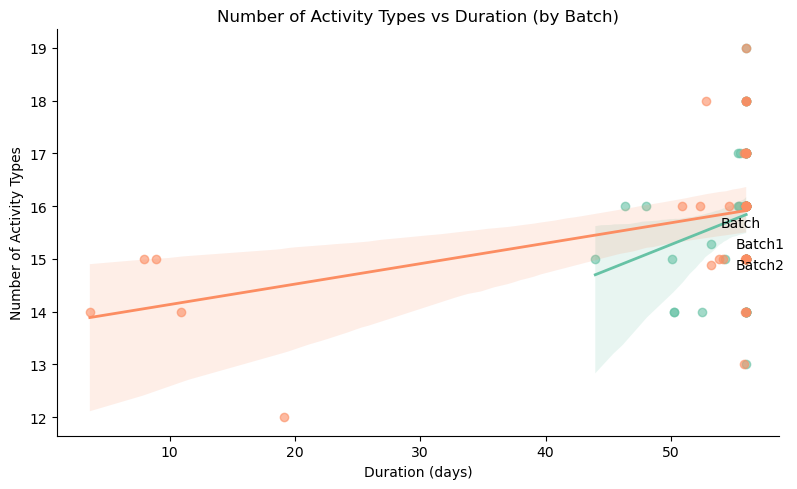

/Users/yooseohyeon/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/sf/9jlqrh113_q921773s9l46m80000gn/T/ipykernel_21546/172604325.py:43: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


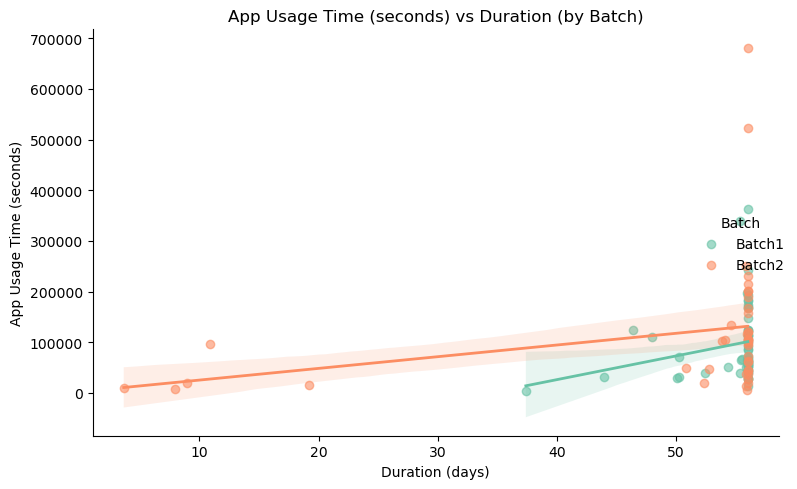

/Users/yooseohyeon/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/sf/9jlqrh113_q921773s9l46m80000gn/T/ipykernel_21546/172604325.py:43: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


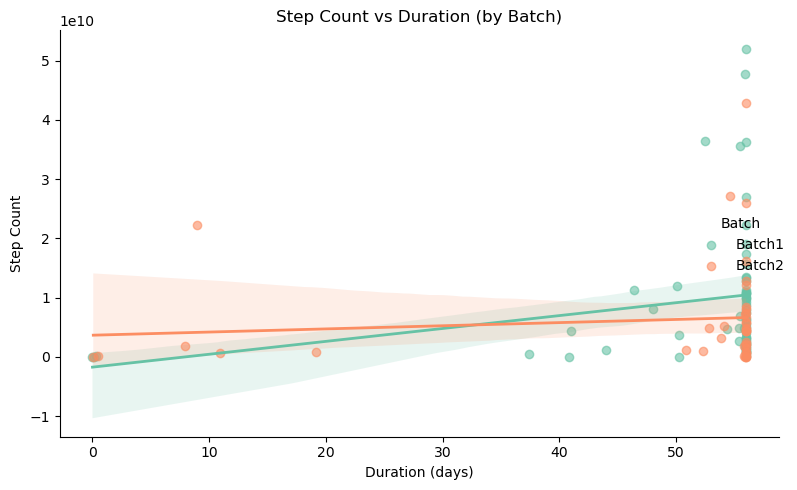

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the summary data
df = pd.read_csv("source_summary_with_value_analysis.csv")

# Pivot to user-level data
user_metrics = df.pivot_table(
    index=["Batch", "User"],
    values=[
        "Duration_days", "TotalSteps", "TotalAppUse_sec",
        "SCREEN_OFF_ratio", "Detached_ratio", "AvgCallDuration_sec",
        "UniqueBluetoothDevices", "UniqueActivityTypes"
    ],
    aggfunc="max"
).reset_index()

# Metrics to plot (label is English)
metrics_to_plot = [
    ("UniqueActivityTypes", "Number of Activity Types"),
    ("TotalAppUse_sec", "App Usage Time (seconds)"),
    ("TotalSteps", "Step Count")
]

# Plot by Batch with regression lines
for metric, label in metrics_to_plot:
    plot_data = user_metrics[["Batch", "Duration_days", metric]].dropna()
    sns.lmplot(
        data=plot_data,
        x="Duration_days",
        y=metric,
        hue="Batch",
        palette="Set2",
        height=5,
        aspect=1.4,
        scatter_kws={"alpha": 0.6},
        line_kws={"linewidth": 2}
    )
    plt.title(f"{label} vs Duration (by Batch)")
    plt.xlabel("Duration (days)")
    plt.ylabel(label)
    plt.tight_layout()
    plt.savefig(f"batchwise_duration_vs_{metric}.png")
    plt.show()

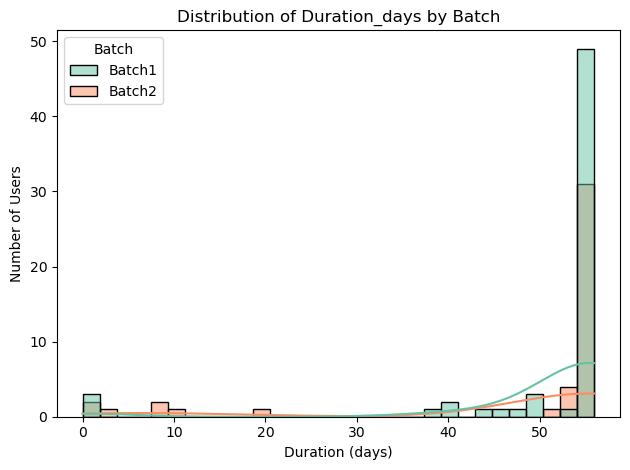

In [18]:
# 사용자별 Duration 분포 시각화
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=user_metrics, x="Duration_days", hue="Batch", bins=30, kde=True, palette="Set2")
plt.title("Distribution of Duration_days by Batch")
plt.xlabel("Duration (days)")
plt.ylabel("Number of Users")
plt.tight_layout()
plt.show()

In [19]:
import pandas as pd

# 파일 불러오기
df = pd.read_csv("source_summary_with_value_analysis.csv")

# 사용자 단위로 pivot: 사용자당 하나의 row
user_df = df.pivot_table(
    index=["Batch", "User"],
    values=[
        "Duration_days", "TotalSteps", "TotalAppUse_sec",
        "UniqueActivityTypes"
    ],
    aggfunc="max"
).reset_index()

# 정규화: 하루 단위로 나눈다
user_df["steps_per_day"] = user_df["TotalSteps"] / user_df["Duration_days"]
user_df["app_use_per_day"] = user_df["TotalAppUse_sec"] / user_df["Duration_days"]
user_df["activity_types_per_day"] = user_df["UniqueActivityTypes"] / user_df["Duration_days"]

# 소수점 정리 (선택)
user_df = user_df.round({
    "steps_per_day": 2,
    "app_use_per_day": 2,
    "activity_types_per_day": 3
})

# 결과 저장
user_df.to_csv("user_metrics_per_day.csv", index=False, encoding="utf-8-sig")
print("✅ 저장 완료: user_metrics_per_day.csv")
print(user_df.head())

✅ 저장 완료: user_metrics_per_day.csv
    Batch         User  Duration_days  TotalAppUse_sec    TotalSteps  \
0  Batch1  cmp1_usr541      55.999350       100285.891  1.531305e+09   
1  Batch1  cmp1_usr543      40.787479              NaN  6.874400e+04   
2  Batch1  cmp1_usr544      43.963040        30336.788  1.160891e+09   
3  Batch1  cmp1_usr545      55.980659       113617.905  5.020950e+09   
4  Batch1  cmp1_usr546      56.000000       361946.990  2.606161e+09   

   UniqueActivityTypes  steps_per_day  app_use_per_day  activity_types_per_day  
0                 16.0    27345044.50          1790.84                   0.286  
1                  NaN        1685.42              NaN                     NaN  
2                 15.0    26406065.72           690.05                   0.341  
3                 16.0    89690790.76          2029.59                   0.286  
4                 14.0    46538597.33          6463.34                   0.250  


📦 Batch1: 84it [00:00, 97.14it/s] 
📦 Batch2: 91it [00:00, 134.28it/s]
/var/folders/sf/9jlqrh113_q921773s9l46m80000gn/T/ipykernel_21546/1338715298.py:82: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
/var/folders/sf/9jlqrh113_q921773s9l46m80000gn/T/ipykernel_21546/1338715298.py:83: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.savefig(f"heatmap_source_{SOURCE}_{batch_name.lower()}.png", dpi=300)
/Users/yooseohyeon/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


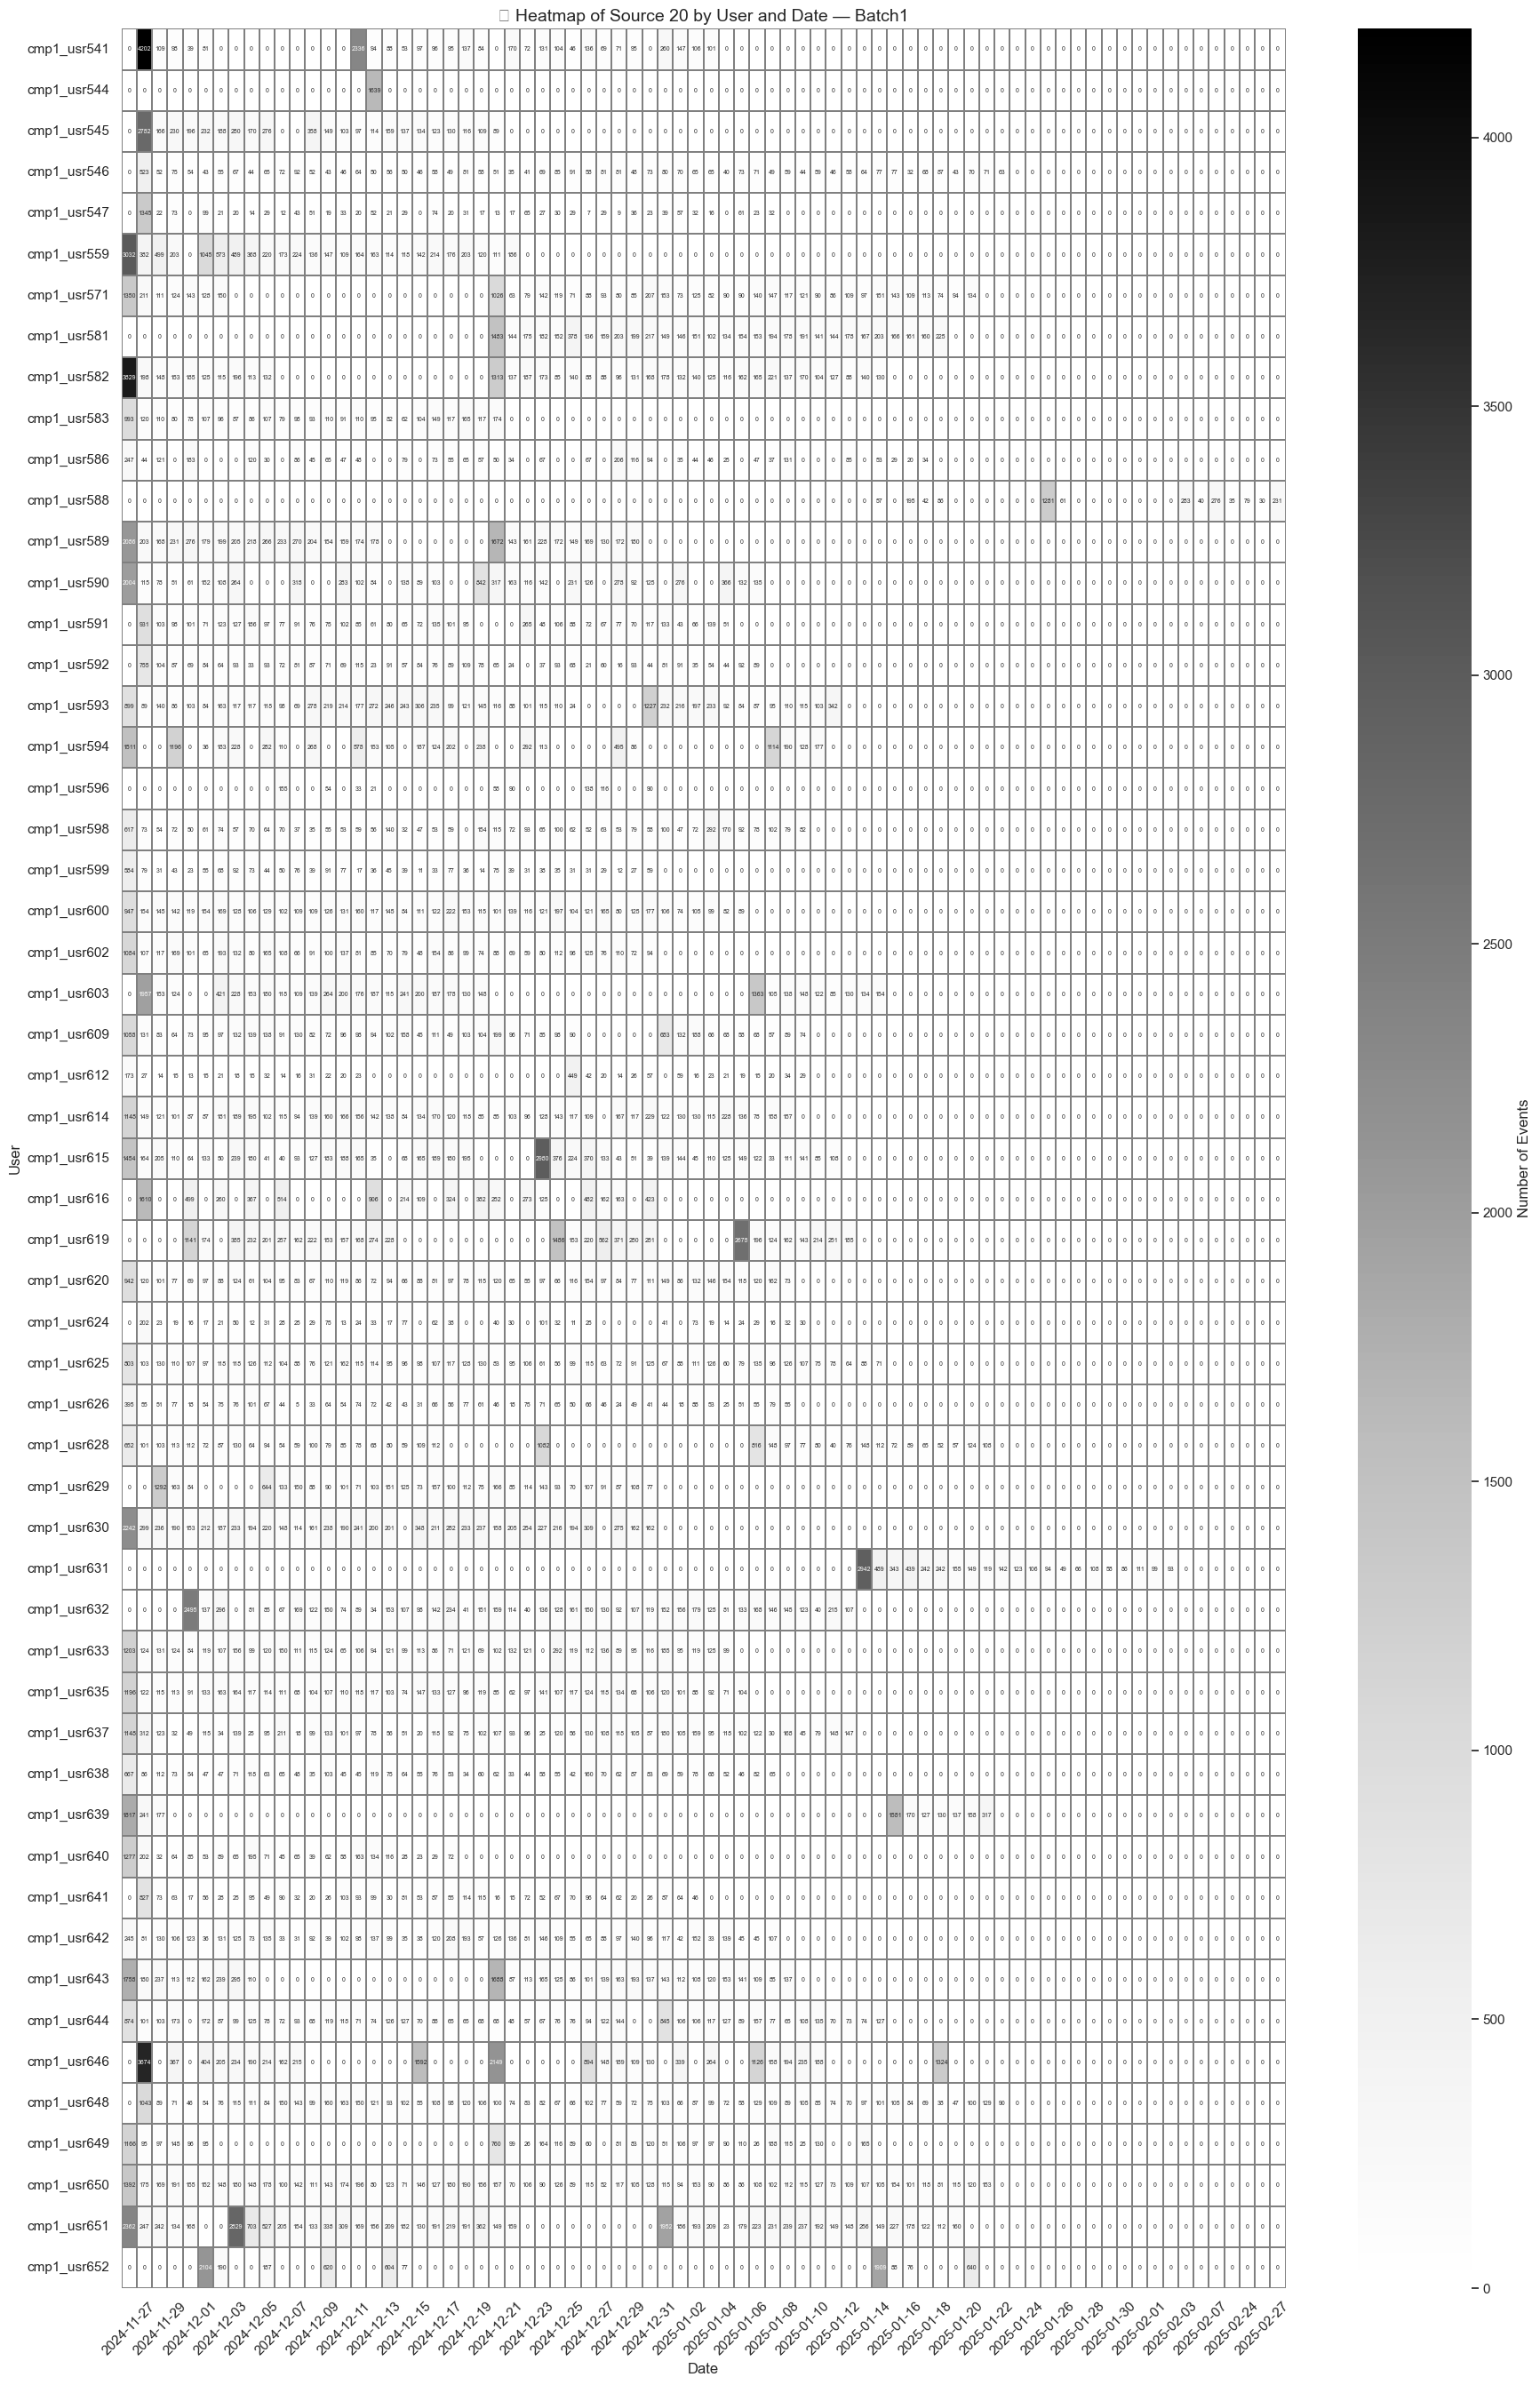

/var/folders/sf/9jlqrh113_q921773s9l46m80000gn/T/ipykernel_21546/1338715298.py:82: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
/var/folders/sf/9jlqrh113_q921773s9l46m80000gn/T/ipykernel_21546/1338715298.py:83: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.savefig(f"heatmap_source_{SOURCE}_{batch_name.lower()}.png", dpi=300)
/Users/yooseohyeon/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


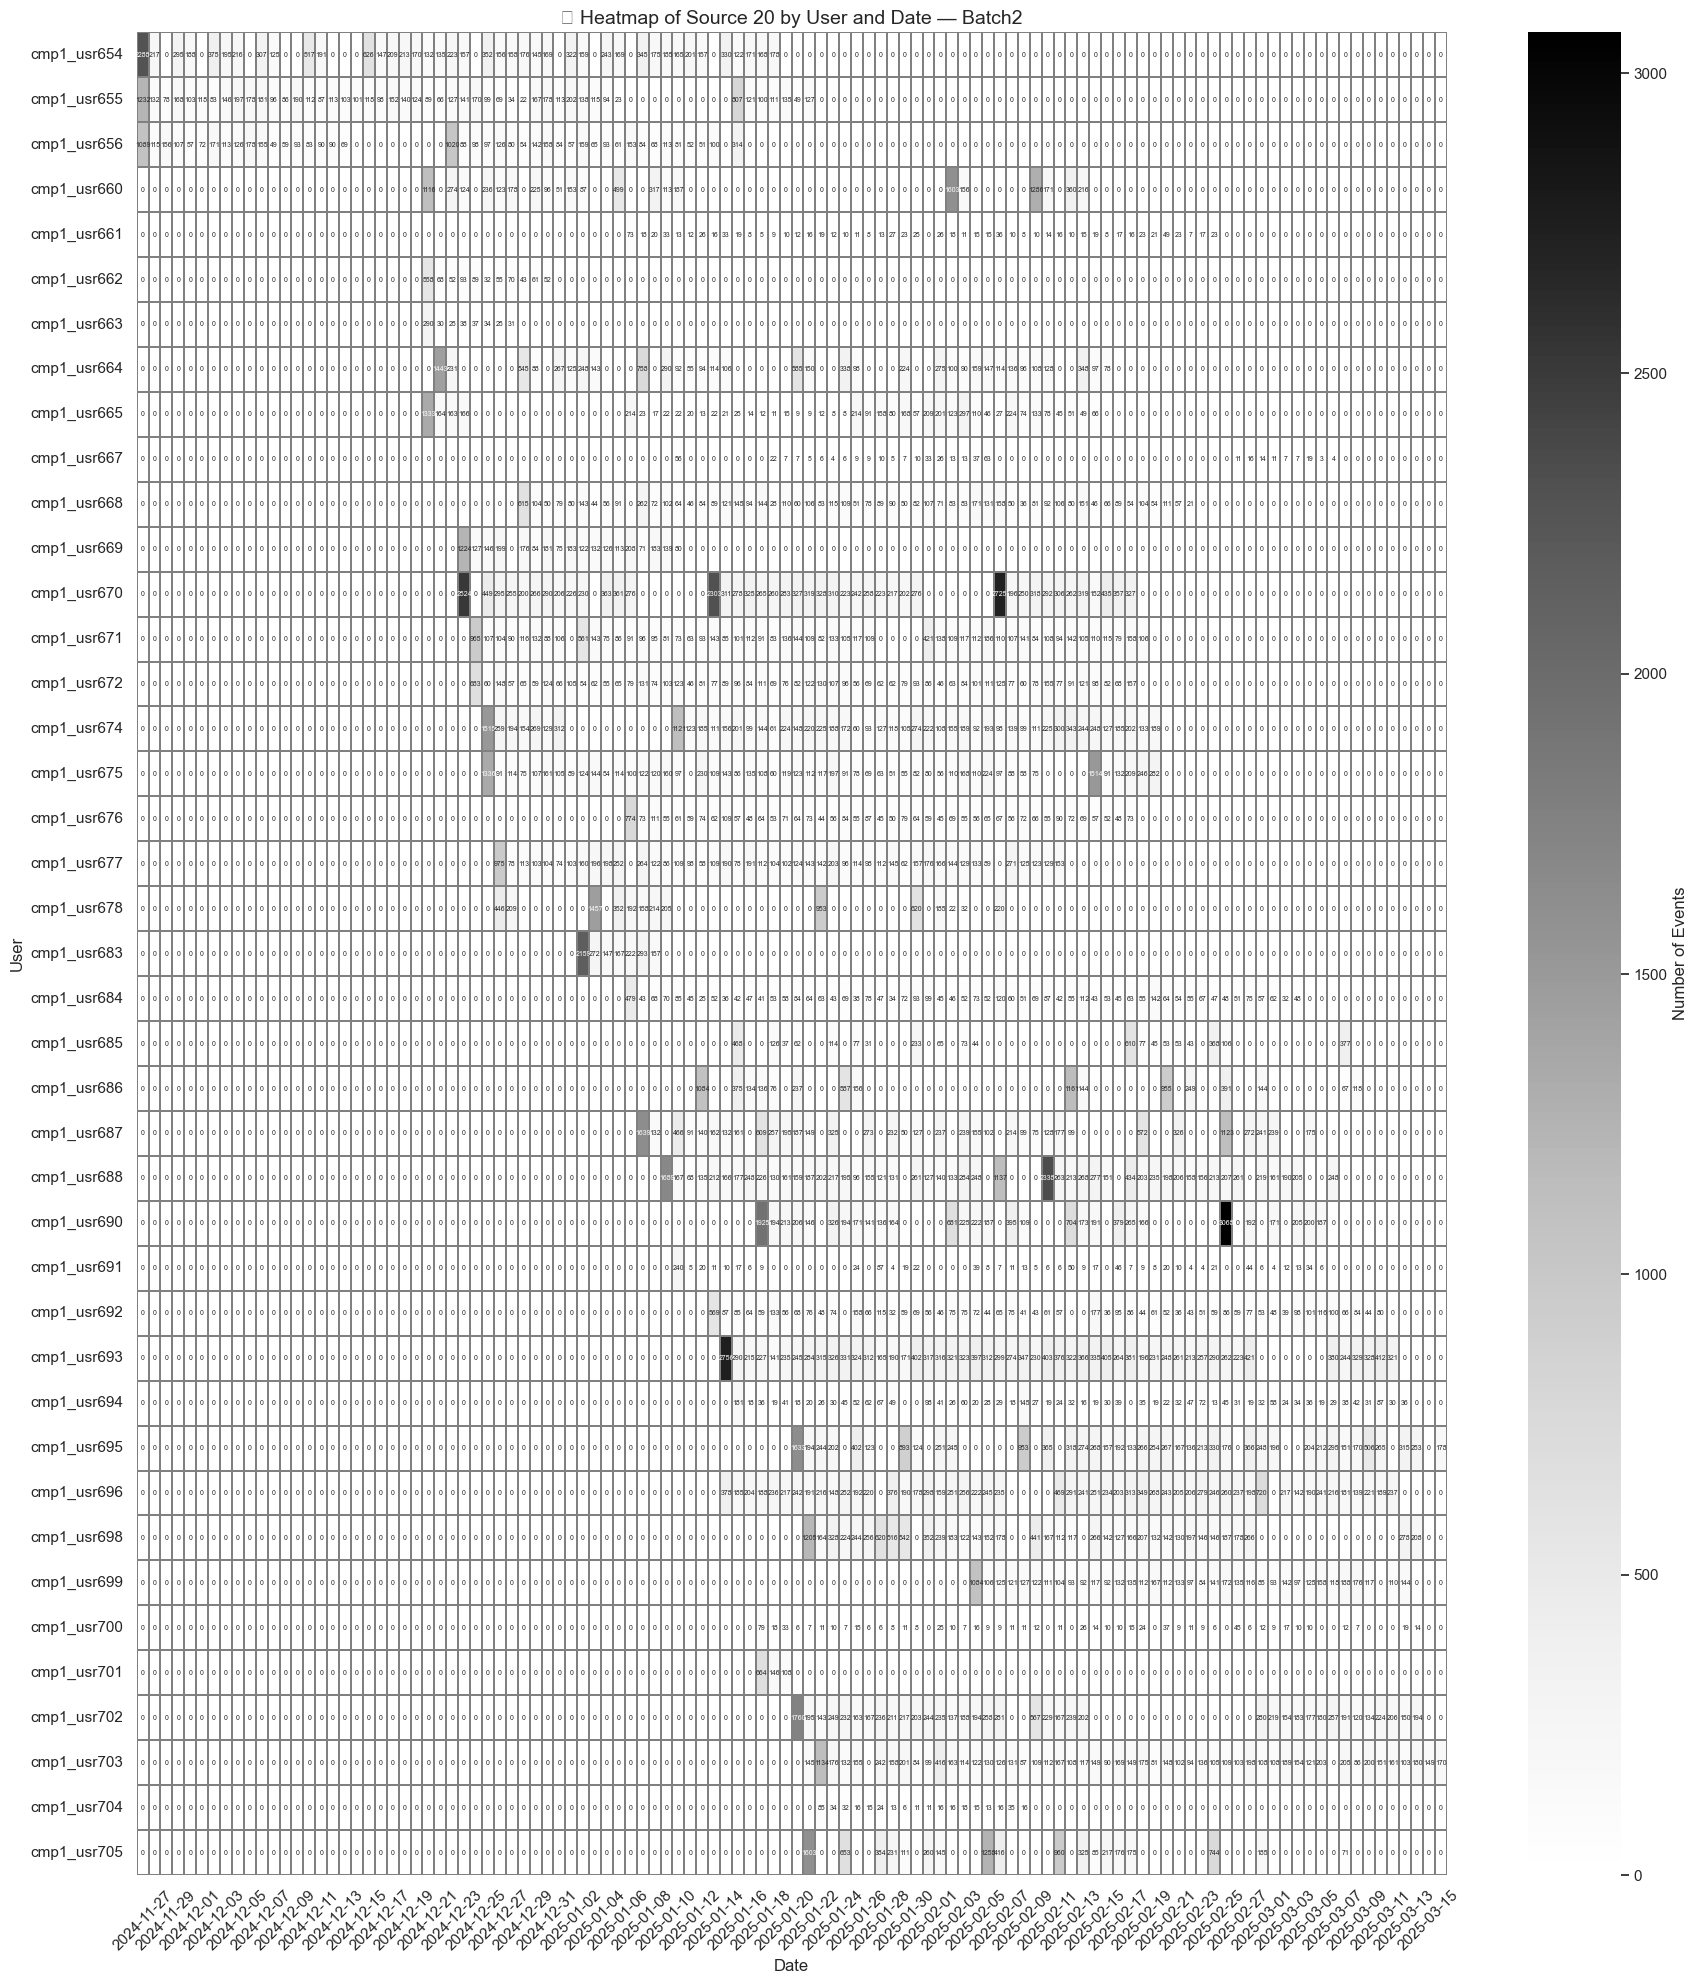

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import json
from tqdm import tqdm

# 설정
SOURCE = 20  # 예시: ScreenState
KEY_DATE = "timestamp"
SOURCE_NAME = f"Source {SOURCE}"

base_path = Path("/Users/yooseohyeon/Desktop/170325/eva_250121_processed")
BATCHES = ["Batch1", "Batch2"]
EIGHT_WEEKS_MS = 56 * 24 * 60 * 60 * 1000  # 8주 in milliseconds

# 각 Batch별 카운트 저장용
batch_counts = {
    "Batch1": [],
    "Batch2": []
}

for batch_name in BATCHES:
    batch_path = base_path / batch_name
    for user_folder in tqdm(batch_path.iterdir(), desc=f"📦 {batch_name}"):
        if not user_folder.is_dir():
            continue
        user_id = user_folder.name
        user_suffix = int(user_id[-3:])
        if (batch_name == "Batch1" and user_suffix not in Batch1) or \
           (batch_name == "Batch2" and user_suffix not in Batch2):
            continue

        file_path = user_folder / f"source_{SOURCE}" / f"data_source_{SOURCE}.csv"
        if not file_path.exists():
            continue

        try:
            df = pd.read_csv(file_path)
            if df.empty or "timestamp" not in df.columns:
                continue

            # 🔹 8주 제한
            df = df.sort_values("timestamp")
            start_ts = df["timestamp"].iloc[0]
            cutoff_ts = start_ts + EIGHT_WEEKS_MS
            df = df[df["timestamp"] <= cutoff_ts]

            df["timestamp"] = pd.to_datetime(df["timestamp"], unit="ms")
            df["date"] = df["timestamp"].dt.date
            count_per_day = df.groupby("date").size().reset_index(name="count")
            for _, row in count_per_day.iterrows():
                batch_counts[batch_name].append({
                    "User": user_id,
                    "Date": row["date"],
                    "Count": row["count"]
                })

        except Exception as e:
            print(f"[⚠️ Error] {user_id} in {batch_name}: {e}")

# 🔥 Batch별 시각화
for batch_name, records in batch_counts.items():
    df_counts = pd.DataFrame(records)
    pivot = df_counts.pivot(index="User", columns="Date", values="Count").fillna(0)

    plt.figure(figsize=(18, max(10, len(pivot)//2)))
    sns.heatmap(
        pivot,
        cmap="Greys",
        linewidths=0.2,
        linecolor='gray',
        annot=True,
        fmt=".0f",
        cbar_kws={'label': 'Number of Events'},
        annot_kws={"fontsize": 5}
    )
    plt.title(f"📊 Heatmap of {SOURCE_NAME} by User and Date — {batch_name}", fontsize=14)
    plt.xlabel("Date")
    plt.ylabel("User")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f"heatmap_source_{SOURCE}_{batch_name.lower()}.png", dpi=300)
    plt.show()

/var/folders/sf/9jlqrh113_q921773s9l46m80000gn/T/ipykernel_21546/2747289657.py:24: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  plt.tight_layout()
/var/folders/sf/9jlqrh113_q921773s9l46m80000gn/T/ipykernel_21546/2747289657.py:25: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  plt.savefig(f"enhanced_heatmap_source_{SOURCE}.png", dpi=300)
/Users/yooseohyeon/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


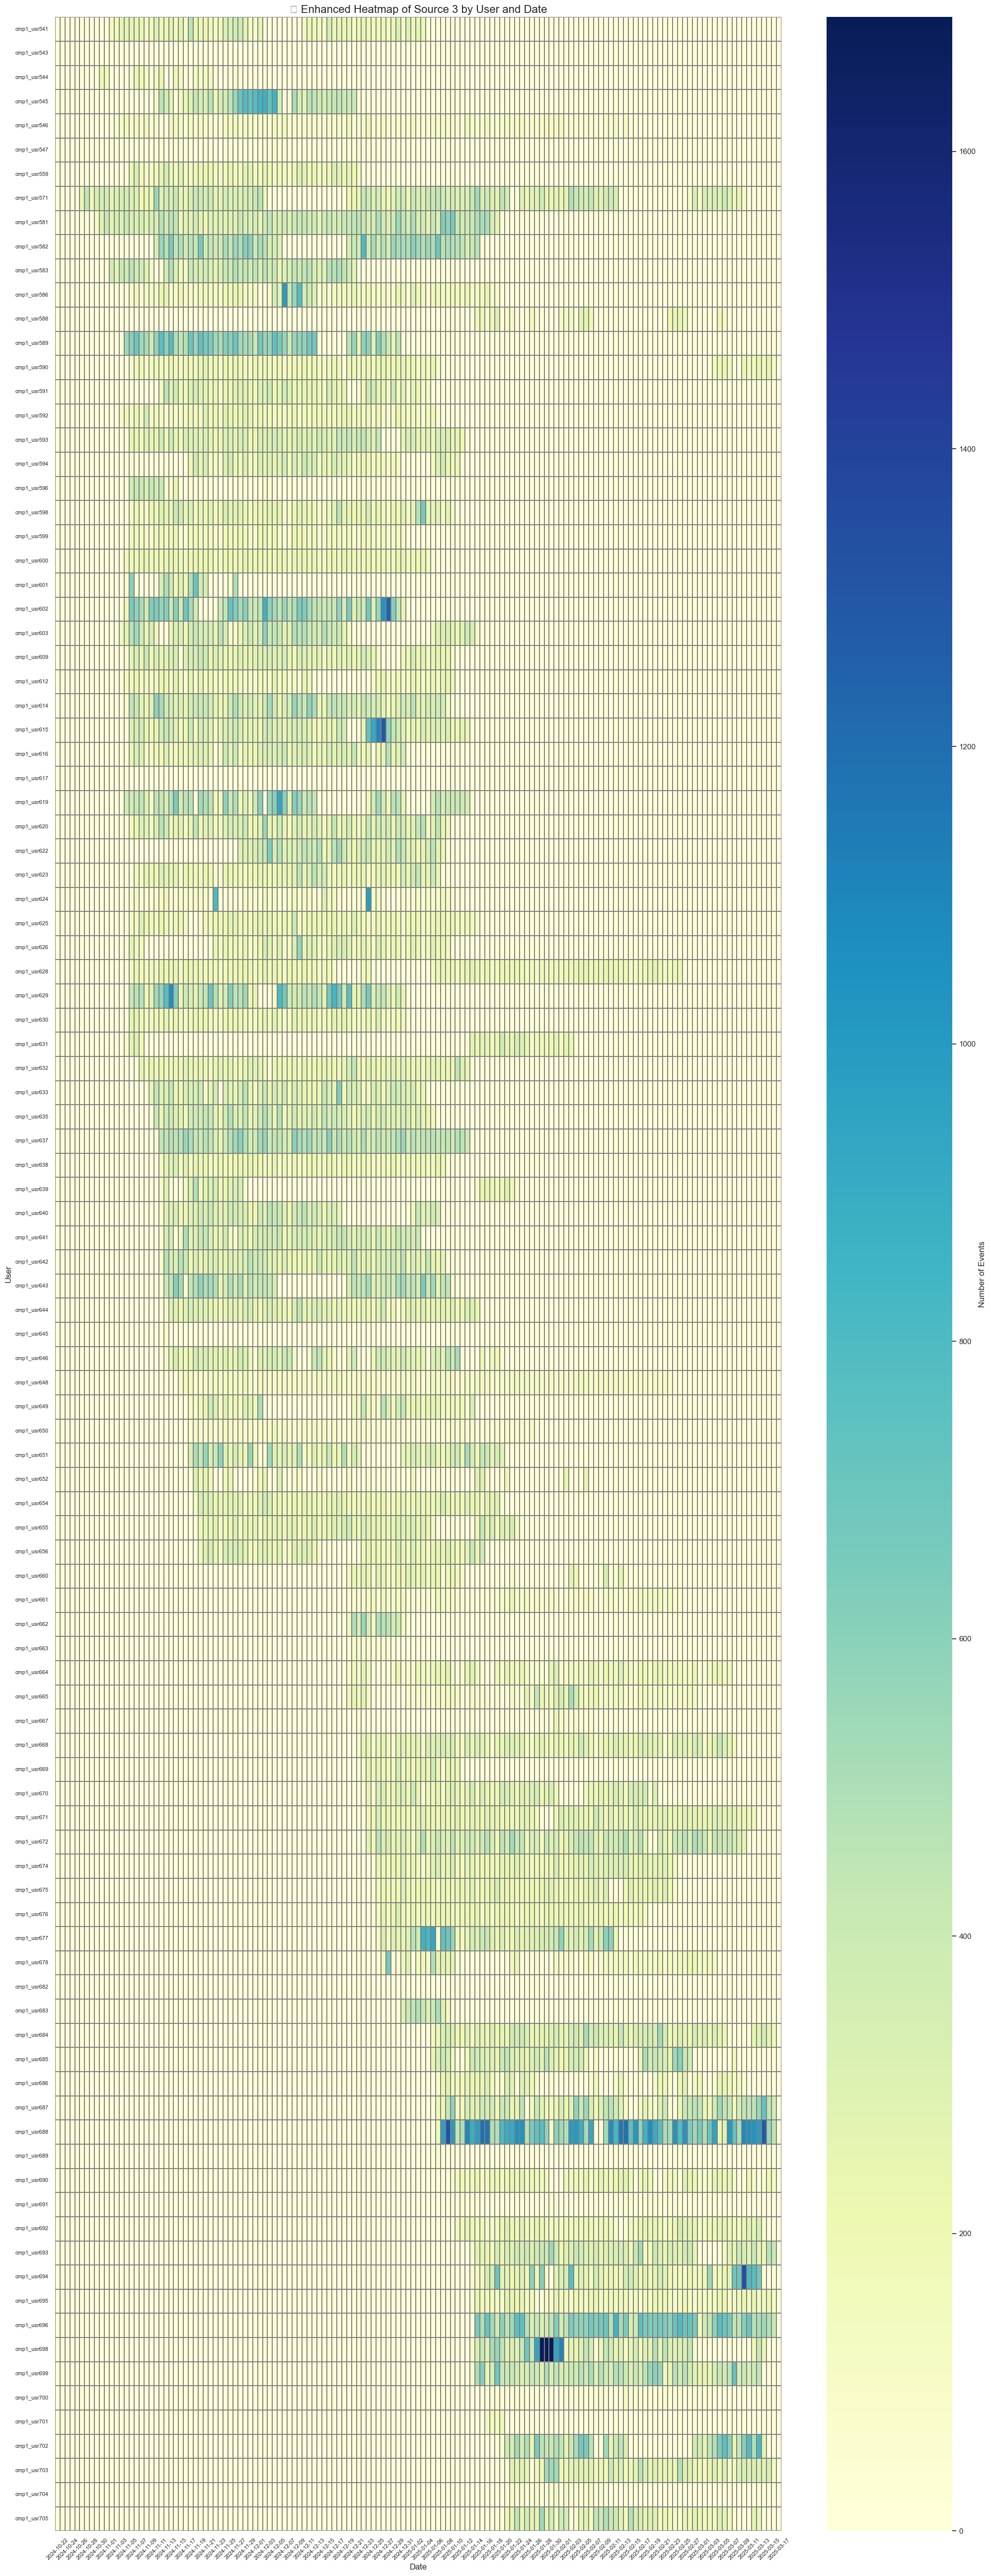

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# 기존 pivot 데이터프레임이 있다고 가정
# 예: pivot = df_counts.pivot(index="User", columns="Date", values="Count").fillna(0)

plt.figure(figsize=(20, max(10, len(pivot)//2)))

# 💡 cmap을 'YlGnBu'로 변경하고 vmax 조정하여 대비를 높임
sns.heatmap(
    pivot,
    cmap="YlGnBu",          # 색상: 연노랑~파랑 (눈에 잘 띔)
    linewidths=0.2,
    linecolor='gray',
    cbar_kws={'label': 'Number of Events'},
    vmax=pivot.values.max() * 0.8  # 최고값 대비 80%까지만 색 강조 → outlier 영향 줄이기
)

plt.title(f"🔥 Enhanced Heatmap of Source {SOURCE} by User and Date", fontsize=16)
plt.xlabel("Date")
plt.ylabel("User")
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.savefig(f"enhanced_heatmap_source_{SOURCE}.png", dpi=300)
plt.show()

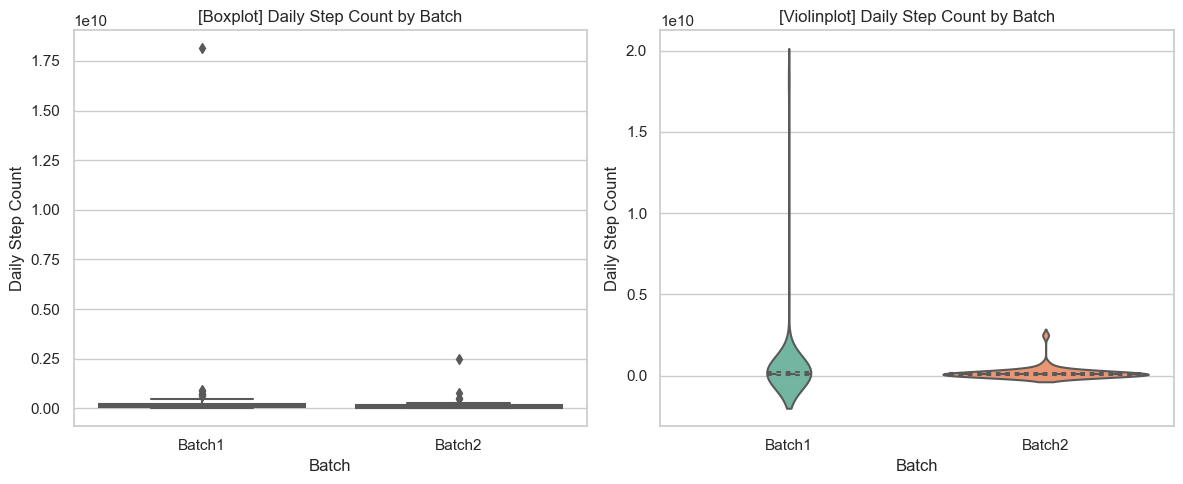

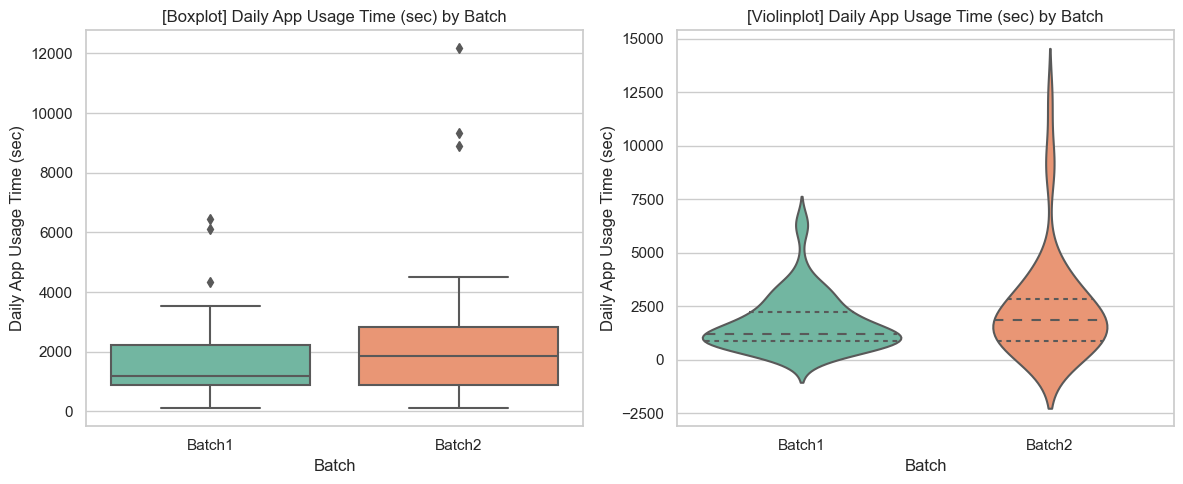

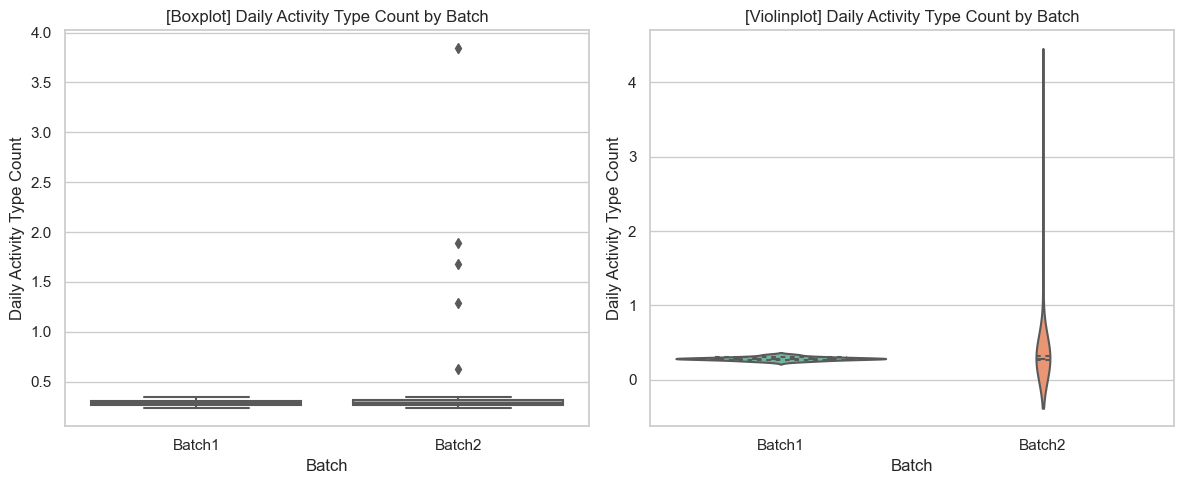

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 정규화된 사용자 데이터 불러오기
df = pd.read_csv("user_metrics_per_day.csv")

# 시각화 대상 지표들
per_day_metrics = [
    ("steps_per_day", "Daily Step Count"),
    ("app_use_per_day", "Daily App Usage Time (sec)"),
    ("activity_types_per_day", "Daily Activity Type Count")
]

# 스타일
sns.set(style="whitegrid")

# 각 metric별로 Boxplot + Violinplot 그리기
for metric, label in per_day_metrics:
    plot_data = df[["Batch", metric]].dropna()

    plt.figure(figsize=(12, 5))

    # 📦 Boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(data=plot_data, x="Batch", y=metric, palette="Set2")
    plt.title(f"[Boxplot] {label} by Batch")
    plt.xlabel("Batch")
    plt.ylabel(label)

    # 🎻 Violinplot
    plt.subplot(1, 2, 2)
    sns.violinplot(data=plot_data, x="Batch", y=metric, palette="Set2", inner="quartile")
    plt.title(f"[Violinplot] {label} by Batch")
    plt.xlabel("Batch")
    plt.ylabel(label)

    plt.tight_layout()
    plt.savefig(f"batch_comparison_{metric}.png")
    plt.show()

/Users/yooseohyeon/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


✅ Cluster Summary:
         steps_per_day  app_use_per_day  activity_types_per_day  \
Cluster                                                           
0         7.800282e+07         12164.35                    0.27   
1         1.837913e+08          1776.19                    0.37   
2         1.813375e+10             0.00                     NaN   

         Detached_ratio  SCREEN_OFF_ratio  AvgCallDuration_sec  \
Cluster                                                          
0                  0.05              0.40              2004.48   
1                  0.03              0.38                95.88   
2                   NaN               NaN                  NaN   

         UniqueBluetoothDevices  location_points_per_day  rowcount_per_day  
Cluster                                                                     
0                          0.00                      0.0           7638.95  
1                          3.38                      0.0           6058.90  
2     

/Users/yooseohyeon/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/sf/9jlqrh113_q921773s9l46m80000gn/T/ipykernel_21546/2866504756.py:67: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


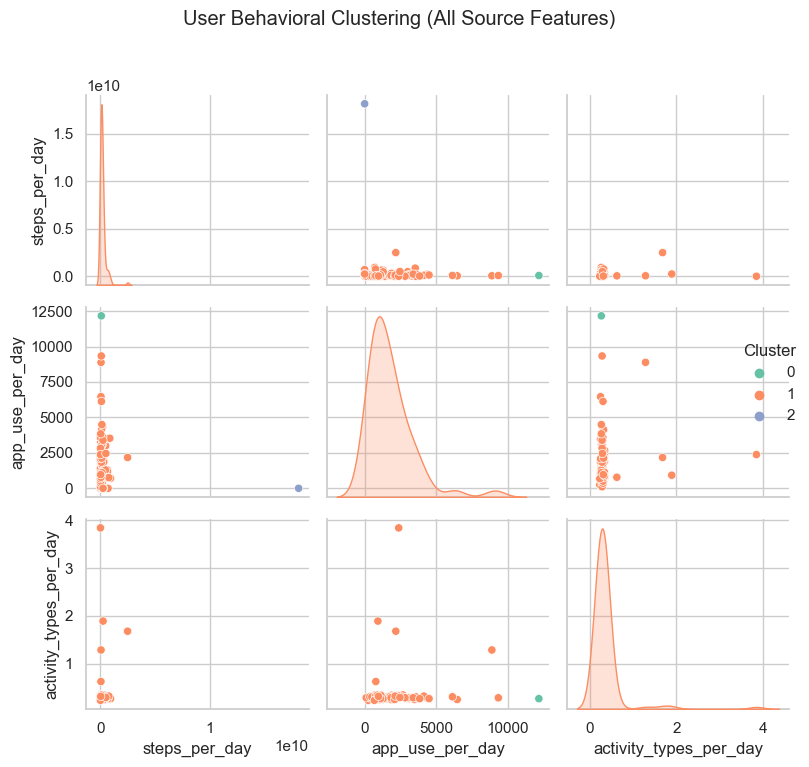

In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load data
df = pd.read_csv("source_summary_with_value_analysis.csv")

# 2. Aggregate to user level
agg_df = df.groupby(["Batch", "User"]).agg({
    "Duration_days": "max",
    "TotalSteps": "sum",
    "TotalAppUse_sec": "sum",
    "UniqueActivityTypes": "max",
    "Detached_ratio": "mean",
    "SCREEN_OFF_ratio": "mean",
    "AvgCallDuration_sec": "mean",
    "UniqueBluetoothDevices": "max",
    "LocationPoints": "sum",
    "RowCount": "sum"
}).reset_index()

# 3. Create normalized per-day metrics
agg_df["steps_per_day"] = agg_df["TotalSteps"] / agg_df["Duration_days"]
agg_df["app_use_per_day"] = agg_df["TotalAppUse_sec"] / agg_df["Duration_days"]
agg_df["activity_types_per_day"] = agg_df["UniqueActivityTypes"] / agg_df["Duration_days"]
agg_df["location_points_per_day"] = agg_df["LocationPoints"] / agg_df["Duration_days"]
agg_df["rowcount_per_day"] = agg_df["RowCount"] / agg_df["Duration_days"]

# 4. Select features for clustering
features = [
    "steps_per_day",
    "app_use_per_day",
    "activity_types_per_day",
    "Detached_ratio",
    "SCREEN_OFF_ratio",
    "AvgCallDuration_sec",
    "UniqueBluetoothDevices",
    "location_points_per_day",
    "rowcount_per_day"
]

# 5. Standardize features
X = agg_df[features].fillna(0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
agg_df["Cluster"] = kmeans.fit_predict(X_scaled)

# 7. Reorder cluster labels by behavioral activity
cluster_means = agg_df.groupby("Cluster")[["steps_per_day", "app_use_per_day", "activity_types_per_day"]].mean().sum(axis=1)
cluster_order = cluster_means.sort_values().index.tolist()
cluster_map = {old: new for new, old in enumerate(cluster_order)}
agg_df["Cluster"] = agg_df["Cluster"].map(cluster_map)

# 8. Cluster summary
cluster_summary = agg_df.groupby("Cluster")[features].mean().round(2)
print("✅ Cluster Summary:")
print(cluster_summary)

# 9. Pairplot (선택)
sns.pairplot(agg_df, vars=["steps_per_day", "app_use_per_day", "activity_types_per_day"], hue="Cluster", palette="Set2")
plt.suptitle("User Behavioral Clustering (All Source Features)", y=1.02)
plt.tight_layout()
plt.show()

# 10. Save
agg_df.to_csv("user_behavioral_clusters.csv", index=False)

📁 통계 결과 저장 완료: /Users/yooseohyeon/Desktop/170325/eva_250121_processed/category_frequency_summary.csv


/Users/yooseohyeon/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/sf/9jlqrh113_q921773s9l46m80000gn/T/ipykernel_21546/3390675806.py:96: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
/var/folders/sf/9jlqrh113_q921773s9l46m80000gn/T/ipykernel_21546/3390675806.py:96: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/yooseohyeon/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


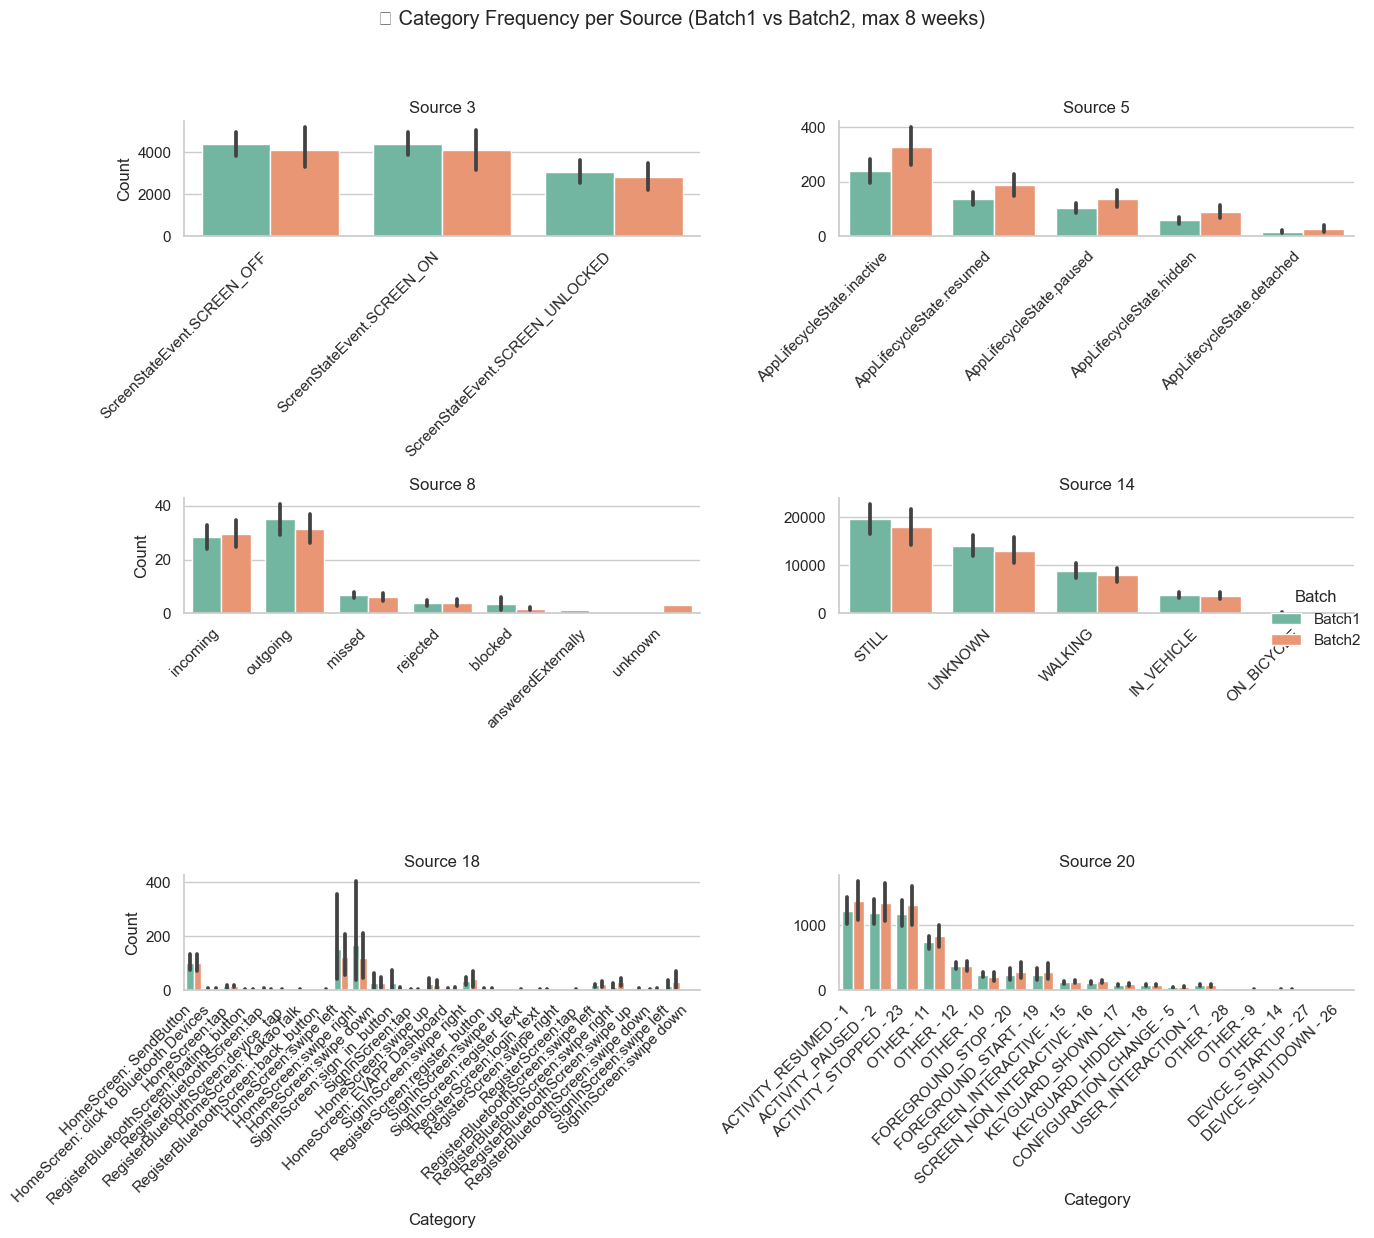

In [27]:
import pandas as pd
import json
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

# 설정
base_path = Path("/Users/yooseohyeon/Desktop/170325/eva_250121_processed")
SOURCE_CATEGORICAL_KEYS = {
    3: "state",
    5: "state",
    8: "type",
    14: "activityType",
    18: "gestureType",
    20: "activityType"
}
BATCHES = ["Batch1", "Batch2"]
EIGHT_WEEKS_MS = 56 * 24 * 60 * 60 * 1000

Batch1 = [541, 542, 543, 544, 545, 546, 547, 559, 571, 581, 582, 583, 584, 586, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 607, 608, 609, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 628, 629, 630, 631, 632, 633, 635, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 648, 649, 650, 651, 652]
Batch2 = [654, 655, 656, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 674, 675, 676, 677, 678, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 698, 699, 700, 701, 702, 703, 704, 705]

results = []

for batch_name in BATCHES:
    batch_path = base_path / batch_name
    for user_folder in batch_path.iterdir():
        if not user_folder.is_dir():
            continue
        user_id = user_folder.name
        user_suffix = int(user_id[-3:])
        if batch_name == 'Batch1' and user_suffix not in Batch1:
            continue
        if batch_name == 'Batch2' and user_suffix not in Batch2:
            continue

        for src, key in SOURCE_CATEGORICAL_KEYS.items():
            file_path = user_folder / f"source_{src}" / f"data_source_{src}.csv"
            if not file_path.exists():
                continue
            try:
                df = pd.read_csv(file_path)
                if df.empty or "timestamp" not in df.columns:
                    continue

                df = df.sort_values("timestamp")
                start_ts = df["timestamp"].iloc[0]
                end_ts = df["timestamp"].iloc[-1]
                duration = end_ts - start_ts

                # ✅ 8주 초과 시 자르기
                if duration > EIGHT_WEEKS_MS:
                    cutoff_ts = start_ts + EIGHT_WEEKS_MS
                    df = df[df["timestamp"] <= cutoff_ts]

                # ✅ value 파싱 및 카테고리 추출
                df["parsed"] = df["value"].apply(lambda x: json.loads(x.replace("'", '"')) if pd.notnull(x) else {})
                df["category"] = df["parsed"].apply(lambda d: d.get(key, "Unknown"))

                for cat, count in df["category"].value_counts().items():
                    results.append({
                        "Batch": batch_name,
                        "User": user_id,
                        "Source": src,
                        "Category": cat,
                        "Count": count
                    })
            except Exception as e:
                print(f"[⚠️ Error] {file_path}: {e}")
                continue

# 📊 시각화용 데이터프레임
df_results = pd.DataFrame(results)
# ✅ 📁 CSV 저장
csv_path = base_path / "category_frequency_summary.csv"
df_results.to_csv(csv_path, index=False)
print(f"📁 통계 결과 저장 완료: {csv_path}")
# 시각화
g = sns.catplot(
    data=df_results,
    kind="bar",
    x="Category",
    y="Count",
    hue="Batch",
    col="Source",
    col_wrap=2,
    height=4,
    aspect=1.6,
    sharex=False,
    sharey=False,
    palette="Set2"
)
g.set_titles("Source {col_name}")
g.set_xticklabels(rotation=45, ha="right")
g.fig.suptitle("📊 Category Frequency per Source (Batch1 vs Batch2, max 8 weeks)", y=1.03)
plt.tight_layout()
plt.show()

In [28]:
import pandas as pd
import json
from pathlib import Path
from tqdm import tqdm
from itertools import combinations

# 설정
base_path = Path("/Users/yooseohyeon/Desktop/170325/eva_250121_processed")
BATCHES = ["Batch1", "Batch2"]
EIGHT_WEEKS_MS = 56 * 24 * 60 * 60 * 1000  # 8주
TIME_WINDOW_MS = 60 * 1000  # ±1분

# 사용자 ID 리스트
Batch1 = [541, 542, 543, 544, 545, 546, 547, 559, 571, 581, 582, 583, 584, 586, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 607, 608, 609, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 628, 629, 630, 631, 632, 633, 635, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 648, 649, 650, 651, 652]
Batch2 = [654, 655, 656, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 674, 675, 676, 677, 678, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 698, 699, 700, 701, 702, 703, 704, 705]


# Source 정의 및 주요 필드
SOURCE_LIST = [2, 3, 5, 7, 8, 9, 10, 14, 18, 20]
SOURCE_FIELDS = {
    2: "bluetoothName",
    3: "state",
    5: "state",
    7: "latitude",
    8: "type",
    9: "packageName",
    10: "steps",
    14: "activityType",
    18: "gestureType",
    20: "activityType"
}

# 결과 저장용
match_summary = []

# 모든 Source 쌍 조합
source_pairs = list(combinations(SOURCE_LIST, 2))

for batch_name in BATCHES:
    batch_path = base_path / batch_name
    for user_folder in tqdm(list(batch_path.iterdir()), desc=f"🔍 {batch_name}"):
        if not user_folder.is_dir():
            continue
        user_id = user_folder.name
        user_suffix = int(user_id[-3:])
        if batch_name == "Batch1" and user_suffix not in Batch1:
            continue
        if batch_name == "Batch2" and user_suffix not in Batch2:
            continue

        user_data = {}
        for src in SOURCE_LIST:
            file_path = user_folder / f"source_{src}" / f"data_source_{src}.csv"
            if not file_path.exists():
                continue
            try:
                df = pd.read_csv(file_path)
                if df.empty or "timestamp" not in df.columns:
                    continue
                df = df.sort_values("timestamp")
                start_ts = df["timestamp"].iloc[0]
                cutoff_ts = start_ts + EIGHT_WEEKS_MS
                df = df[df["timestamp"] <= cutoff_ts]
                df["parsed"] = df["value"].apply(lambda x: json.loads(x.replace("'", '"')) if pd.notnull(x) else {})
                df["event"] = df["parsed"].apply(lambda x: x.get(SOURCE_FIELDS[src], "UNKNOWN"))
                user_data[src] = df[["timestamp", "event"]]
            except Exception as e:
                print(f"⚠️ Error loading source {src} for {user_id}: {e}")
                continue

        # 쌍별 비교
        for src_a, src_b in source_pairs:
            if src_a not in user_data or src_b not in user_data:
                continue
            df_a = user_data[src_a]
            df_b = user_data[src_b]

            match_count = 0
            for _, row in df_a.iterrows():
                ts = row["timestamp"]
                matches = df_b[(df_b["timestamp"] >= ts - TIME_WINDOW_MS) &
                               (df_b["timestamp"] <= ts + TIME_WINDOW_MS)]
                match_count += len(matches)

            match_summary.append({
                "Batch": batch_name,
                "User": user_id,
                "SourceA": src_a,
                "SourceB": src_b,
                "CooccurrenceCount": match_count,
                "EventCountA": len(df_a),
                "EventCountB": len(df_b),
                "Ratio": match_count / max(len(df_a), 1)
            })

# DataFrame으로 저장
df_summary = pd.DataFrame(match_summary)
df_summary.to_csv("all_source_cooccurrence_summary.csv", index=False)
print("✅ 저장 완료: all_source_cooccurrence_summary.csv")

🔍 Batch1:   0%|          | 0/84 [00:00<?, ?it/s]

⚠️ Error loading source 7 for cmp1_usr625: Expecting value: line 1 column 174 (char 173)


🔍 Batch1:   1%|          | 1/84 [03:36<5:00:08, 216.96s/it]

⚠️ Error loading source 7 for cmp1_usr622: Expecting value: line 1 column 215 (char 214)


🔍 Batch1:   1%|          | 1/84 [03:45<5:12:22, 225.81s/it]


KeyboardInterrupt: 

In [29]:
import pandas as pd
import json
from pathlib import Path
from tqdm import tqdm

# 설정
base_path = Path("/Users/yooseohyeon/Desktop/170325/eva_250121_processed")  # 실제 경로로 변경
BATCHES = ["Batch1", "Batch2"]
EIGHT_WEEKS_MS = 56 * 24 * 60 * 60 * 1000  # 8주
DROP_WINDOW_MS = 5 * 60 * 1000  # ±5분

Batch1 = [541, 542, 543, 544, 545, 546, 547, 559, 571, 581, 582, 583, 584, 586, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 607, 608, 609, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 628, 629, 630, 631, 632, 633, 635, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 648, 649, 650, 651, 652]
Batch2 = [654, 655, 656, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 674, 675, 676, 677, 678, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 698, 699, 700, 701, 702, 703, 704, 705]


# Dropout 발생 Source 및 key/trigger 값 정의
DROPOUT_TRIGGERS = {
    5: {"state": ["AppLifecycleState.detached"]},
    20: {"activityType": ["ACTIVITY_STOPPED", "FOREGROUND_STOP"]}
}

# Context용 Source 및 추출할 필드
CONTEXT_SOURCES = {
    2: "bluetoothName",
    3: "state",
    8: "type",
    9: "packageName",
    14: "activityType",
    18: "gestureType"
}

results = []

for batch_name in BATCHES:
    batch_path = base_path / batch_name
    for user_folder in tqdm(list(batch_path.iterdir()), desc=f"🔍 Processing {batch_name}"):
        if not user_folder.is_dir():
            continue
        user_id = user_folder.name
        user_suffix = int(user_id[-3:])
        if batch_name == "Batch1" and user_suffix not in Batch1:
            continue
        if batch_name == "Batch2" and user_suffix not in Batch2:
            continue

        parsed_sources = {}

        # 모든 source 파일 불러오기
        for src in list(DROPOUT_TRIGGERS.keys()) + list(CONTEXT_SOURCES.keys()):
            file_path = user_folder / f"source_{src}" / f"data_source_{src}.csv"
            if not file_path.exists():
                continue
            try:
                df = pd.read_csv(file_path)
                if df.empty or "timestamp" not in df.columns:
                    continue
                df = df.sort_values("timestamp")
                start_ts = df["timestamp"].iloc[0]
                df = df[df["timestamp"] <= start_ts + EIGHT_WEEKS_MS]
                df["parsed"] = df["value"].apply(lambda x: json.loads(x.replace("'", '"')) if pd.notnull(x) else {})
                parsed_sources[src] = df
            except:
                continue

        # dropout 이벤트 탐지
        for src, trigger_info in DROPOUT_TRIGGERS.items():
            if src not in parsed_sources:
                continue
            key, triggers = list(trigger_info.items())[0]
            df_trig = parsed_sources[src].copy()
            df_trig["event"] = df_trig["parsed"].apply(lambda x: x.get(key, "UNKNOWN"))
            drop_ts_list = df_trig[df_trig["event"].isin(triggers)]["timestamp"].tolist()

            # 각 dropout 시점 전후로 context 수집
            for ts in drop_ts_list:
                context_row = {
                    "Batch": batch_name,
                    "User": user_id,
                    "DropSource": src,
                    "DropTrigger": key,
                    "DropTimestamp": ts
                }
                for c_src, c_key in CONTEXT_SOURCES.items():
                    if c_src not in parsed_sources:
                        continue
                    df_ctx = parsed_sources[c_src]
                    matched = df_ctx[(df_ctx["timestamp"] >= ts - DROP_WINDOW_MS) &
                                     (df_ctx["timestamp"] <= ts + DROP_WINDOW_MS)]
                    ctx_values = matched["parsed"].apply(lambda x: x.get(c_key, None)).dropna().unique().tolist()
                    context_row[f"Context_{c_src}_{c_key}"] = ctx_values
                results.append(context_row)

# 데이터프레임으로 정리
df_context = pd.DataFrame(results)
df_context.to_csv("dropout_context_summary.csv", index=False)
print("📁 저장 완료: dropout_context_summary.csv")

🔍 Processing Batch2: 100%|██████████| 91/91 [00:11<00:00,  8.15it/s]

📁 저장 완료: dropout_context_summary.csv


## Continuous Data Analysis

In [1]:
import pandas as pd
from pathlib import Path

# 설정
SOURCE_ID = 12
EIGHT_WEEKS_MS = 56 * 24 * 60 * 60 * 1000
SIX_WEEKS_MS = 42 * 24 * 60 * 60 * 1000
base_path = Path("/Users/yooseohyeon/Desktop/170325/eva_250121_processed")

# 사용자 리스트
Batch1 = [541, 542, 543, 544, 545, 546, 547, 559, 571, 581, 582, 583, 584, 586, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 607, 608, 609, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 628, 629, 630, 631, 632, 633, 635, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 648, 649, 650, 651, 652]
Batch2 = [654, 655, 656, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 674, 675, 676, 677, 678, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 698, 699, 700, 701, 702, 703, 704, 705]
BATCHES = {
    "Batch1": Batch1,
    "Batch2": Batch2
}

# 결과 저장용
summary_rows = []
missing_users = {"Batch1": [], "Batch2": []}

# 사용자별 분석
for batch_name, user_list in BATCHES.items():
    batch_path = base_path / batch_name
    over_8 = []
    between_6_8 = []
    under_8 = []

    for user_id in user_list:
        user_folder = batch_path / f"cmp1_usr{user_id}"
        file_path = user_folder / f"source_{SOURCE_ID}" / f"data_source_{SOURCE_ID}.csv"

        if not file_path.exists():
            missing_users[batch_name].append(user_id)
            continue

        try:
            df = pd.read_csv(file_path)
            if df.empty or "timestamp" not in df.columns:
                missing_users[batch_name].append(user_id)
                continue

            df = df.sort_values("timestamp")
            start_ts = df["timestamp"].iloc[0]
            end_ts = df["timestamp"].iloc[-1]
            duration = end_ts - start_ts

            if duration >= EIGHT_WEEKS_MS:
                over_8.append(str(user_id))
            elif SIX_WEEKS_MS <= duration < EIGHT_WEEKS_MS:
                between_6_8.append(str(user_id))
                under_8.append(str(user_id))  # 중복 포함
            else:
                under_8.append(str(user_id))

        except Exception as e:
            print(f"Error reading {file_path}: {e}")
            missing_users[batch_name].append(user_id)

    # 결과 정리
    summary_rows.extend([
        {"Batch": int(batch_name[-1]), "Duration_Class": "over_8_weeks", "User_ID_Num": over_8, "User_Count": len(over_8)},
        {"Batch": int(batch_name[-1]), "Duration_Class": "between_6_8_weeks", "User_ID_Num": between_6_8, "User_Count": len(between_6_8)},
        {"Batch": int(batch_name[-1]), "Duration_Class": "under_8_weeks", "User_ID_Num": under_8, "User_Count": len(under_8)},
    ])

# DataFrame으로 만들고 저장
summary_df = pd.DataFrame(summary_rows)
summary_df.to_csv("user_duration_summary_source12.csv", index=False)

print("✅ 저장 완료: user_duration_summary_source12.csv")

# 수집되지 않은 사용자 출력
print("\n❌ 수집되지 않은 사용자 목록:")
for batch, users in missing_users.items():
    print(f"{batch} (총 {len(users)}명): {sorted(users)}")

✅ 저장 완료: user_duration_summary_source12.csv

❌ 수집되지 않은 사용자 목록:
Batch1 (총 11명): [542, 543, 584, 595, 597, 604, 607, 608, 613, 618, 621]
Batch2 (총 1명): [666]


In [52]:
import os
import json
import pandas as pd
from pathlib import Path
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# 샘플링 간격 (분 단위)
SAMPLING_INTERVALS = {
    "12": 5,     # Light
    "16": 5,     # Connectivity
    "17": 5,     # Battery
    "21": 360    # Permission
}
SOURCE_LABELS = {
    "12": "Light",
    "16": "Connectivity",
    "17": "Battery",
    "21": "Permission"
}

# 누락 비율 계산 함수
def calculate_missing_percentage(timestamps_ms, interval_minutes):
    timestamps_dt = [datetime.fromtimestamp(ts / 1000) for ts in timestamps_ms]
    start_time = min(timestamps_dt)
    end_time = max(timestamps_dt)
    expected_count = int(((end_time - start_time).total_seconds() // (interval_minutes * 60)) + 1)
    actual_count = len(timestamps_dt)
    missing_count = expected_count - actual_count
    missing_percentage = (missing_count / expected_count) * 100 if expected_count > 0 else 0.0
    return missing_count, expected_count, actual_count, missing_percentage

# CSV 파일에서 timestamp 추출
def extract_timestamps_from_file(file_path):
    try:
        df = pd.read_csv(file_path)
        if "timestamp" in df.columns:
            return df["timestamp"].dropna().astype(int).tolist()
        else:
            print(f"⚠️ 'timestamp' column not found in {file_path.name}")
            return []
    except Exception as e:
        print(f"❌ Failed to read {file_path.name}: {e}")
        return []

# 사용자 데이터 디렉토리 설정
BASE_PATH = Path("/Users/yooseohyeon/Desktop/170325/eva_250121_processed/Batch2")

# 결과 저장 리스트
records = []

# 사용자별 데이터 수집
for user_folder in BASE_PATH.iterdir():
    if user_folder.is_dir():
        user_id = user_folder.name
        if int(user_id[-3:]) not in batch2:
            continue

        for source_num in SOURCE_LABELS.keys():
            source_folder = user_folder / f"source_{source_num}"
            file_path = source_folder / f"data_source_{source_num}.csv"  # ✅ .csv 확장자 반영
            if file_path.exists():
                timestamps_ms = extract_timestamps_from_file(file_path)
                if len(timestamps_ms) > 1:
                    missing_count, expected_count, actual_count, missing_percentage = calculate_missing_percentage(
                        timestamps_ms, SAMPLING_INTERVALS[source_num]
                    )
                    records.append({
                        "User": user_id,
                        "Source": SOURCE_LABELS[source_num],
                        "Missing (%)": missing_percentage
                    })

# 결과 정리
df = pd.DataFrame(records)

print("\n[Missing Data Summary]")
print(df.info())
print(df.head())

df.to_csv("missing_percentage.csv", index=False)
print("✅ 누락 요약 summary CSV 저장 완료!")
"""
import seaborn as sns
import matplotlib.pyplot as plt

# 피벗 테이블로 변환: 행=User, 열=Source, 값=Missing (%)
heatmap_data = df.pivot(index="User", columns="Source", values="Missing (%)")

# Heatmap
plt.figure(figsize=(12, max(6, 0.3 * len(heatmap_data))))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlOrRd", cbar_kws={"label": "Missing Data (%)"})
plt.title("Missing Data Heatmap by User and Source")
plt.xlabel("Source")
plt.ylabel("User")
plt.tight_layout()
plt.show()"""


[Missing Data Summary]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User         171 non-null    object 
 1   Source       171 non-null    object 
 2   Missing (%)  171 non-null    float64
dtypes: float64(1), object(2)
memory usage: 4.1+ KB
None
          User        Source  Missing (%)
0  cmp1_usr678         Light    51.747155
1  cmp1_usr678  Connectivity    51.747155
2  cmp1_usr678       Battery    51.747155
3  cmp1_usr678    Permission    44.363636
4  cmp1_usr682         Light    -5.263158
✅ 누락 요약 summary CSV 저장 완료!


'\nimport seaborn as sns\nimport matplotlib.pyplot as plt\n\n# 피벗 테이블로 변환: 행=User, 열=Source, 값=Missing (%)\nheatmap_data = df.pivot(index="User", columns="Source", values="Missing (%)")\n\n# Heatmap\nplt.figure(figsize=(12, max(6, 0.3 * len(heatmap_data))))\nsns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlOrRd", cbar_kws={"label": "Missing Data (%)"})\nplt.title("Missing Data Heatmap by User and Source")\nplt.xlabel("Source")\nplt.ylabel("User")\nplt.tight_layout()\nplt.show()'

In [59]:
BASE_PATH = Path("/Users/yooseohyeon/Desktop/170325/eva_250121_processed/Batch1")

if BASE_PATH.name == 'Batch1':
    batch_name = 1 # 폴더 이름이 Batch1이면 자동으로 "Batch1" 저장됨
else:
    batch_name = 2
detailed_records = []

required_sources = set(SOURCE_LABELS.keys())

# 누락 유저 목록
users_with_missing_sources = []
for user_folder in BASE_PATH.iterdir():
    if user_folder.is_dir():
        user_id = user_folder.name
        if int(user_id[-3:]) not in batch1:
            continue
        # 실제 존재하는 source 확인
        existing_sources = set()
        for source_num in SOURCE_LABELS.keys():
            source_folder = user_folder / f"source_{source_num}"
            file_path = source_folder / f"data_source_{source_num}.csv"
            if file_path.exists():
                existing_sources.add(source_num)

        # 누락된 소스가 있는 경우
        if existing_sources != required_sources:
            missing = required_sources - existing_sources
            print(f"🚨 User {user_id} is missing sources: {', '.join([SOURCE_LABELS[m] for m in missing])}")
            users_with_missing_sources.append(user_id)
        for source_num, source_label in SOURCE_LABELS.items():
            source_folder = user_folder / f"source_{source_num}"
            file_path = source_folder / f"data_source_{source_num}.csv"
            if file_path.exists():
                timestamps_ms = extract_timestamps_from_file(file_path)
                if len(timestamps_ms) > 1:
                    timestamps_dt = [datetime.fromtimestamp(ts / 1000) for ts in timestamps_ms]
                    start_time = min(timestamps_dt)
                    end_time = max(timestamps_dt)
                    interval = SAMPLING_INTERVALS[source_num]

                    expected_count = int(((end_time - start_time).total_seconds() // (interval * 60)) + 1)
                    actual_count = len(timestamps_dt)
                    missing_count = expected_count - actual_count
                    missing_percentage = (missing_count / expected_count) * 100 if expected_count > 0 else 0.0

                    detailed_records.append({
                        "Batch": batch_name,
                        "User": user_id,
                        "Source": source_label,
                        "StartDate": start_time.strftime("%Y-%m-%d %H:%M"),
                        "EndDate": end_time.strftime("%Y-%m-%d %H:%M"),
                        "Missing Percentage": round(missing_percentage, 2)
                    })

# DataFrame으로 저장 및 CSV export
df_detailed = pd.DataFrame(detailed_records)
df_detailed.to_csv("missing_summary_by_batch_user_source1.csv", index=False)
print("📁 Batch-User-Source 단위 누락 비율 요약 CSV 저장 완료: missing_summary_by_batch_user_source.csv")

🚨 User cmp1_usr618 is missing sources: Permission, Connectivity, Battery, Light
🚨 User cmp1_usr543 is missing sources: Connectivity, Battery, Light
📁 Batch-User-Source 단위 누락 비율 요약 CSV 저장 완료: missing_summary_by_batch_user_source.csv


In [58]:
# 두 CSV 파일 불러오기
df1 = pd.read_csv("missing_summary_by_batch_user_source1.csv")
df2 = pd.read_csv("missing_summary_by_batch_user_source2.csv")

# 데이터 합치기
df_combined = pd.concat([df1, df2], ignore_index=True)

# 저장
df_combined.to_csv("combined_missing_summary.csv", index=False)
print("✅ 두 파일을 합쳐 combined_missing_summary.csv로 저장 완료!")

✅ 두 파일을 합쳐 combined_missing_summary.csv로 저장 완료!


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# 파일 경로 지정 (파일명은 예시, 필요 시 수정)
csv_path = "/Users/yooseohyeon/Desktop/combined_missing_summary.csv"

# CSV 불러오기
df = pd.read_csv(csv_path)

# 날짜 컬럼을 datetime 타입으로 변환
df["StartDate"] = pd.to_datetime(df["StartDate"])
df["EndDate"] = pd.to_datetime(df["EndDate"])

# 수집 기간(days) 계산
df["Duration_days"] = (df["EndDate"] - df["StartDate"]).dt.total_seconds() / 86400  # 일 단위

"""# 결측 확인
print("📋 컬럼 정보:")
print(df.info())
print("\n📊 미리보기:")
print(df.head())"""

#Source별 누락 평균
print("\n📈 소스별 누락률 평균:")
print(df.groupby("Source")["Missing Percentage"].mean().sort_values(ascending=False))

#User별 누락률 평균 상위 10명
print("\n🚨 누락률 높은 사용자 TOP 10:")
print(df.groupby("User")["Missing Percentage"].mean().sort_values(ascending=False).head(10))

#Batch별 통계
print("\n📊 배치별 누락률 통계:")
print(df.groupby("Batch")["Missing Percentage"].describe())

batch1 = df[df["Batch"] == 1]["Missing Percentage"]
batch2 = df[df["Batch"] == 2]["Missing Percentage"]

# 정규성 확인 (옵션)
print("Batch 1 normality (Shapiro):", stats.shapiro(batch1))
print("Batch 2 normality (Shapiro):", stats.shapiro(batch2))

# 정규분포를 따른다면 t-test, 아니라면 Mann-Whitney U test
t_stat, p_val = stats.ttest_ind(batch1, batch2, equal_var=False)
print(f"\n🔬 t-test: t = {t_stat:.3f}, p = {p_val:.5f}")


📈 소스별 누락률 평균:
Source
Connectivity    18.972330
Light           18.833495
Battery         18.820777
Permission      13.465098
Name: Missing Percentage, dtype: float64

🚨 누락률 높은 사용자 TOP 10:
User
cmp1_usr543    92.5600
cmp1_usr652    85.5050
cmp1_usr544    79.9300
cmp1_usr588    69.6875
cmp1_usr639    69.4250
cmp1_usr590    69.4200
cmp1_usr660    69.1950
cmp1_usr601    67.1375
cmp1_usr631    65.4950
cmp1_usr686    63.5300
Name: Missing Percentage, dtype: float64

📊 배치별 누락률 통계:
       count       mean        std     min   25%   50%     75%    max
Batch                                                                
1      240.0  17.919542  26.446401 -100.00  0.36  6.64  26.840  92.56
2      171.0  16.990000  22.167552  -13.95  0.12  6.74  31.015  70.78
Batch 1 normality (Shapiro): ShapiroResult(statistic=0.8287678360939026, pvalue=1.4598799193176262e-15)
Batch 2 normality (Shapiro): ShapiroResult(statistic=0.8571432828903198, pvalue=1.2542864316622548e-11)

🔬 t-test: t = 0.386, p = 0.6994

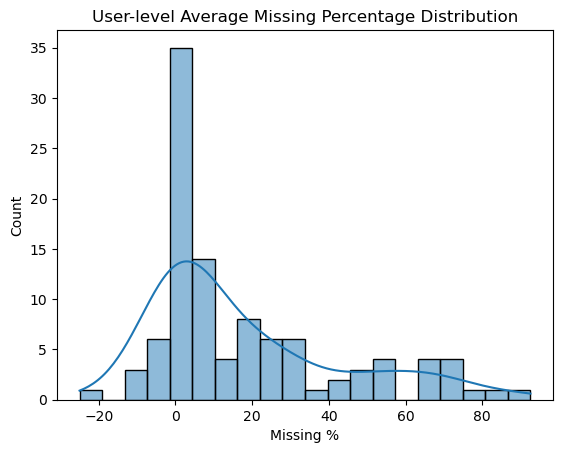

In [20]:
sns.histplot(user_avg["Missing Percentage"], bins=20, kde=True)
plt.title("User-level Average Missing Percentage Distribution")
plt.xlabel("Missing %")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


❗ 누락률이 음수인 사용자 수: 29


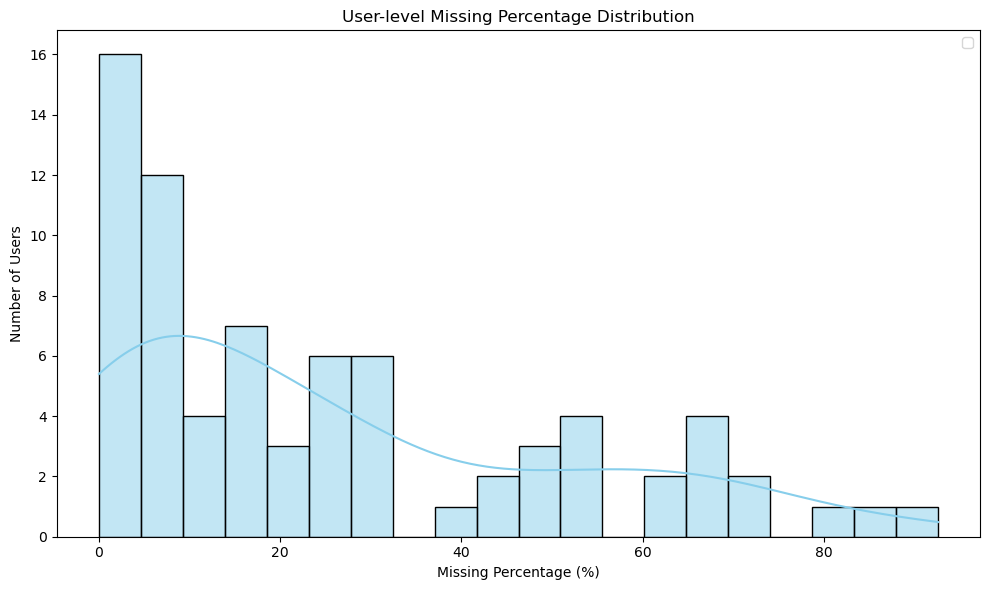

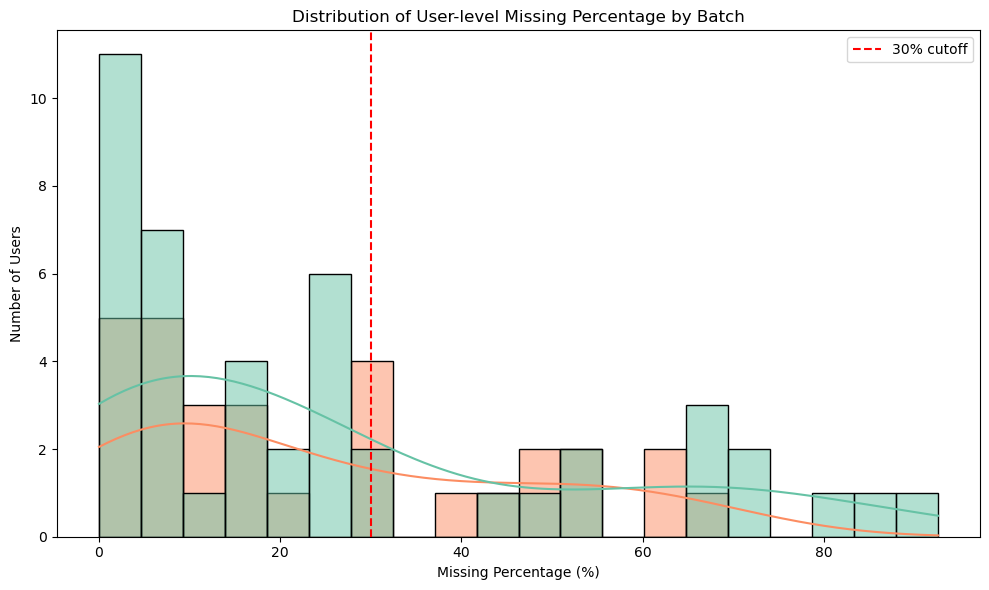

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# 사용자별 평균 누락률 계산
user_avg = df.groupby("User")["Missing Percentage"].mean().reset_index()
# 음수 누락률 확인
negatives = user_avg[user_avg["Missing Percentage"] < 0]
print("❗ 누락률이 음수인 사용자 수:", len(negatives))

# 해결 방법 ①: 음수 제거
user_avg = user_avg[user_avg["Missing Percentage"] >= 0]
# 히스토그램 시각화
plt.figure(figsize=(10, 6))
sns.histplot(user_avg["Missing Percentage"], bins=20, kde=True, color='skyblue', edgecolor='black')

# 30% cutoff 선 추가
#plt.axvline(x=30, color='red', linestyle='--', label="30% cutoff")


# 해결 방법 ②: 음수 값을 0으로 고정
# user_avg["Missing Percentage"] = user_avg["Missing Percentage"].clip(lower=0)
plt.title("User-level Missing Percentage Distribution")
plt.xlabel("Missing Percentage (%)")
plt.ylabel("Number of Users")
plt.legend()
plt.tight_layout()
plt.show()
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 사용자별 평균 누락률 계산
user_avg = df.groupby(["User", "Batch"])["Missing Percentage"].mean().reset_index()

# 음수 누락률 제거
user_avg = user_avg[user_avg["Missing Percentage"] >= 0]

# 히스토그램 시각화
plt.figure(figsize=(10, 6))
sns.histplot(data=user_avg, x="Missing Percentage", hue="Batch", bins=20, kde=True, palette="Set2", edgecolor="black")

plt.axvline(x=30, color='red', linestyle='--', label='30% cutoff')
plt.title("Distribution of User-level Missing Percentage by Batch")
plt.xlabel("Missing Percentage (%)")
plt.ylabel("Number of Users")
plt.legend()
plt.tight_layout()
plt.show()

📊 총 사용자 수: 104명
⏱️ 8주 초과 사용자 수: 70명


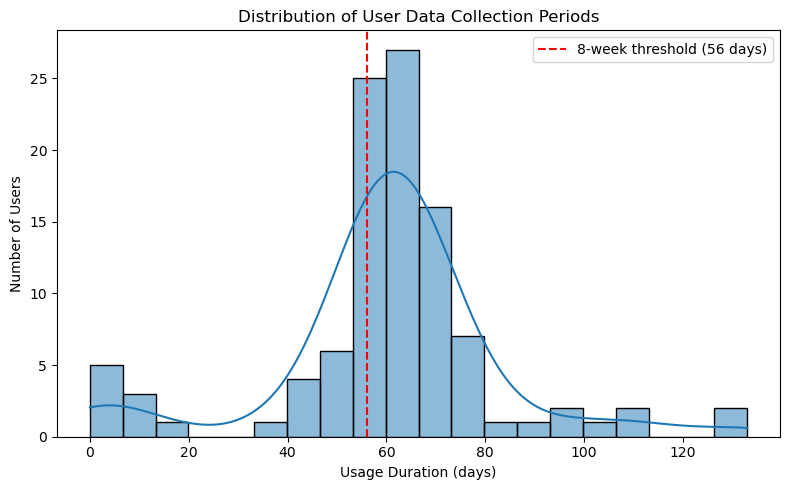

In [23]:
# 날짜 처리
df["StartDate"] = pd.to_datetime(df["StartDate"])
df["EndDate"] = pd.to_datetime(df["EndDate"])

# 사용자별 전체 기간 계산 (가장 빠른 시작 ~ 가장 늦은 종료)
user_period = df.groupby("User").agg({
    "StartDate": "min",
    "EndDate": "max"
}).reset_index()

# 사용 기간(일 수) 계산
user_period["Usage_days"] = (user_period["EndDate"] - user_period["StartDate"]).dt.days
user_period["Usage_weeks"] = user_period["Usage_days"] / 7

# 8주 초과 사용자 필터링
under_8w_users = user_period[user_period["Usage_days"] > 56]

# 결과 출력
print(f"📊 총 사용자 수: {len(user_period)}명")
print(f"⏱️ 8주 초과 사용자 수: {len(under_8w_users)}명")

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(user_period["Usage_days"], bins=20, kde=True)
plt.axvline(x=56, color='red', linestyle='--', label="8-week threshold (56 days)")
plt.title("Distribution of User Data Collection Periods")
plt.xlabel("Usage Duration (days)")
plt.ylabel("Number of Users")
plt.legend()
plt.tight_layout()
plt.show()

/var/folders/sf/9jlqrh113_q921773s9l46m80000gn/T/ipykernel_24175/297648289.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=bar_df, x="Source", y="Missing Percentage", hue="Batch", ci=None)


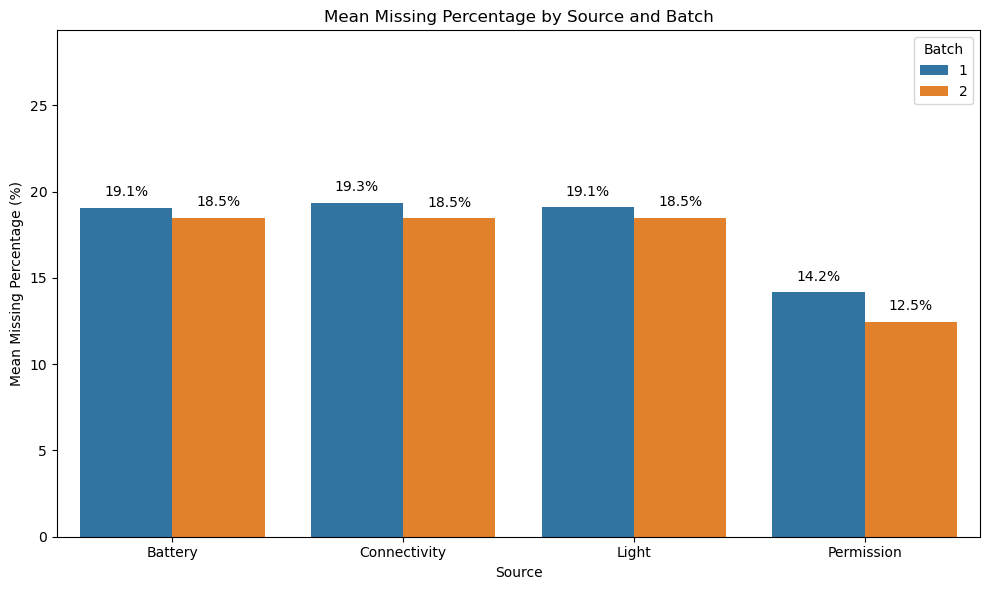

📊 평균 누락률 비교 (Source x Batch):
Batch             1      2
Source                    
Battery       19.07  18.47
Connectivity  19.34  18.45
Light         19.09  18.47
Permission    14.17  12.46


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# 평균값을 구해서 barplot 데이터로 사용할 요약 테이블 생성
bar_df = df.groupby(["Source", "Batch"])["Missing Percentage"].mean().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=bar_df, x="Source", y="Missing Percentage", hue="Batch", ci=None)

# 퍼센트 수치 추가
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.5,
            f'{height:.1f}%',
            ha='center',
            va='bottom',
            fontsize=10
        )

plt.title("Mean Missing Percentage by Source and Batch")
plt.ylabel("Mean Missing Percentage (%)")
plt.ylim(0, bar_df["Missing Percentage"].max() + 10)  # 여유 공간 확보
plt.tight_layout()
plt.show()

summary = df.groupby(["Source", "Batch"])["Missing Percentage"].mean().unstack()
print("📊 평균 누락률 비교 (Source x Batch):")
print(summary.round(2))

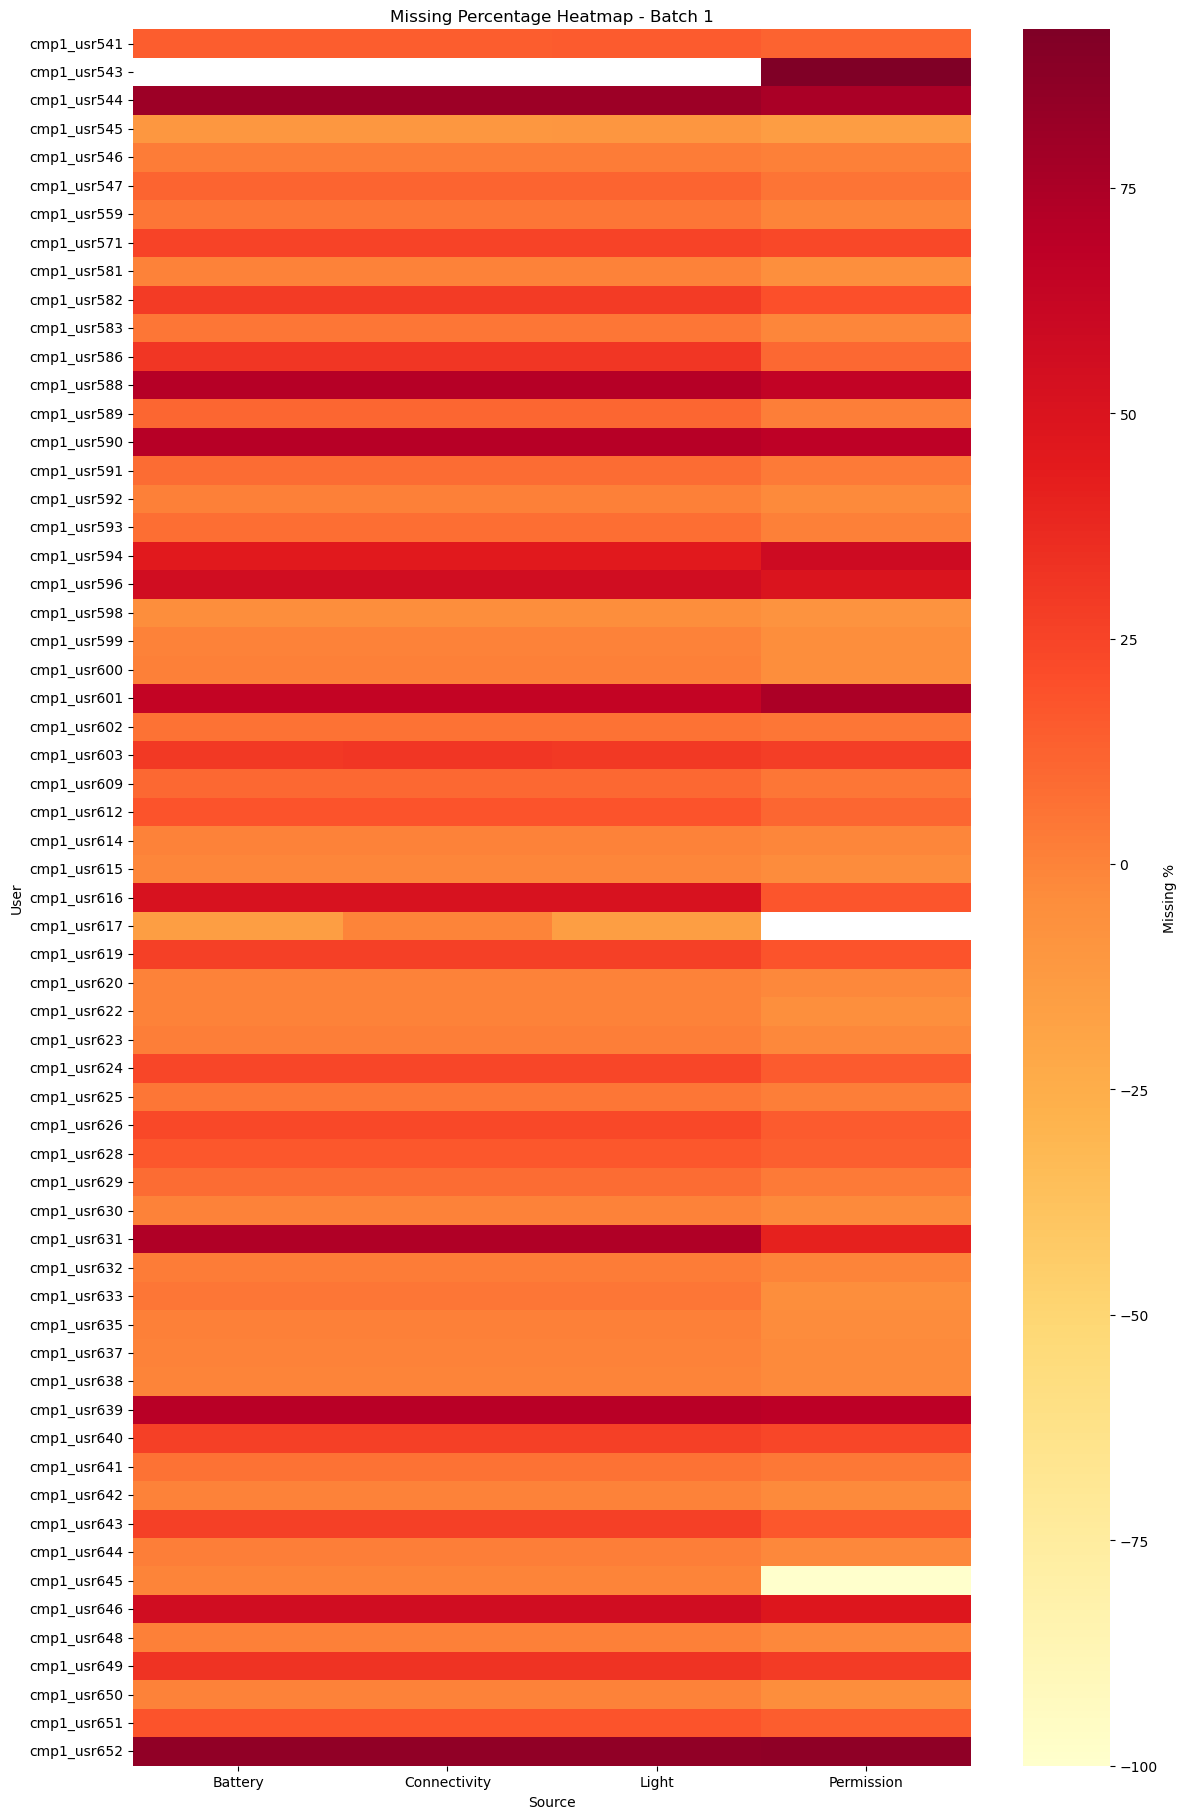

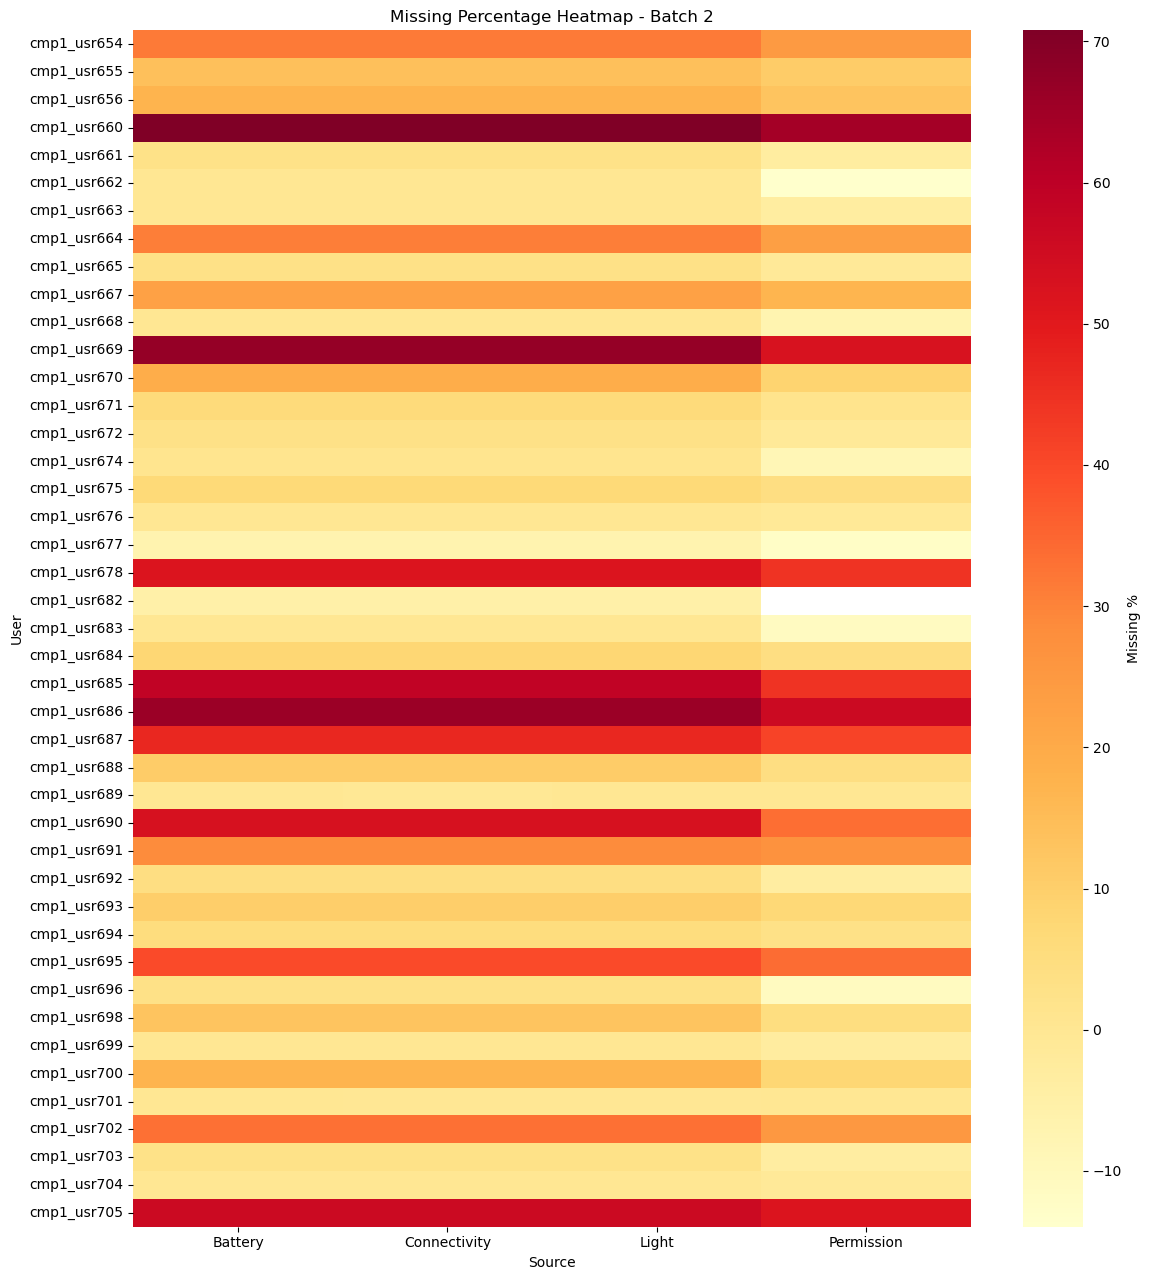

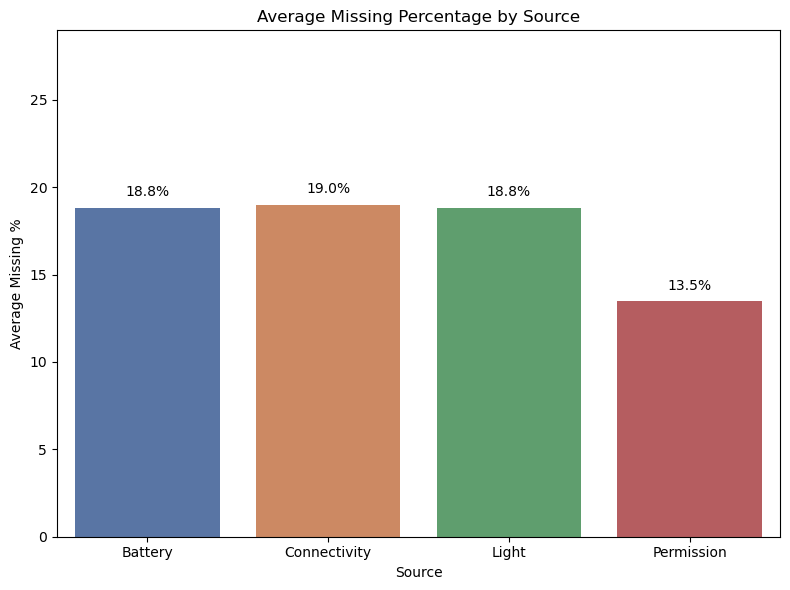

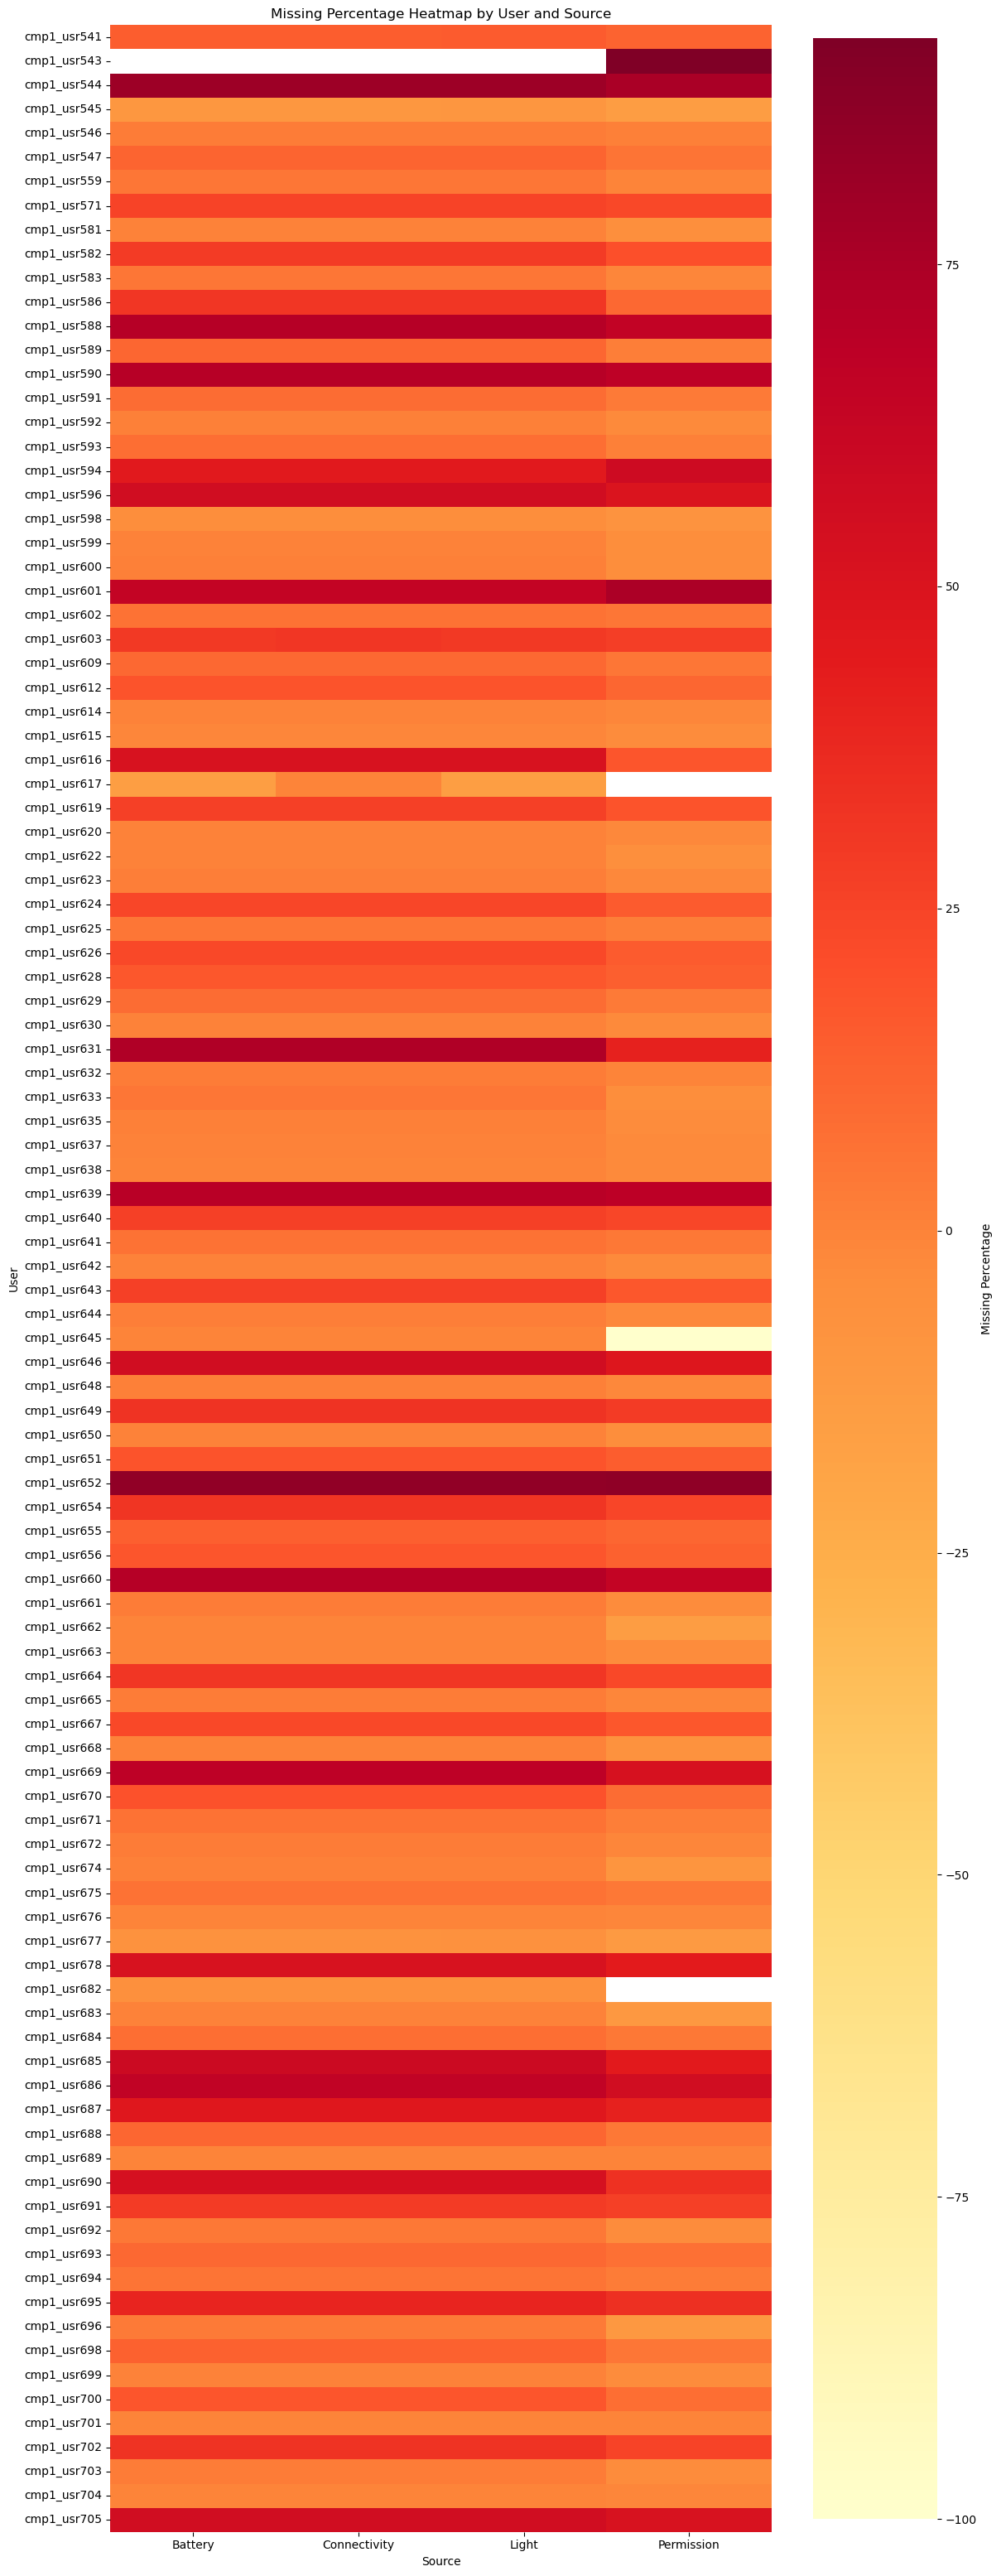

In [16]:
for batch in df["Batch"].unique():
    batch_df = df[df["Batch"] == batch]
    pivot_df = batch_df.pivot(index="User", columns="Source", values="Missing Percentage")

    plt.figure(figsize=(12, 0.3 * len(pivot_df)))
    sns.heatmap(pivot_df, cmap="YlOrRd", annot=False, cbar_kws={"label": "Missing %"})
    plt.title(f"Missing Percentage Heatmap - Batch {batch}")
    plt.tight_layout()
    plt.show()


# Source별 평균 계산
avg_by_source = df.groupby("Source")["Missing Percentage"].mean().reset_index()

# barplot
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=avg_by_source, x="Source", y="Missing Percentage", palette="deep")

# 막대 위에 퍼센트 숫자 추가
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.5,
        f'{height:.1f}%',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.title("Average Missing Percentage by Source")
plt.ylabel("Average Missing %")
plt.ylim(0, avg_by_source["Missing Percentage"].max() + 10)  # 여유 공간
plt.tight_layout()
plt.show()

pivot_df = df.pivot(index="User", columns="Source", values="Missing Percentage")

plt.figure(figsize=(12, 0.3 * len(pivot_df)))
sns.heatmap(pivot_df, cmap="YlOrRd", annot=False, cbar_kws={"label": "Missing Percentage"})
plt.title("Missing Percentage Heatmap by User and Source")
plt.tight_layout()
plt.show()

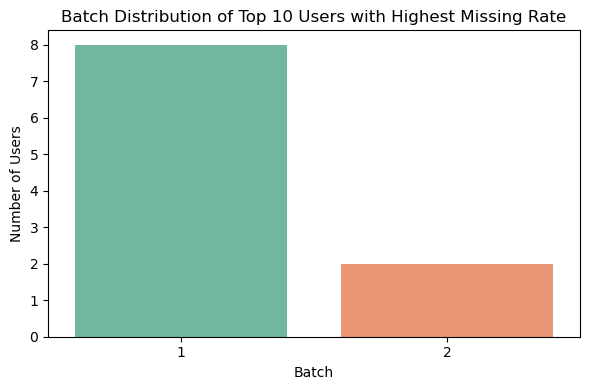

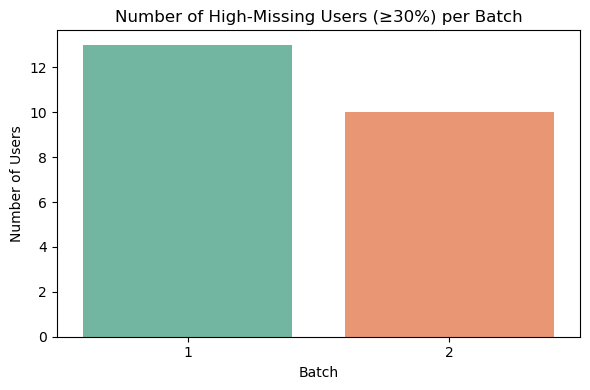

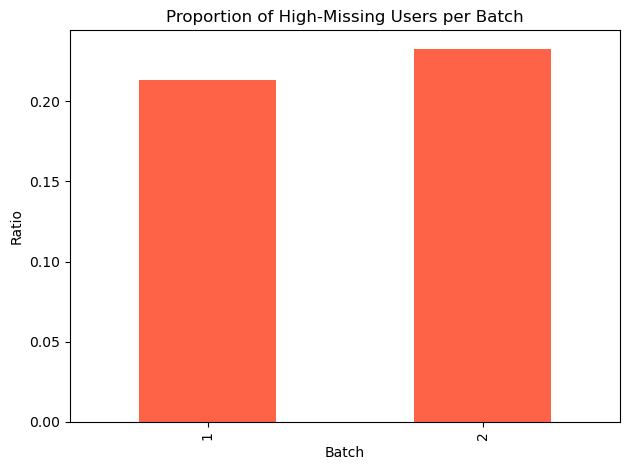

In [ ]:
# 사용자별 평균 누락률 계산
user_avg = df.groupby("User")["Missing Percentage"].mean().sort_values(ascending=False)

# 상위 10명 추출
top10_users = user_avg.head(10).index.tolist()

# 원본 df에서 해당 사용자들의 배치 가져오기
top10_df = df[df["User"].isin(top10_users)].drop_duplicates(subset=["User"])[["User", "Batch"]]

# 배치별 사용자 수 시각화
plt.figure(figsize=(6, 4))
sns.countplot(data=top10_df, x="Batch", palette="Set2")
plt.title("Batch Distribution of Top 10 Users with Highest Missing Rate")
plt.ylabel("Number of Users")
plt.tight_layout()
plt.show()

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 사용자별 평균 누락률 계산
user_avg = df.groupby("User")["Missing Percentage"].mean().reset_index()

# 해당 사용자들의 배치 정보 붙이기
user_batch = df.drop_duplicates("User")[["User", "Batch"]]
user_avg = user_avg.merge(user_batch, on="User")

# 기준 이상인 사용자만 필터링 (예: 평균 누락률 30% 이상)
high_missing_users = user_avg[user_avg["Missing Percentage"] >= 30]

# 배치별 고누락 사용자 수 카운트
plt.figure(figsize=(6, 4))
sns.countplot(data=high_missing_users, x="Batch", palette="Set2")
plt.title("Number of High-Missing Users (≥30%) per Batch")
plt.ylabel("Number of Users")
plt.tight_layout()
plt.show()

# 전체 배치 사용자 수
total_users_per_batch = user_batch["Batch"].value_counts()

# 고누락 사용자 비율
high_missing_ratio = high_missing_users["Batch"].value_counts() / total_users_per_batch

# 시각화
high_missing_ratio.sort_index().plot(kind="bar", color="tomato")
plt.title("Proportion of High-Missing Users per Batch")
plt.ylabel("Ratio")
plt.xlabel("Batch")
plt.tight_layout()
plt.show()

In [ ]:
# Source 이름 → 번호 매핑
SOURCE_IDS = {
    "Light": "12",
    "Connectivity": "16",
    "Battery": "17",
    "Permission": "21"
}

# 음수 발생한 row들의 timestamp 목록 추출
timestamp_records = []

for _, row in negative_df.iterrows():
    batch = f"Batch{row['Batch']}"
    user_id = row["User"]
    source_name = row["Source"]
    source_id = SOURCE_IDS[source_name]

    # 원본 경로
    file_path = BASE_PATH / batch / user_id / f"source_{source_id}" / f"data_source_{source_id}.csv"

    if file_path.exists():
        try:
            df = pd.read_csv(file_path)
            timestamps = df["timestamp"].dropna().astype(int).tolist()

            timestamp_records.append({
                "User": user_id,
                "Source": source_name,
                "Num Timestamps": len(timestamps),
                "First Timestamp": datetime.fromtimestamp(timestamps[0]/1000),
                "Last Timestamp": datetime.fromtimestamp(timestamps[-1]/1000),
                "Timestamps": timestamps  # 전체 리스트 원하면 여기에 저장
            })

        except Exception as e:
            print(f"❌ Error reading {file_path.name}: {e}")
    else:
        print(f"⚠️ File not found: {file_path}")

# 결과 DataFrame
ts_df = pd.DataFrame(timestamp_records)

# 필요한 경우 저장
ts_df.to_csv("negative_missing_timestamps_summary.csv", index=False)
print("✅ 음수 missing 사용자들의 타임스탬프 요약 저장 완료!")

#### Demographic Analysis

In [ ]:
df = pd.read_csv(demo_dir)

for batch_value in df['Batch'].unique():
    batch_df = df[df['Batch'] == batch_value]
    batch_str = str(batch_value).strip().replace(" ", "_")
    
    output_path = f"/Users/yooseohyeon/Desktop/170325/Demo_batch_{batch_str}.csv"
    batch_df.to_csv(output_path, index=False)

    print(f"Saved batch: {batch_str} → {output_path}")

Saved batch: I → /Users/yooseohyeon/Desktop/170325/Demo_batch_I.csv
Saved batch: II → /Users/yooseohyeon/Desktop/170325/Demo_batch_II.csv


In [26]:
df = pd.read_csv("/Users/yooseohyeon/Desktop/170325/Demo_batch_I.csv")
df2 = pd.read_csv("/Users/yooseohyeon/Desktop/170325/Demo_batch_II.csv")
city_to_province = {
    # Seoul
    'Seoul': 'Seoul',
    
    # Metropolitan Cities
    'Busan': 'Busan',
    'Daegu': 'Daegu',
    'Incheon': 'Incheon',
    'Gwangju': 'Gwangju',
    'Daejeon': 'Daejeon',
    'Ulsan': 'Ulsan',
    'Sejong': 'Sejong',

    # Gyeonggi-do
    'Suwon': 'Gyeonggi-do', 'Yongin': 'Gyeonggi-do', 'Goyang': 'Gyeonggi-do',
    'Seongnam': 'Gyeonggi-do', 'Ansan': 'Gyeonggi-do', 'Anseong': 'Gyeonggi-do',
    'Bucheon': 'Gyeonggi-do', 'Gimpo': 'Gyeonggi-do', 'Hwaseong': 'Gyeonggi-do',
    'Pyeongtaek': 'Gyeonggi-do', 'Uijeongbu': 'Gyeonggi-do', 'Paju': 'Gyeonggi-do',
    'Namyangju': 'Gyeonggi-do', 'Osan': 'Gyeonggi-do', 'Gunpo': 'Gyeonggi-do', 'Gyeonggi':'Gyeonggi-do', 
    'Anyang':'Gyeonggi-do','Siheung':'Gyeonggi-do',

    # Gangwon
    'Chuncheon': 'Gangwon', 'Wonju': 'Gangwon', 'Gangneung': 'Gangwon', 'Hongcheon': 'Gangwon','Yeongwol': 'Gangwon',

    # Chungcheongbuk-do
    'Cheongju': 'Chungcheongbuk-do', 'Chungju': 'Chungcheongbuk-do',

    # Chungcheongnam-do
    'Asan': 'Chungcheongnam-do', 'Seosan': 'Chungcheongnam-do', 'Cheonan': 'Chungcheongnam-do', 'Hongseong':'Chungcheongnam-do',

    # Jeollabuk-do
    'Jeonju': 'Jeollabuk-do', 'Gunsan': 'Jeollabuk-do', 'Iksan': 'Jeollabuk-do','Jeongeup': 'Jeollabuk-do','Jeonbuk': 'Jeollabuk-do',

    # Jeollanam-do
    'Mokpo': 'Jeollanam-do', 'Naju': 'Jeollanam-do', 'Gurye':'Jeollanam-do','Gwangyang':'Jeollanam-do','Jeonnam': 'Jeollanam-do',

    # Gyeongsangbuk-do
    'Pohang': 'Gyeongsangbuk-do', 'Gumi': 'G3yeongsangbuk-do', 'Andong': 'Gyeongsangbuk-do',
    'Gyeongsan':'Gyeongsangbuk-do','Ulleung':'Gyeongsangbuk-do',

    # Gyeongsangnam-do
    'Changwon': 'Gyeongsangnam-do', 'Gimhae': 'Gyeongsangnam-do', 'Jinju': 'Gyeongsangnam-do',
    
    # etc. (add more as needed)
}

def simplify_location(loc):
    if pd.isna(loc):
        return "Unknown"
    
    for city in city_to_province:
        if city in loc:
            return city_to_province[city]
    
    return "Other"

def simplify_edu(edu):
    if pd.isna(edu):
        return "Unknown"
    if "Bachelor" in edu:
        return "Bachelor's"
    elif "Master" in edu or "PhD" in edu:
        return "Graduate"
    else:
        return "High School or below"

df['Location_simplified'] = df['Location'].apply(simplify_location)
df2['Location_simplified'] = df2['Location'].apply(simplify_location)

df['Edu_Simple'] = df['Education Level'].apply(simplify_edu)
df2['Edu_Simple'] = df2['Education Level'].apply(simplify_edu)

output_path = "/Users/yooseohyeon/Desktop/170325/Demo_batch_I_update.csv"
output_path2 = "/Users/yooseohyeon/Desktop/170325/Demo_batch_II_update.csv"

df.to_csv(output_path, index=False)
print(f"✅ Updated CSV saved to: {output_path}")
df2.to_csv(output_path2, index=False)
print(f"✅ Updated CSV saved to: {output_path2}")

✅ Updated CSV saved to: /Users/yooseohyeon/Desktop/170325/Demo_batch_I_update.csv
✅ Updated CSV saved to: /Users/yooseohyeon/Desktop/170325/Demo_batch_II_update.csv


In [8]:
import pandas as pd

# Load
df1 = pd.read_csv("/Users/yooseohyeon/Desktop/170325/Demo_batch_I_update.csv")
df2 = pd.read_csv("/Users/yooseohyeon/Desktop/170325/Demo_batch_II_update.csv")

# 설정
cont_vars = ['Age']
cat_vars = ['Age Group', 'Gender', 'Location', 'Education Level', 
        'Employment Level', 'Car Manufacturers', 'Phone Manufacturers', 
        'Phone Model','Location_simplified','Edu_Simple']

# 함수: 수치형 요약
def summarize_cont(df, var):
    return f"{df[var].mean():.1f} ± {df[var].std():.1f}"

# 함수: 범주형 요약
def summarize_cat(df, var, categories):
    total = len(df)
    counts = df[var].value_counts()
    return [f"{counts.get(cat, 0)} ({(counts.get(cat, 0)/total*100):.0f}%)" for cat in categories]

# 결과 저장
rows = []

# 수치형
for var in cont_vars:
    rows.append({
        'Demographics': var,
        f"Batch I (n = {len(df1)})": summarize_cont(df1, var),
        f"Batch II (n = {len(df2)})": summarize_cont(df2, var)
    })

# 범주형
for var in cat_vars:
    categories = sorted(set(df1[var].dropna().unique()) | set(df2[var].dropna().unique()))
    for cat in categories:
        rows.append({
            'Demographics': f"{var} - {cat}",
            f"Batch I (n = {len(df1)})": summarize_cat(df1, var, categories)[categories.index(cat)],
            f"Batch II (n = {len(df2)})": summarize_cat(df2, var, categories)[categories.index(cat)],
        })

# 데이터프레임 생성
summary_df = pd.DataFrame(rows)

# 결과 출력
#import ace_tools as tools; tools.display_dataframe_to_user(name="Clean Demographic Summary Table", dataframe=summary_df)
print(summary_df.to_string(index=False))

                                            Demographics Batch I (n = 71) Batch II (n = 44)
                                                     Age       39.5 ± 9.0        43.2 ± 7.5
                                       Age Group - 20-29          7 (10%)            1 (2%)
                                       Age Group - 30-39         32 (45%)          13 (30%)
                                       Age Group - 40-49         21 (30%)          21 (48%)
                                       Age Group - 50-59         10 (14%)           9 (20%)
                                       Age Group - 60-69           1 (1%)            0 (0%)
                                         Gender - Female           4 (6%)            1 (2%)
                                           Gender - Male         67 (94%)          42 (95%)
                                       Location - Anyang           1 (1%)            0 (0%)
                                         Location - Asan           2 (3%)       


Start Analysis: Batch I
Age Statistics Summary
count    71.000000
mean     39.478873
std       8.985479
min      22.000000
25%      32.500000
50%      38.000000
75%      45.000000
max      64.000000
Name: Age, dtype: float64

🔹 Age Group Distribution:
Age Group
30-39    32
40-49    21
50-59    10
20-29     7
60-69     1
Name: count, dtype: int64


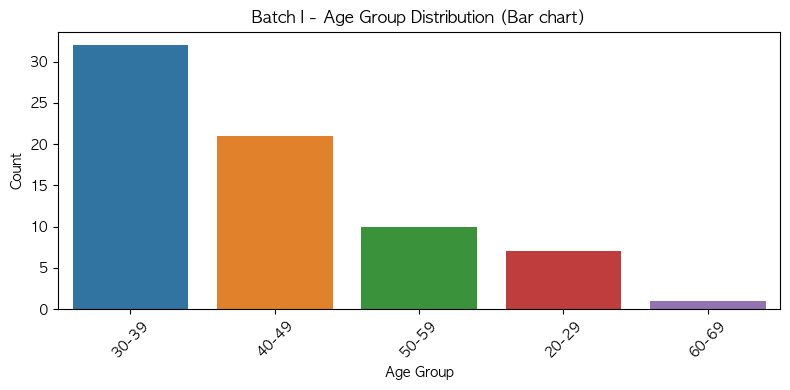

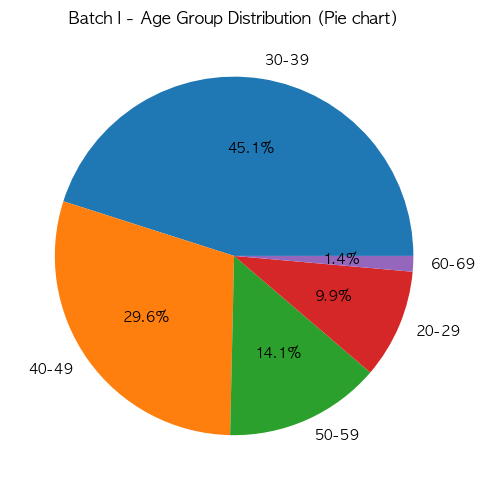


🔹 Gender Distribution:
Gender
Male      67
Female     4
Name: count, dtype: int64


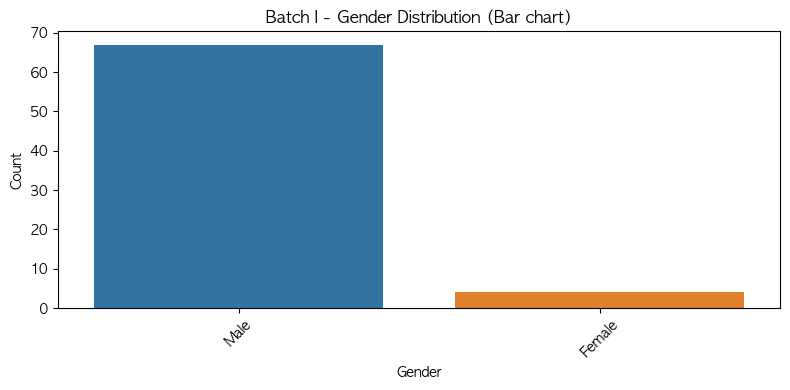

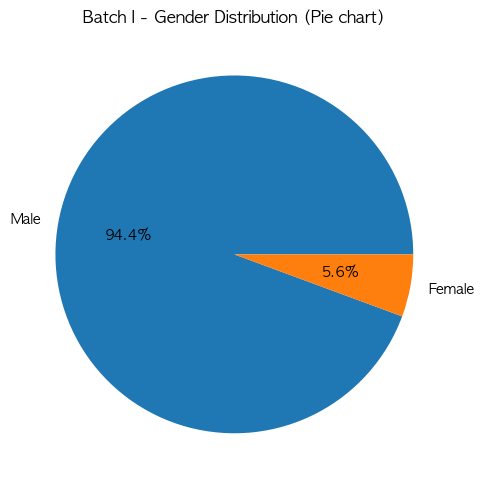


🔹 Location Distribution:
Seoul         10
Gyeonggi       8
Incheon        5
Daejeon        4
Cheongju       4
Busan          3
Gwangju        2
Jeonbuk        2
Sejong         2
Pohang         2
Seongnam       2
Asan           2
Naju           2
Changwon       2
Namseong       2
Daegu          2
Bucheon        1
Yeongwol       1
Osan           1
Jeongeup       1
Ulleung        1
Wonju          1
Gimpo          1
Siheung        1
Gimhae         1
Gwangyang      1
Jinju          1
Suwon          1
Hongcheon      1
Hongseong      1
Gyeongsan      1
Gurye          1
Anyang         1
Pyeongtaek     1
Uljin          1
Name: count, dtype: int64


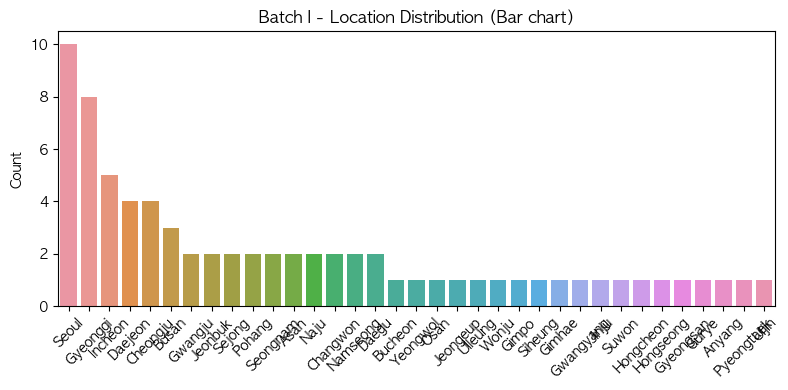

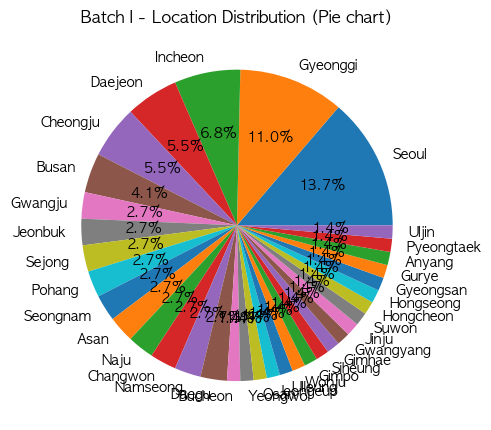


🔹 Education Level Distribution:
Education Level
Bachelor's               47
High School or below      7
Bachelor's (Studying)     5
Master's                  5
PhD                       3
Master's (Studying)       2
PhD (Studying)            1
University Dropout        1
Name: count, dtype: int64


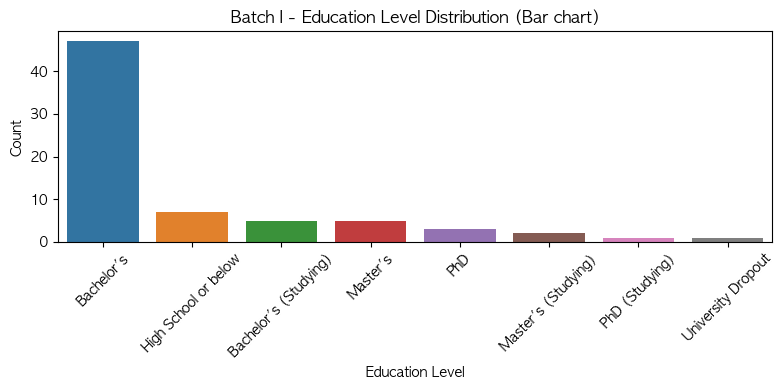

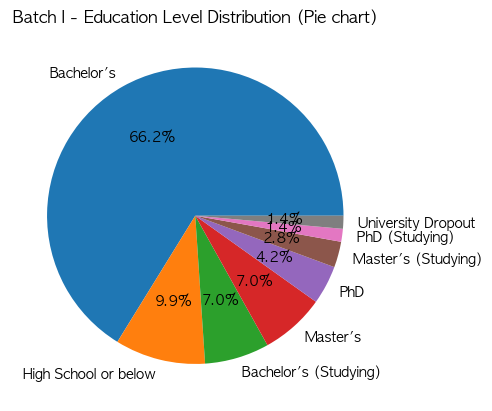


🔹 Employment Level Distribution:
Employment Level
Office worker           26
Company Employee        20
Student                  5
Freelancer               4
Professor                3
Researcher               2
Self-employed            2
Small Business Owner     2
Graduate Student         1
Administrator            1
Web Designer             1
Civil Servant            1
Construction Worker      1
Soldier                  1
Cyclist                  1
Name: count, dtype: int64


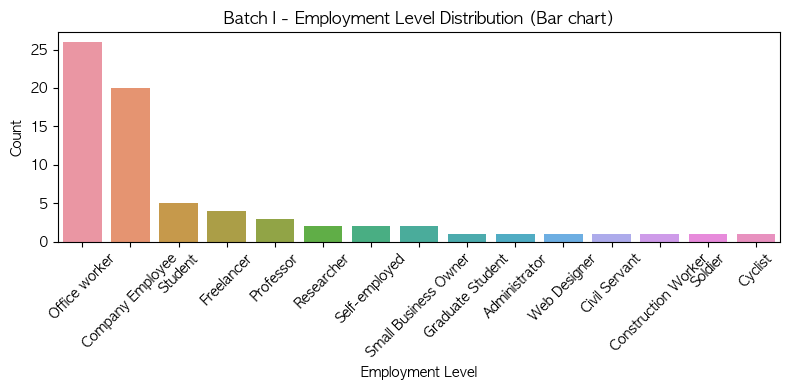

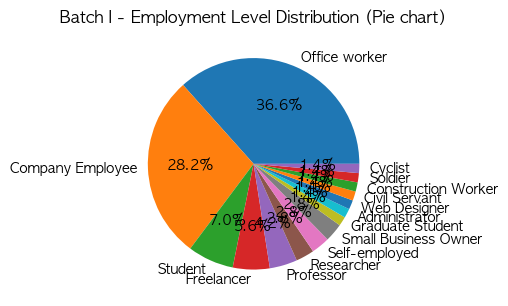


🔹 Car Manufacturers Distribution:
KIA              24
Hyundai          23
Genesis           7
Tesla             5
BMW               4
SsangYong         3
Mercedes-Benz     2
Unknown           1
Polestar          1
Volkswagen        1
Name: count, dtype: int64


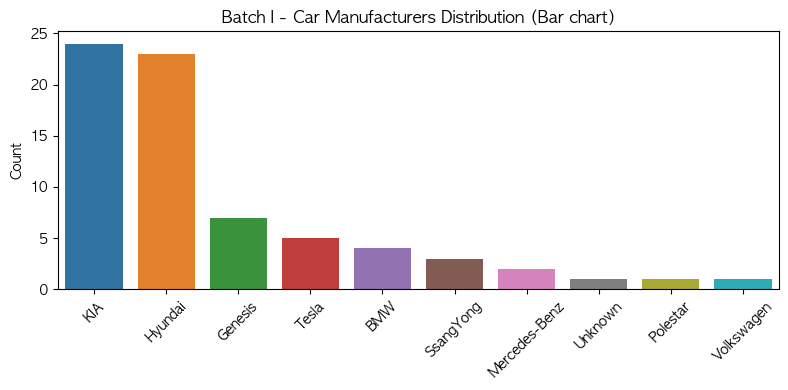

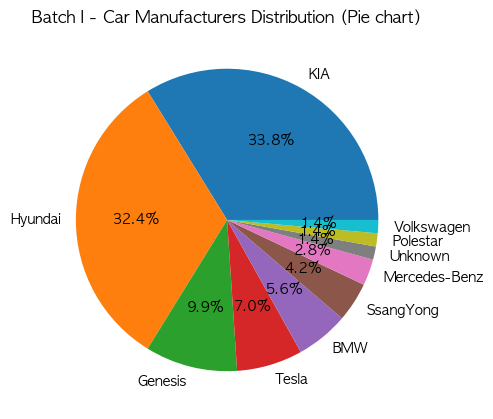


🔹 Phone Manufacturers Distribution:
Phone Manufacturers
Samsung    69
LG          1
Redmi       1
Name: count, dtype: int64


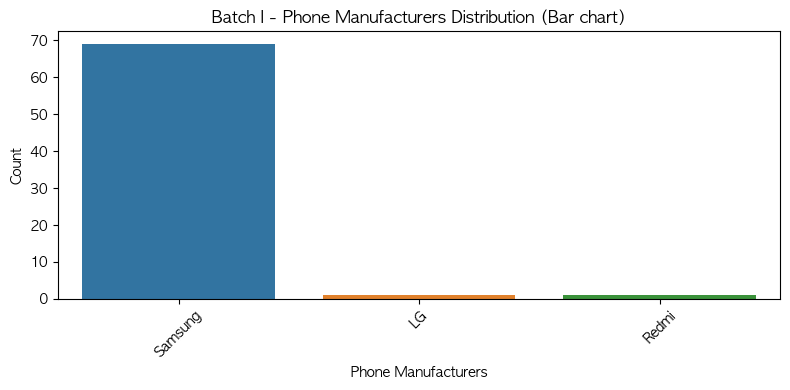

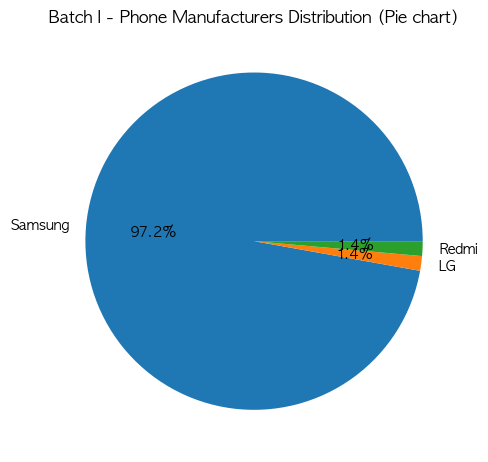


🔹 Phone Model Distribution:
Phone Model
S23              11
S24 ULTRA         9
S23 ULTRA         6
S24+              4
Z FLIP 5          3
S10               3
FOLD 4            3
S24               3
Quantum 3         2
S21 ULTRA         2
NOTE 20 ULTRA     2
S22 ULTRA         2
S20               2
S24, FOLD 4       1
 Z FLIP 6         1
Z FLIP 6          1
FOLD 7            1
S21               1
S23 FE            1
S23+              1
Z FLIP 3          1
FOLD 6            1
S21+              1
S22               1
S20+              1
FLIP 3            1
FOLD 5            1
Q92               1
FOLD 3            1
NOTE 10           1
A50               1
NOTE 12           1
Name: count, dtype: int64


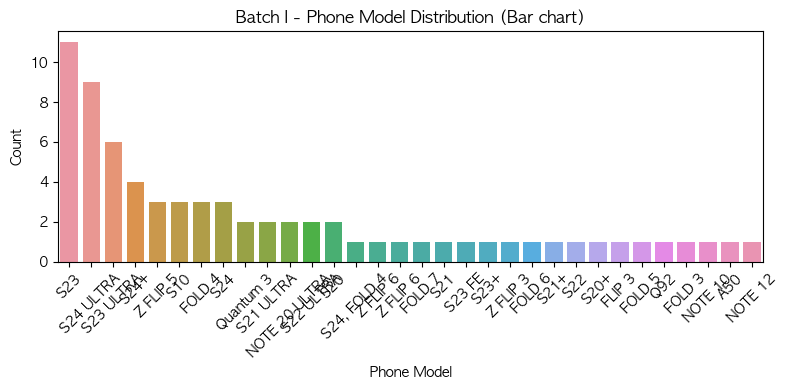

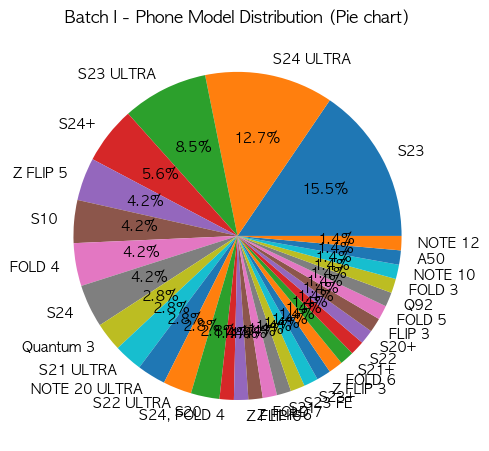


🔹 Location_simplified Distribution:
Location_simplified
Gyeonggi-do          17
Seoul                10
Incheon               5
Jeollanam-do          4
Daejeon               4
Chungcheongbuk-do     4
Gyeongsangbuk-do      4
Gyeongsangnam-do      4
Chungcheongnam-do     3
Busan                 3
Jeollabuk-do          3
Gwangju               2
Other                 2
Gangwon               2
Daegu                 2
Sejong                2
Name: count, dtype: int64


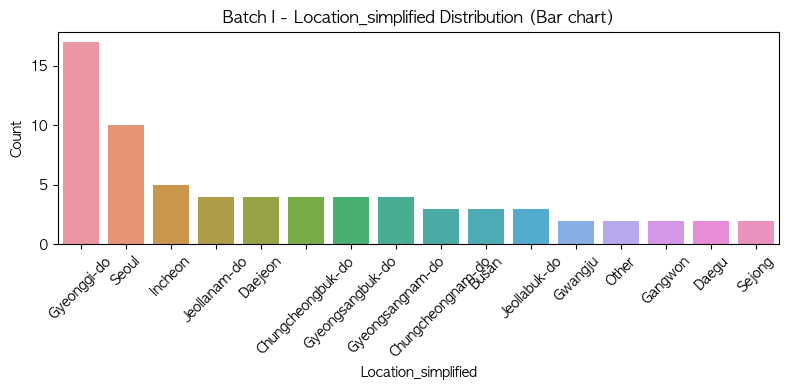

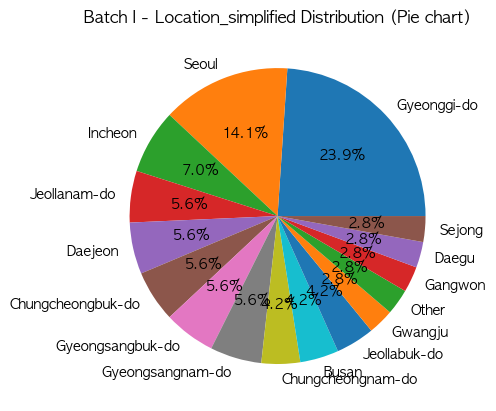


🔹 Edu_Simple Distribution:
Edu_Simple
Bachelor's              52
Graduate                11
High School or below     8
Name: count, dtype: int64


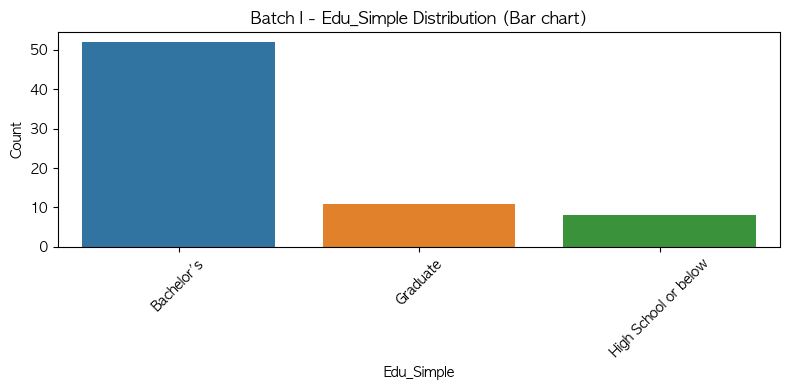

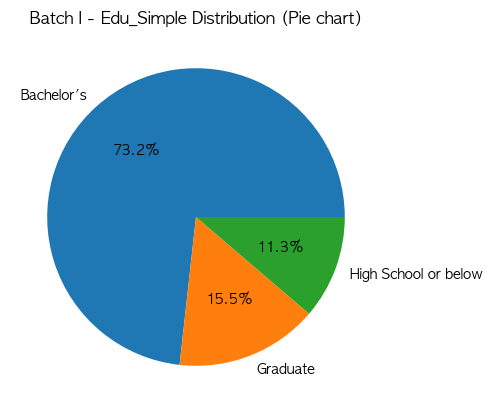


Start Analysis: Batch II
Age Statistics Summary
count    44.000000
mean     43.204545
std       7.506833
min      29.000000
25%      37.750000
50%      43.000000
75%      48.000000
max      58.000000
Name: Age, dtype: float64

🔹 Age Group Distribution:
Age Group
40-49    21
30-39    13
50-59     9
20-29     1
Name: count, dtype: int64


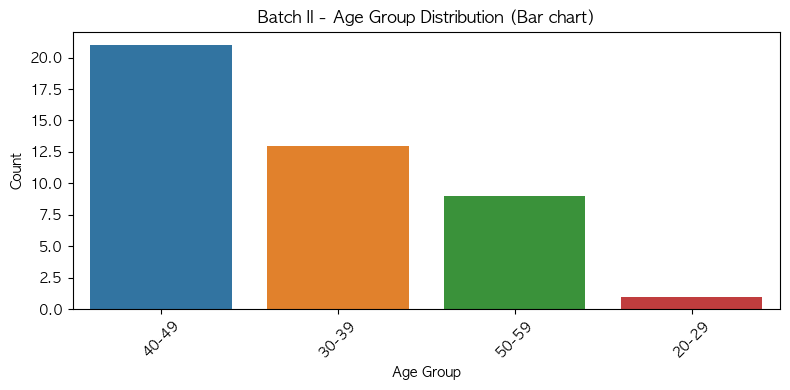

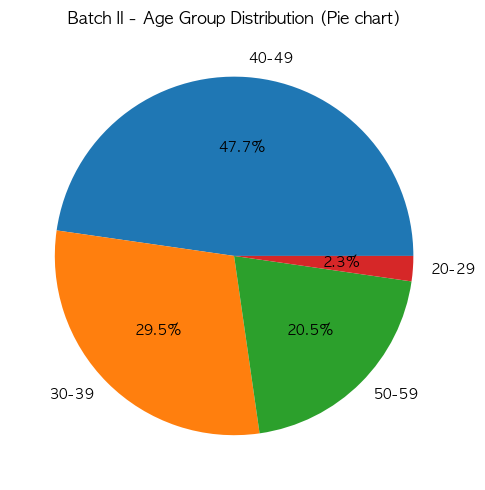


🔹 Gender Distribution:
Gender
Male      42
NaN        1
Female     1
Name: count, dtype: int64


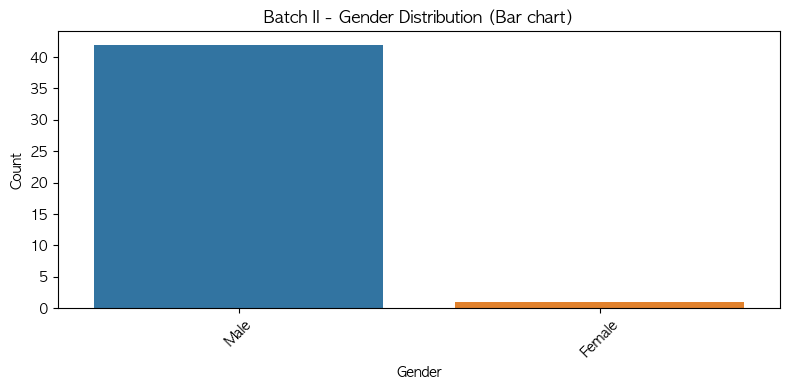

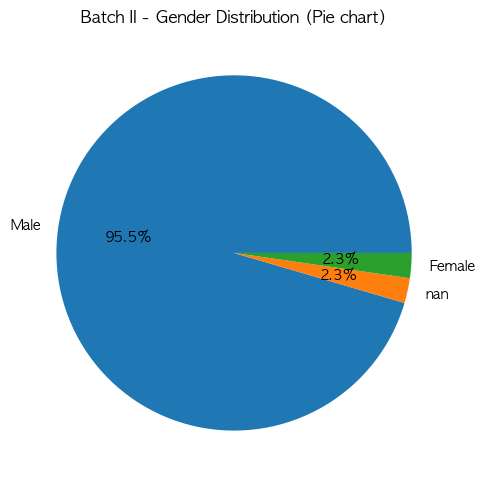


🔹 Location Distribution:
Gyeonggi     6
Seoul        5
Daejeon      4
Daegu        4
Chuncheon    3
Jeonju       3
Gimhae       2
Incheon      2
Busan        2
Cheongju     1
Yongin       1
Asan         1
Iksan        1
Gangwon      1
Gwangju      1
Chilgok      1
Hwaseong     1
Mokpo        1
Suwon        1
Seosan       1
Cheongdo     1
Ulsan        1
Name: count, dtype: int64


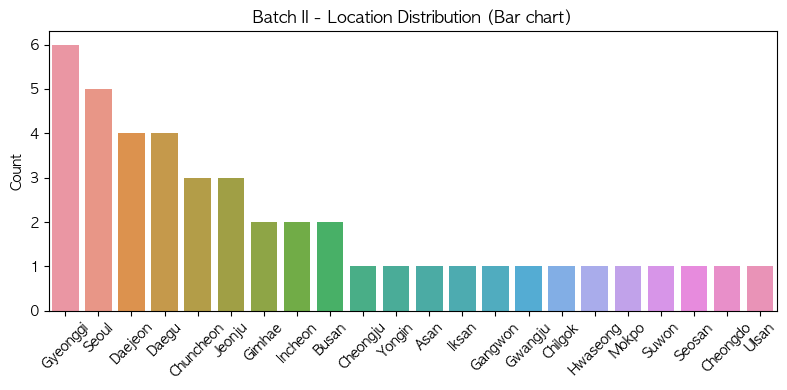

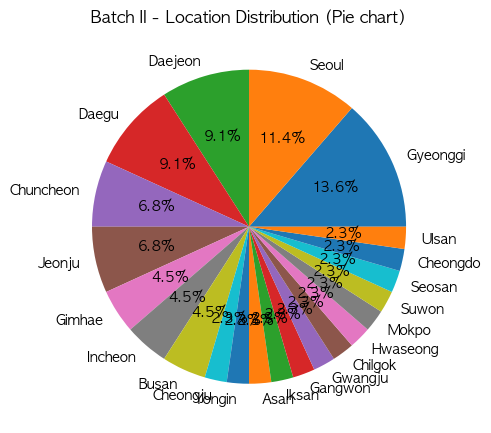


🔹 Education Level Distribution:
Education Level
Bachelor's               36
High School or below      2
Master's                  2
PhD                       2
Bachelor's (Studying)     1
Master's (Studying)       1
Name: count, dtype: int64


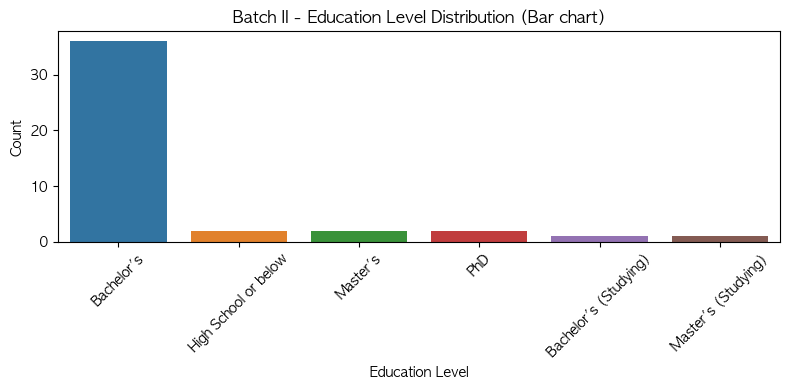

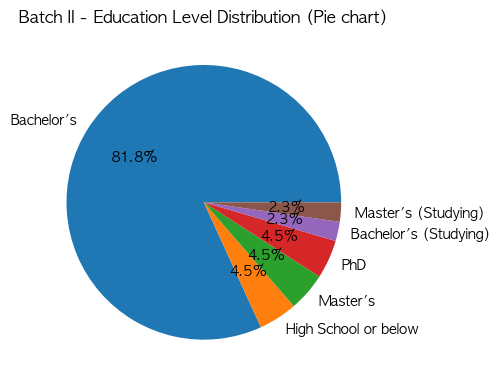


🔹 Employment Level Distribution:
Employment Level
Office worker                            13
Company Employee                         10
Self-employed                             5
Civil Servant                             3
Researcher                                2
Railway Operator                          1
Teacher                                   1
Software developer                        1
Transportation industry                   1
Special                                   1
Nurse                                     1
Soldier                                   1
Financial institution worker/employee     1
Power generation company                  1
Freelancer                                1
Others                                    1
Name: count, dtype: int64


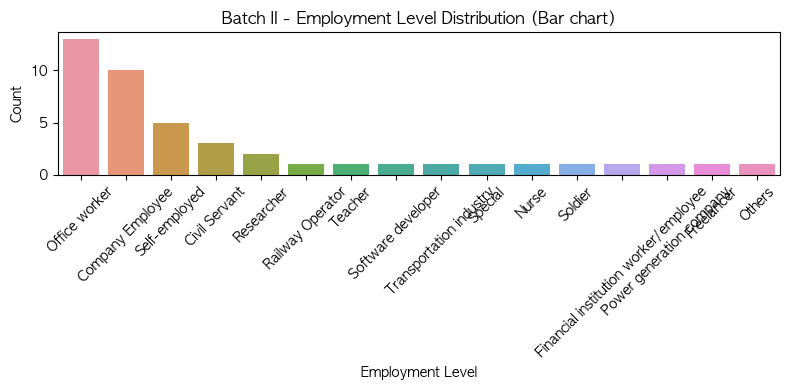

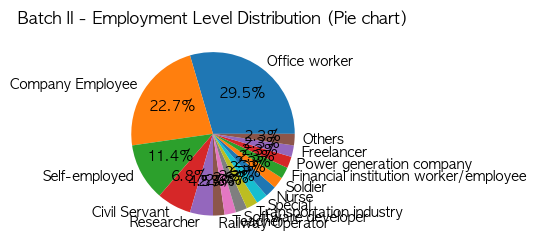


🔹 Car Manufacturers Distribution:
KIA           21
Hyundai       14
BMW            2
Tesla          2
Polestar       1
Porsche        1
Audi           1
Renault        1
Volkswagen     1
Genesis        1
Name: count, dtype: int64


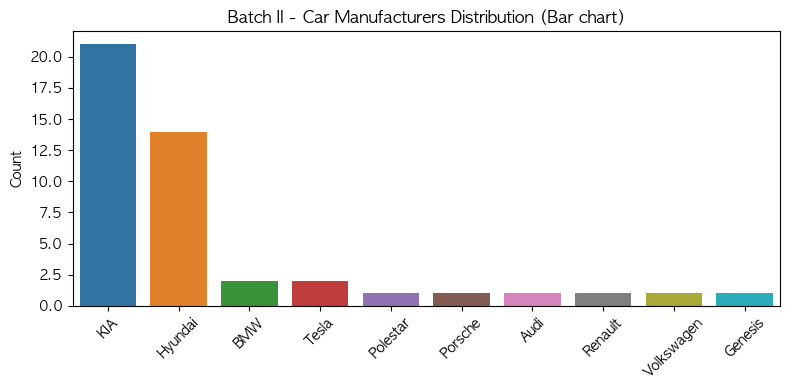

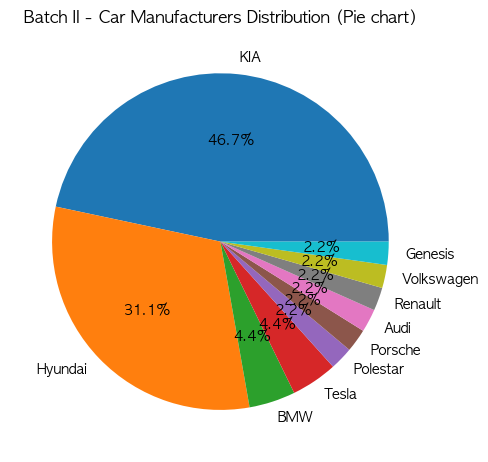


🔹 Phone Manufacturers Distribution:
Phone Manufacturers
Samsung    41
LG          3
Name: count, dtype: int64


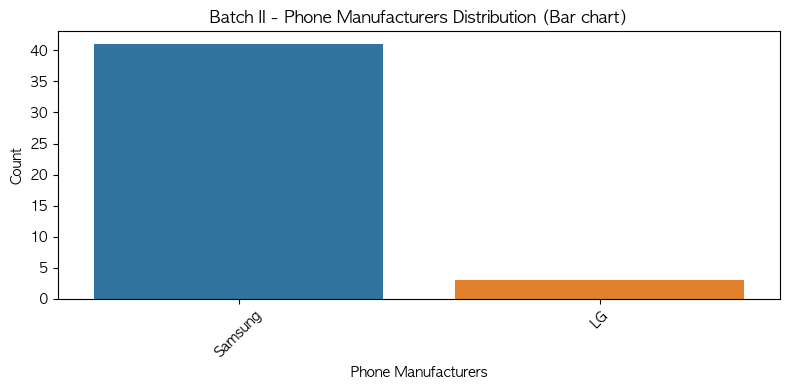

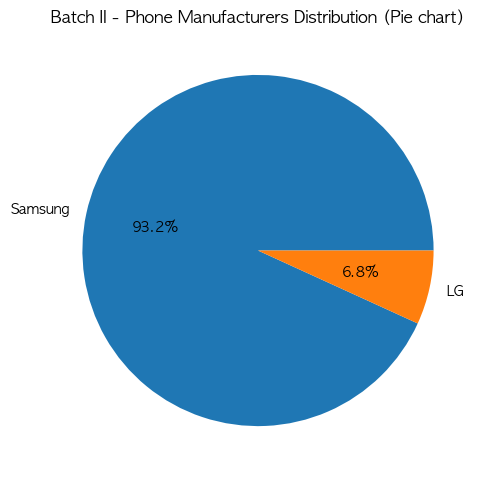


🔹 Phone Model Distribution:
Phone Model
Z FLIP 5                4
S24+                    4
S23+                    3
S24                     3
S23 ULTRA               3
NOTE 20 ULTRA           2
S21                     2
S20                     2
S23                     2
NOTE 20                 2
Quantum 2               1
NOTE 10                 1
S10                     1
FLIP 3                  1
S23 FE                  1
S20 FE                  1
V50                     1
NOTE 10 ULTRA           1
FOLD 5                  1
S23 ULTRA, S24 ULTRA    1
S22                     1
Z FLIP 4                1
G8                      1
v50s                    1
FOLD 3                  1
S22 ULTRA               1
A15                     1
Name: count, dtype: int64


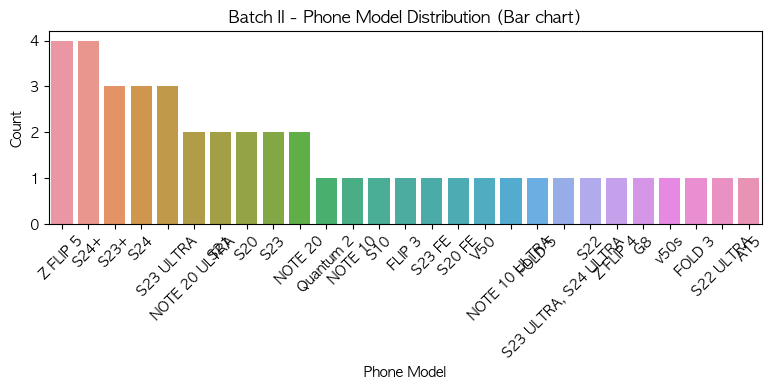

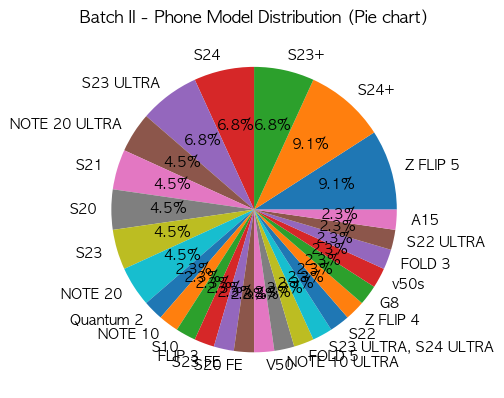


🔹 Location_simplified Distribution:
Location_simplified
Gyeonggi-do          9
Seoul                5
Daejeon              4
Jeollabuk-do         4
Daegu                4
Other                3
Gangwon              3
Incheon              2
Chungcheongnam-do    2
Gyeongsangnam-do     2
Busan                2
Chungcheongbuk-do    1
Gwangju              1
Jeollanam-do         1
Ulsan                1
Name: count, dtype: int64


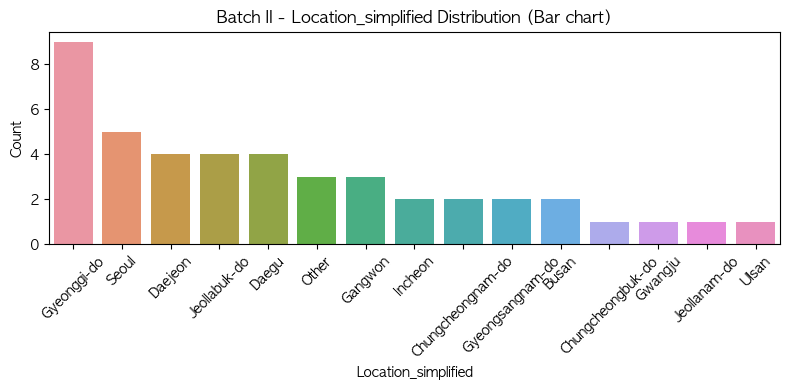

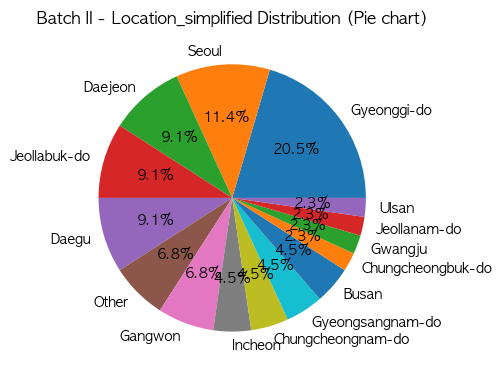


🔹 Edu_Simple Distribution:
Edu_Simple
Bachelor's              37
Graduate                 5
High School or below     2
Name: count, dtype: int64


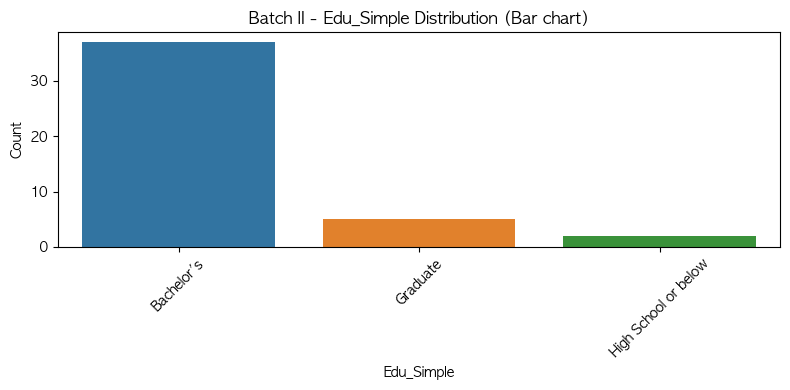

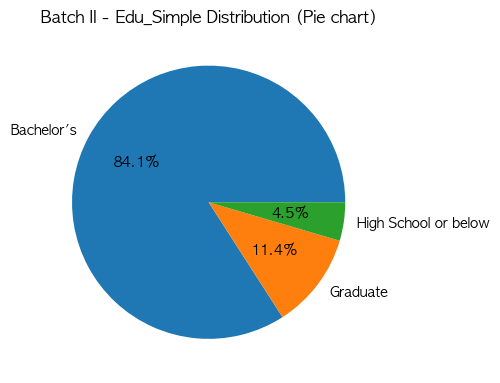

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# ✅ Univariate Anlaysis
def analyze_demographics(file_path, batch_name=""):
    print(f"\nStart Analysis: {batch_name or os.path.basename(file_path)}")
    
    df = pd.read_csv(file_path)

    # Numerical Variable: Age
    print("Age Statistics Summary")
    print(df['Age'].describe())

    # List of Categorical variables
    categorical_columns = [
        'Age Group', 'Gender', 'Location', 'Education Level', 
        'Employment Level', 'Car Manufacturers', 'Phone Manufacturers', 
        'Phone Model','Location_simplified','Edu_Simple'
    ]

    for col in categorical_columns:
        if col not in df.columns:
            print(f"⚠️ Column {col} not exist, Pass")
            continue
        
        print(f"\n🔹 {col} Distribution:")
        if col == 'Location' or col == 'Car Manufacturers':
            all_locations = []

            for val in df[col].dropna():
                parts = [p.strip() for p in str(val).split(',')] 
                all_locations.extend(parts)

            loc_series = pd.Series(all_locations)
            value_counts = loc_series.value_counts()
        else:
            value_counts = df[col].value_counts(dropna=False)

        print(value_counts)

        # Bar chart
        plt.figure(figsize=(8, 4))
        sns.barplot(x=value_counts.index, y=value_counts.values)
        plt.title(f'{batch_name or col} - {col} Distribution (Bar chart)')
        plt.xticks(rotation=45)
        plt.ylabel("Count")
        plt.tight_layout()
        plt.show()

        # Pie chart
        plt.figure(figsize=(5, 5))
        value_counts.plot.pie(autopct='%1.1f%%')
        plt.title(f'{batch_name or col} - {col} Distribution (Pie chart)')
        plt.ylabel('')
        plt.tight_layout()
        plt.show()

file_I = "/Users/yooseohyeon/Desktop/170325/Demo_batch_I_update.csv"
file_II = "/Users/yooseohyeon/Desktop/170325/Demo_batch_II_update.csv"

# 분석 실행
analyze_demographics(file_I, batch_name="Batch I")
analyze_demographics(file_II, batch_name="Batch II")

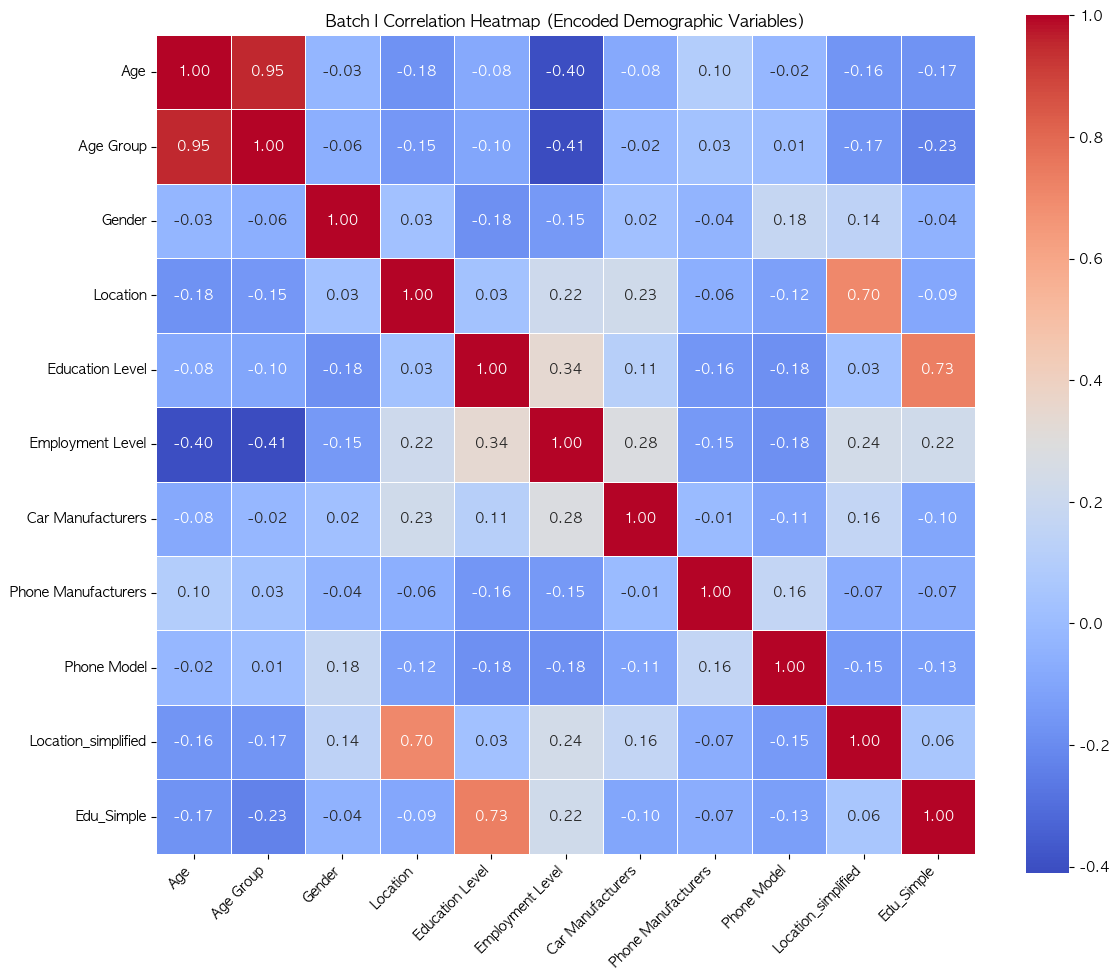

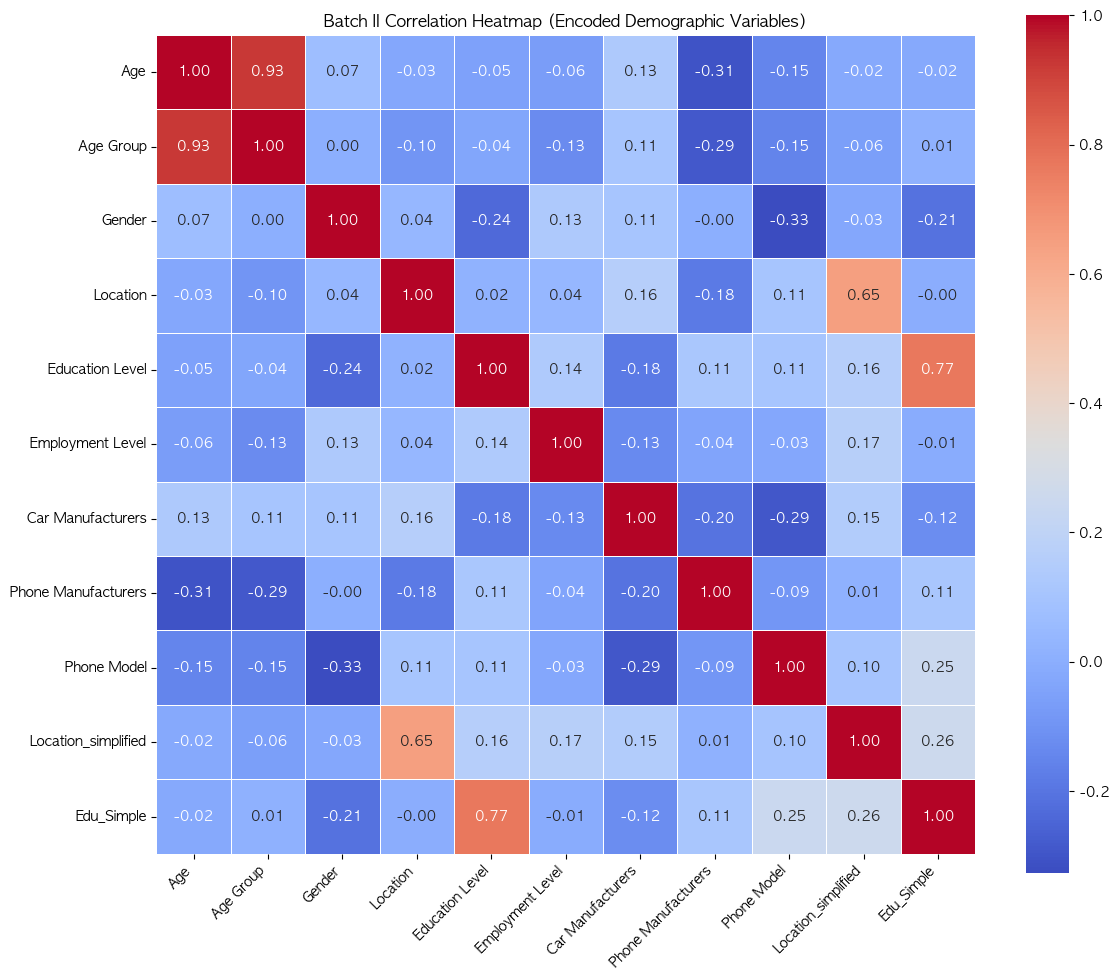

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

def plot_encoded_correlation_heatmap(file_path, title_prefix=""):
    df = pd.read_csv(file_path)
    
    cols = ['Age', 'Age Group', 'Gender', 'Location', 'Education Level', 
            'Employment Level', 'Car Manufacturers', 'Phone Manufacturers', 
            'Phone Model', 'Location_simplified', 'Edu_Simple']
    
    df_encoded = df[cols].copy()

    le = LabelEncoder()
    for col in df_encoded.columns:
        df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

    corr = df_encoded.corr()

    #Heatmap Visualization
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, square=True)
    plt.title(f"{title_prefix} Correlation Heatmap (Encoded Demographic Variables)")
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

file_I = "/Users/yooseohyeon/Desktop/170325/Demo_batch_I_update.csv"
file_II = "/Users/yooseohyeon/Desktop/170325/Demo_batch_II_update.csv"

plot_encoded_correlation_heatmap(file_I, title_prefix="Batch I")
plot_encoded_correlation_heatmap(file_II, title_prefix="Batch II")


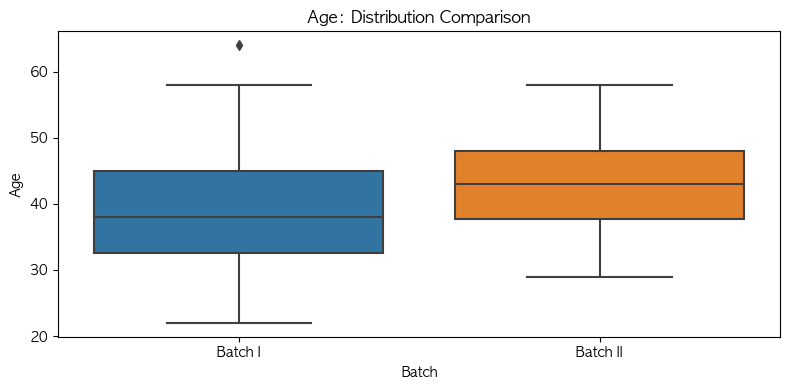

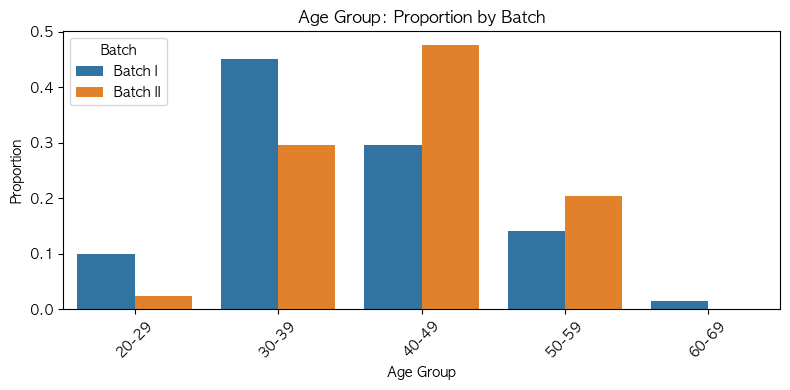

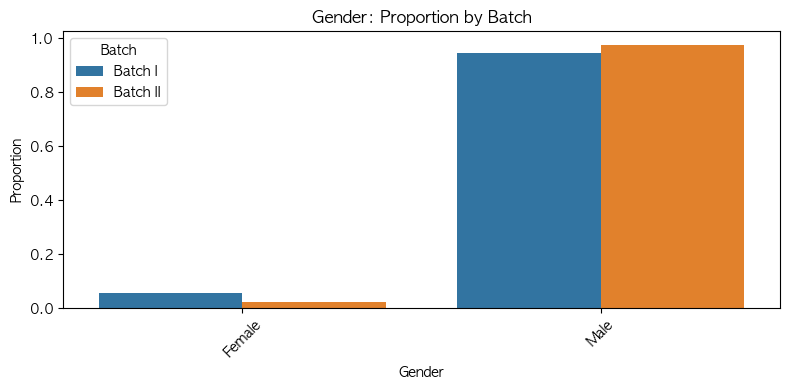

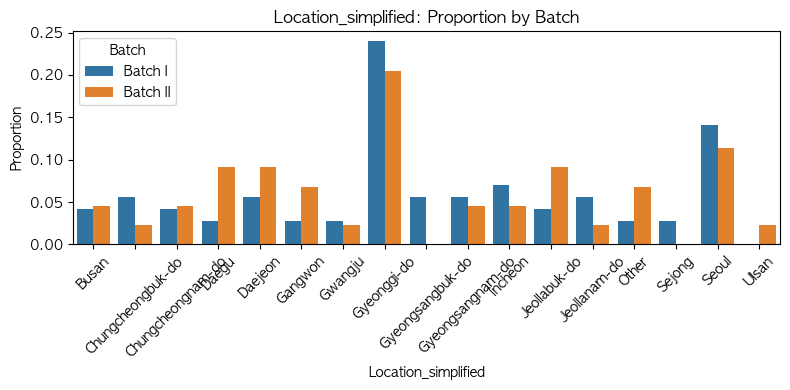

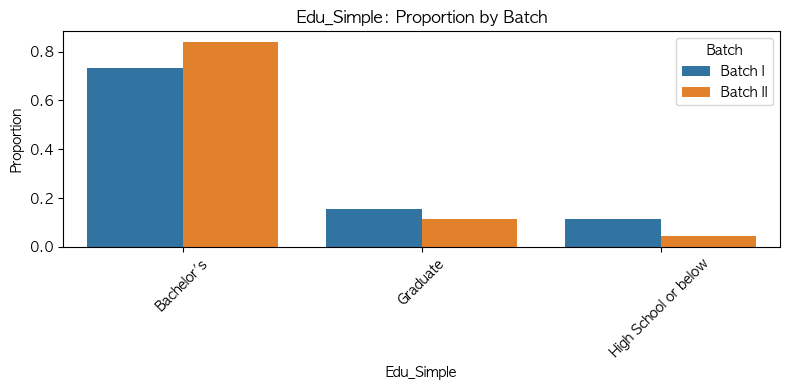

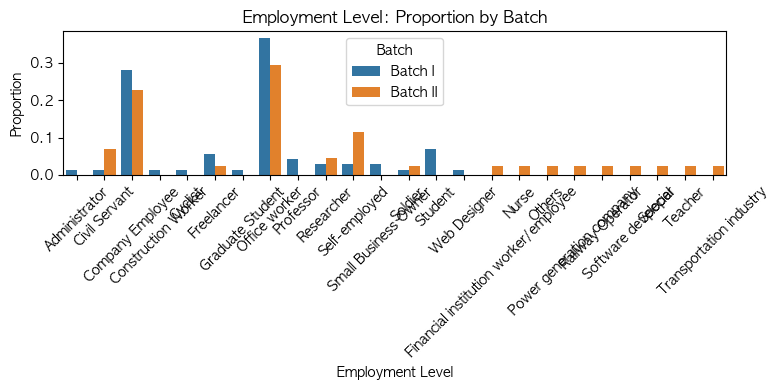

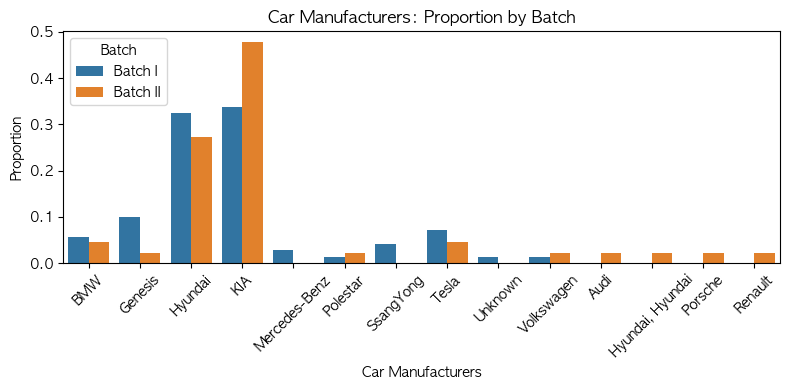

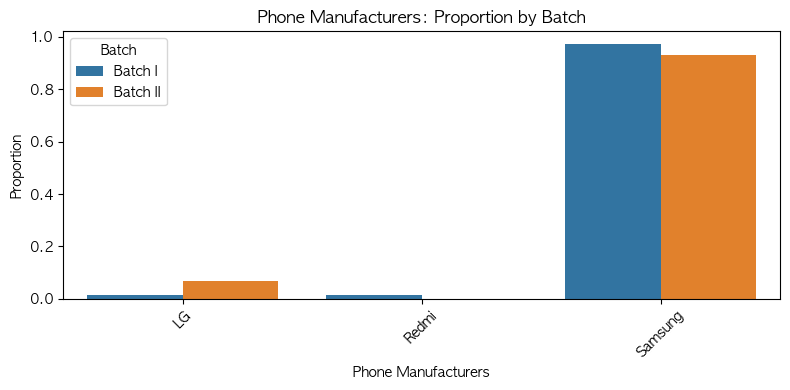

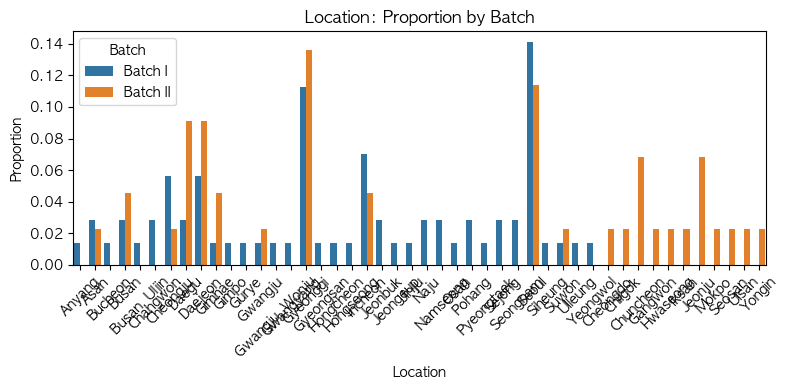

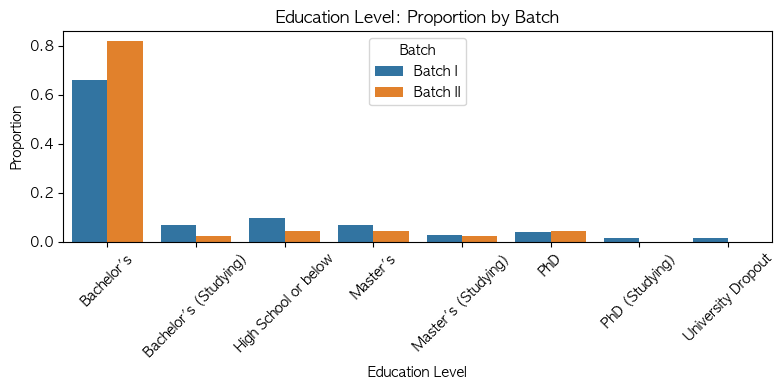

In [34]:
#Comparison between Batch 1 and 2
def compare_batches(df1, df2, cols, label1="Batch I", label2="Batch II"):
    df1 = df1.copy()
    df2 = df2.copy()
    
    # 'Batch' 컬럼 충돌 방지
    if 'Batch' in df1.columns:
        df1 = df1.drop(columns=['Batch'])
    if 'Batch' in df2.columns:
        df2 = df2.drop(columns=['Batch'])

    # 배치 컬럼 추가
    df1['Batch'] = label1
    df2['Batch'] = label2

    # 병합
    combined = pd.concat([df1[cols + ['Batch']], df2[cols + ['Batch']]], axis=0)

    for col in cols:
        plt.figure(figsize=(8, 4))

        if pd.api.types.is_numeric_dtype(combined[col]):
            sns.boxplot(data=combined, x='Batch', y=col)
            plt.title(f"{col}: Distribution Comparison")
        else:
            # 범주형: 비율 계산 후 시각화
            count_df = combined.groupby(['Batch', col]).size().reset_index(name='Count')
            total_per_batch = count_df.groupby('Batch')['Count'].transform('sum')
            count_df['Proportion'] = count_df['Count'] / total_per_batch

            sns.barplot(data=count_df, x=col, y='Proportion', hue='Batch')
            plt.title(f"{col}: Proportion by Batch")
            plt.xticks(rotation=45)

        plt.tight_layout()
        plt.show()

df1 = pd.read_csv("/Users/yooseohyeon/Desktop/170325/Demo_batch_I_update.csv")
df2 = pd.read_csv("/Users/yooseohyeon/Desktop/170325/Demo_batch_II_update.csv")

columns_to_compare = [
    'Age', 'Age Group', 'Gender', 'Location_simplified', 'Edu_Simple',
    'Employment Level', 'Car Manufacturers', 'Phone Manufacturers', 'Location', 'Education Level'
]

compare_batches(df1, df2, columns_to_compare)

In [ ]:
import numpy as np


df1['Batch'] = 'Batch I'
df2['Batch'] = 'Batch II'

combined = pd.concat([df1, df2], ignore_index=True)
#Facet Grid
"""facet_vars = ['Gender', 'Edu_Simple', 'Employment Level', 'Phone Manufacturers']
for col in facet_vars:
    g = sns.catplot(data=combined, kind='count', x=col, hue='Batch', height=4, aspect=1.5)
    g.set_xticklabels(rotation=45)
    g.fig.suptitle(f'{col} distribution by batch', y=1.03)
    plt.tight_layout()
    plt.show()"""

# Radar 차트용 대표 범주 비율 수치화
radar_vars = ['Age', 'Age Group', 'Gender', 'Location', 'Education Level', 
            'Employment Level', 'Car Manufacturers', 'Phone Manufacturers', 
            'Phone Model', 'Location_simplified', 'Edu_Simple']
batch_profiles = {}

for batch in ['Batch I', 'Batch II']:
    profile = []
    sub_df = combined[combined['Batch'] == batch]
    for var in radar_vars:
        top_ratio = sub_df[var].value_counts(normalize=True).max()
        profile.append(top_ratio)
    batch_profiles[batch] = profile

# Radar 차트 시각화
labels = radar_vars
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # 마지막 연결

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for batch in batch_profiles:
    values = batch_profiles[batch] + [batch_profiles[batch][0]]
    ax.plot(angles, values, label=batch)
    ax.fill(angles, values, alpha=0.25)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.title("Dominant Category Proportions by Batch (Radar Chart)")
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.tight_layout()
plt.show()

NameError: name 'df1' is not defined


📊 관계 분석 시작: Batch I


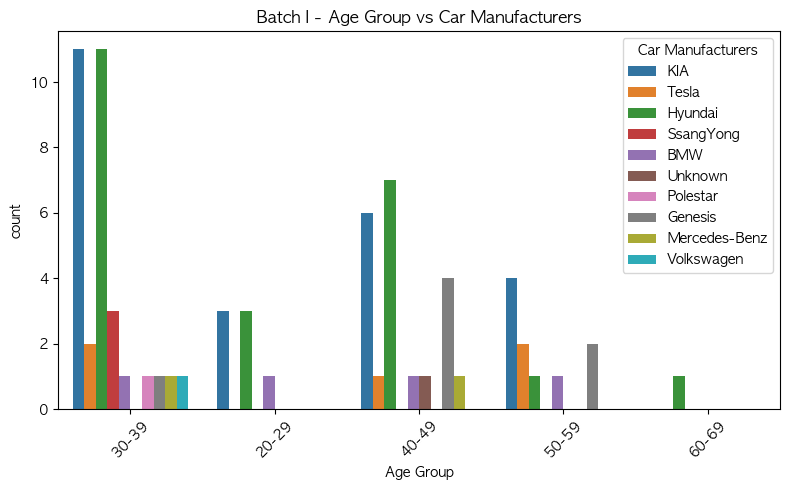

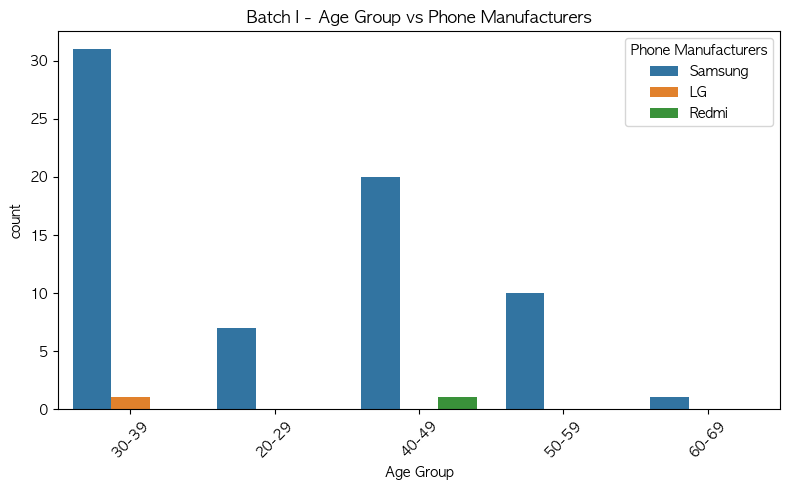

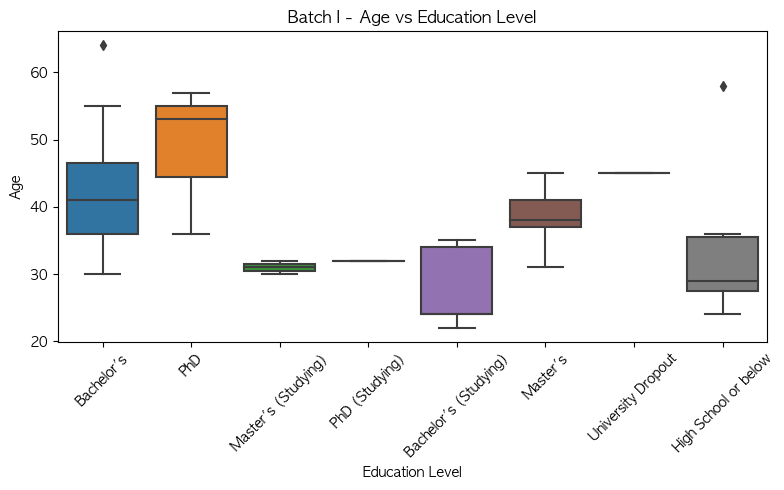

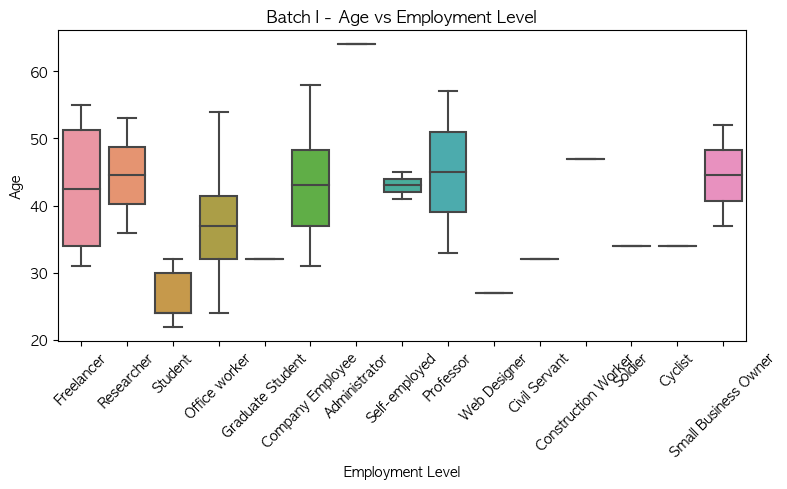

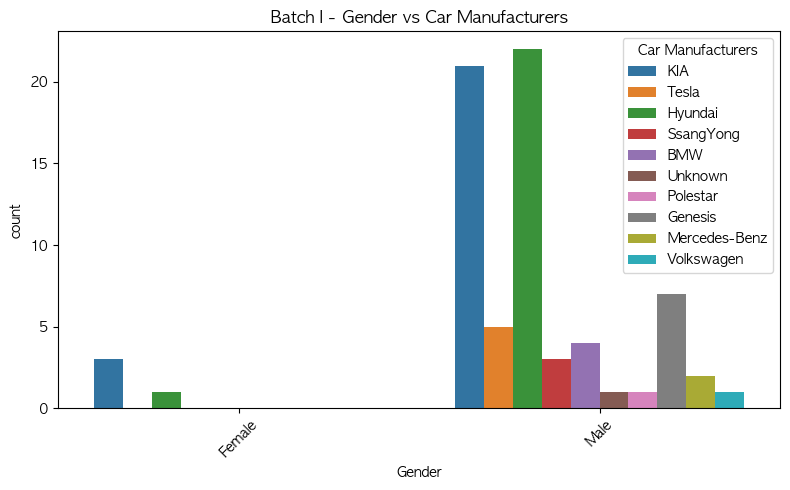

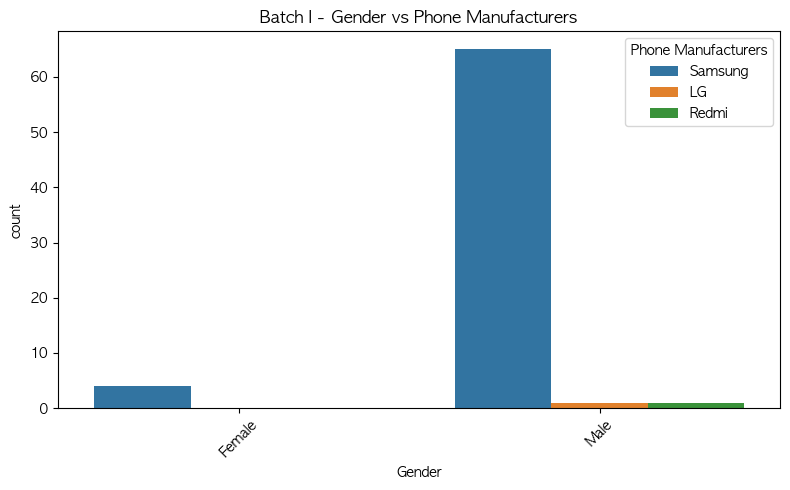

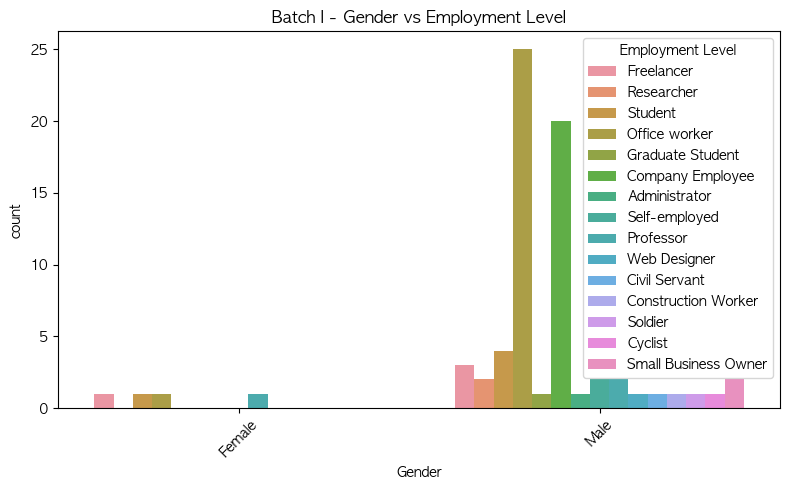

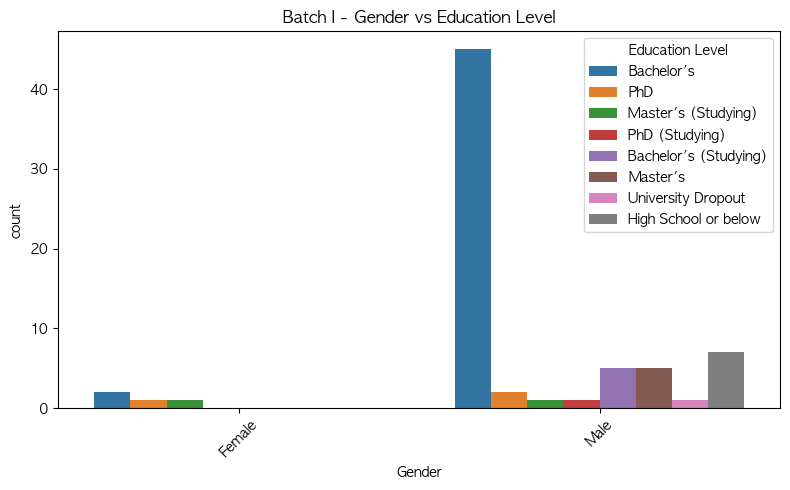

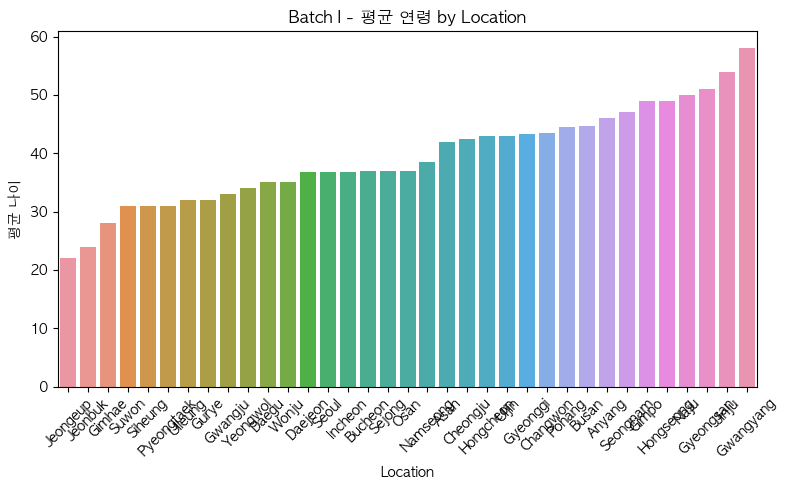

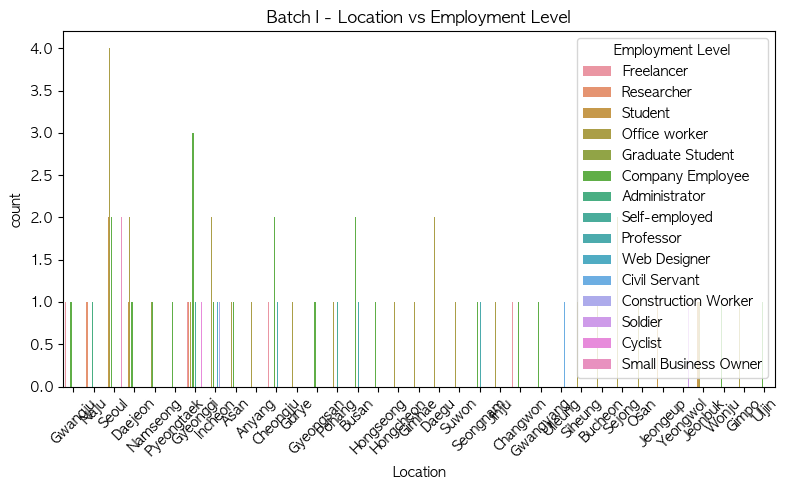

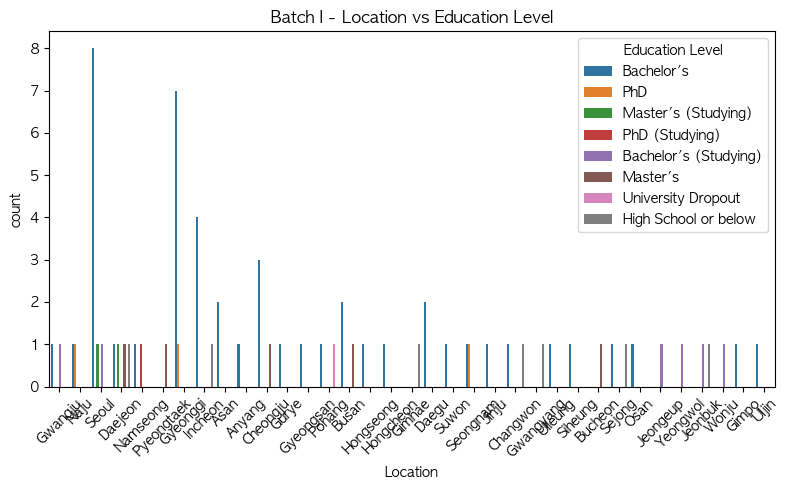

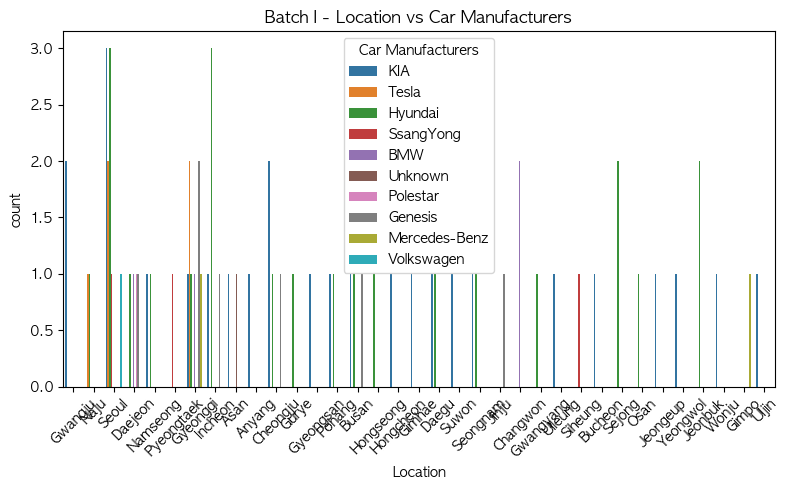

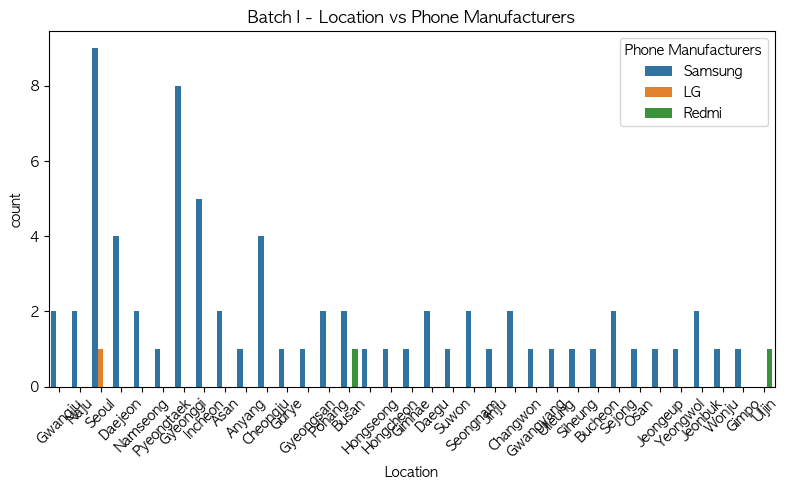


📊 관계 분석 시작: Batch II


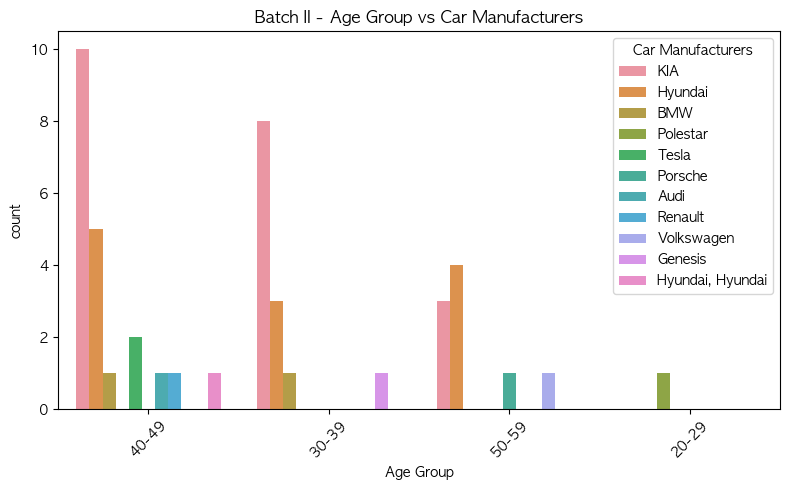

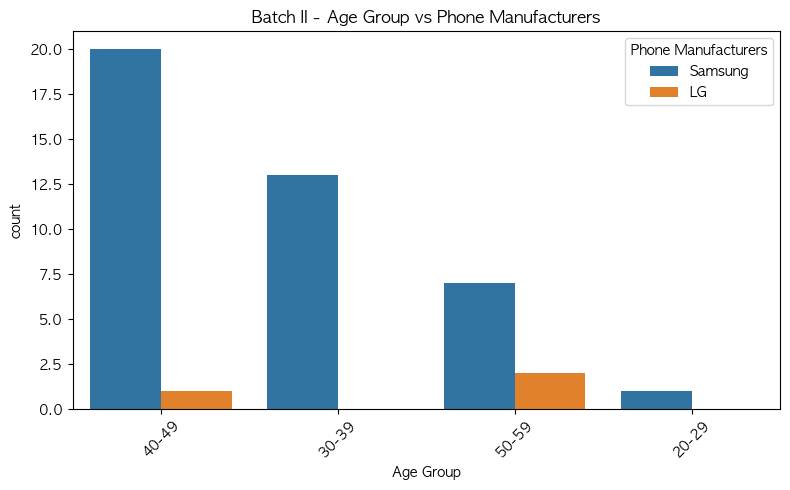

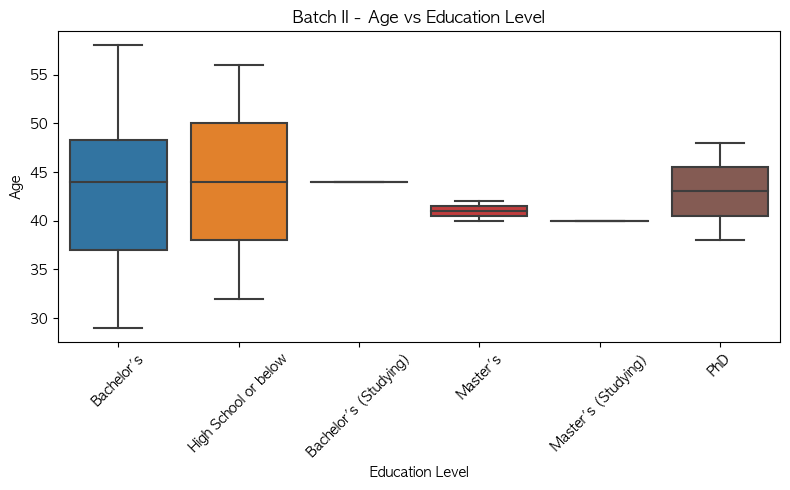

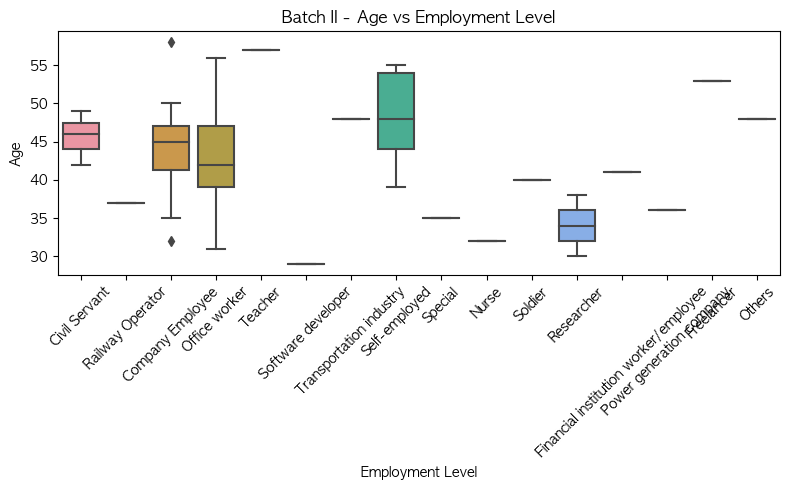

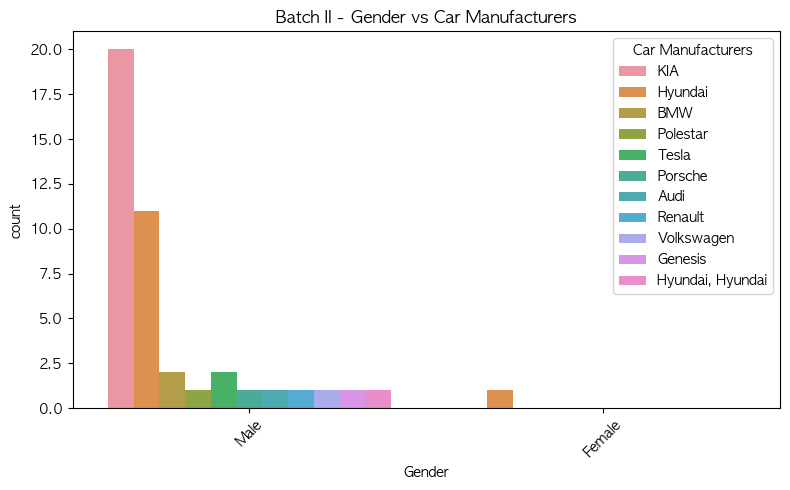

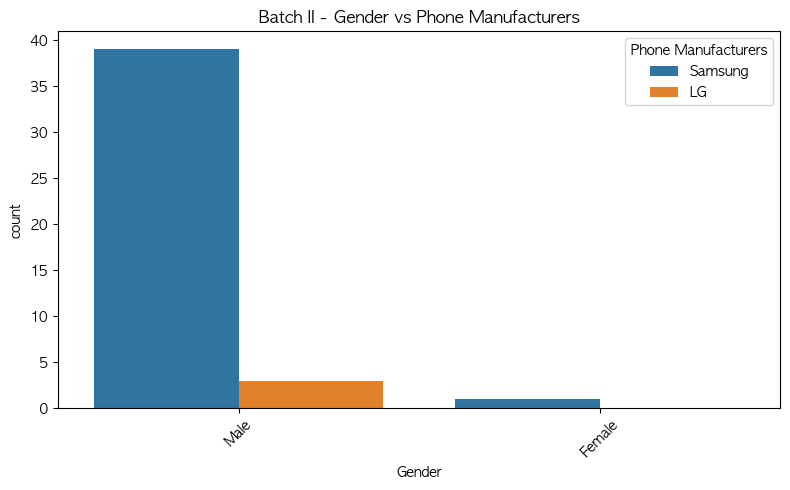

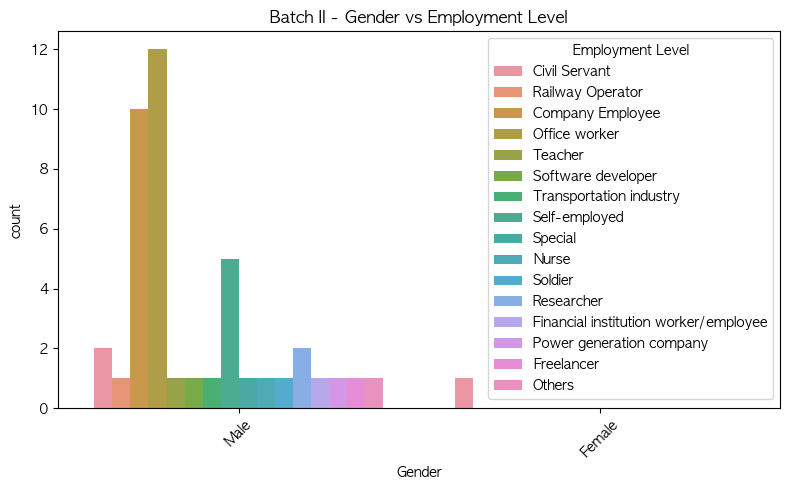

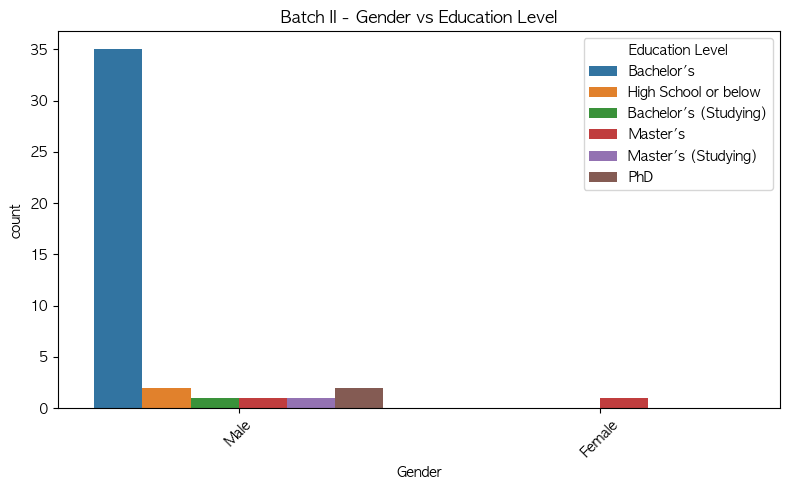

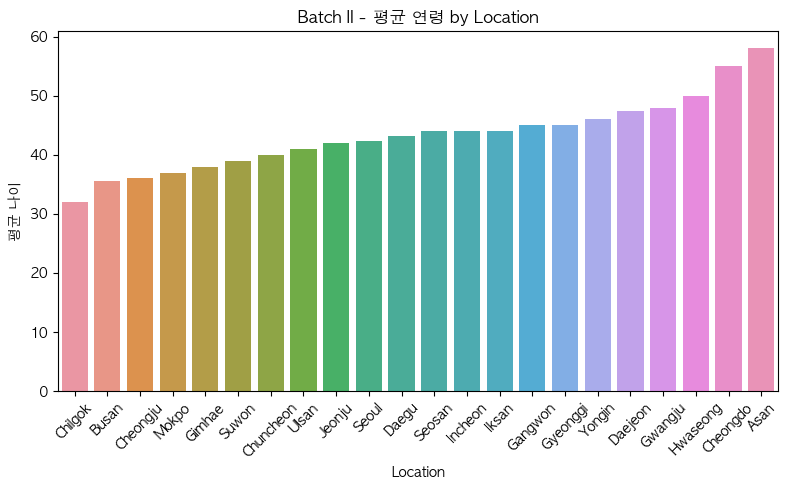

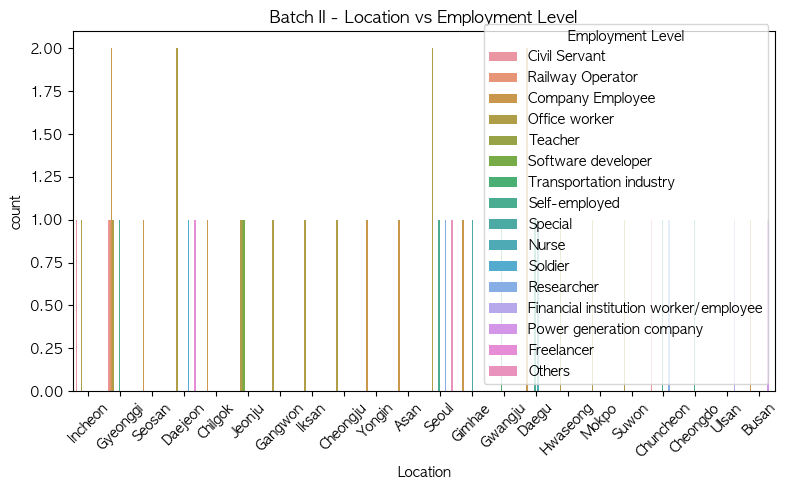

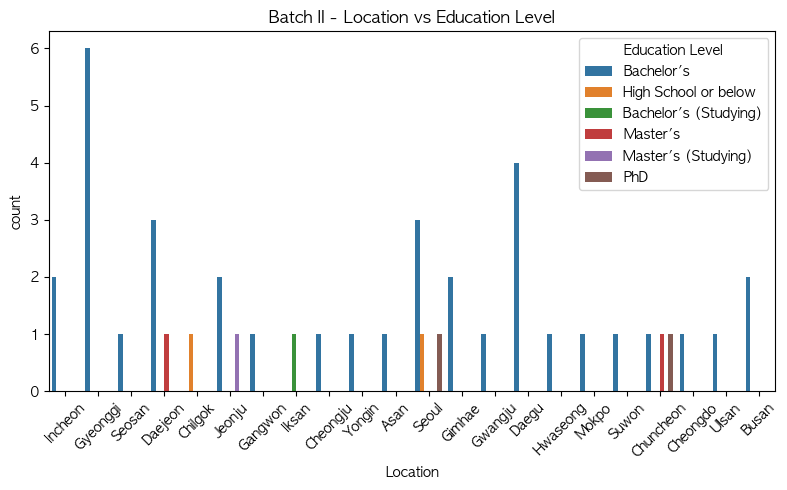

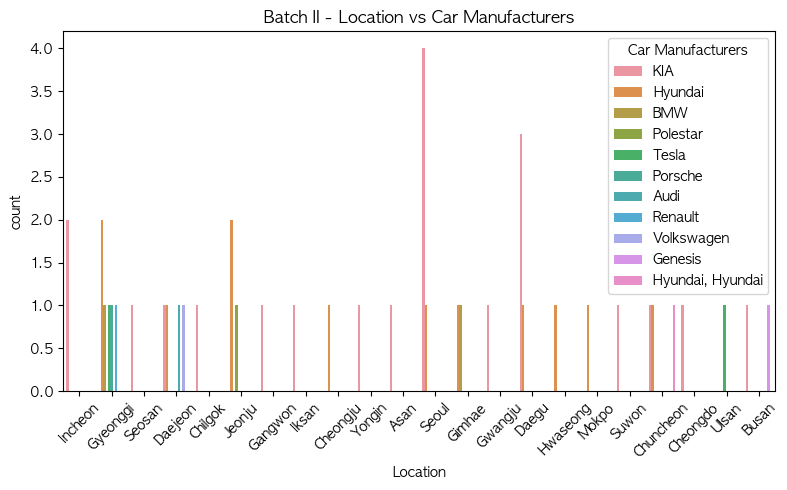

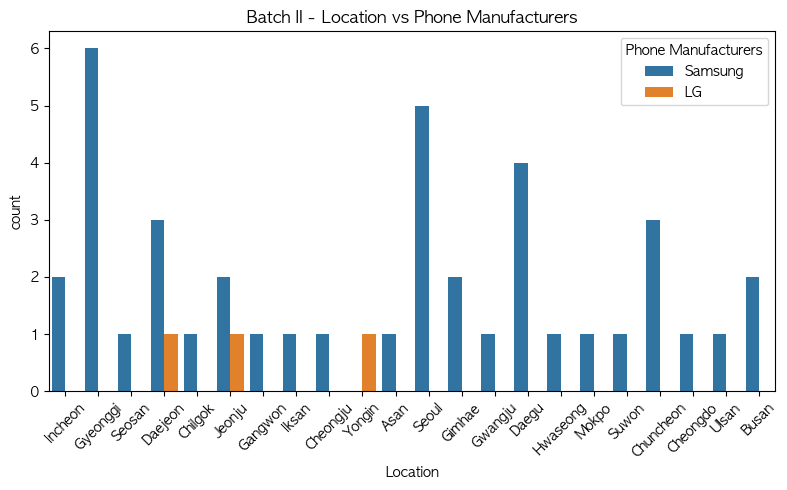

In [20]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

def analyze_relationships(file_path, batch_name=""):
    print(f"\n📊 Relationship Analysis: {batch_name or os.path.basename(file_path)}")

    df = pd.read_csv(file_path)

    # 🔸 1. Age Group vs Car/Phone Manufacturers
    for target_col in ['Car Manufacturers', 'Phone Manufacturers']:
        if 'Age Group' in df.columns and target_col in df.columns:
            plt.figure(figsize=(8, 5))
            sns.countplot(data=df, x='Age Group', hue=target_col)
            plt.title(f'{batch_name} - Age Group vs {target_col}')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

    # 🔸 2. Age vs Education/Employment Level (Boxplot)
    for target_col in ['Education Level', 'Employment Level']:
        if 'Age' in df.columns and target_col in df.columns:
            plt.figure(figsize=(8, 5))
            sns.boxplot(data=df, x=target_col, y='Age')
            plt.title(f'{batch_name} - Age vs {target_col}')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

    # 🔸 3. Gender vs (Car/Phone Manufacturers, Employment, Education)
    gender_targets = ['Car Manufacturers', 'Phone Manufacturers', 'Employment Level', 'Education Level']
    for target_col in gender_targets:
        if 'Gender' in df.columns and target_col in df.columns:
            plt.figure(figsize=(8, 5))
            sns.countplot(data=df, x='Gender', hue=target_col)
            plt.title(f'{batch_name} - Gender vs {target_col}')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

    # 🔸 4. Analysis for each Location 
    if 'Location' in df.columns:
        # Location Multivariate Analysis
        loc_rows = []
        for _, row in df.iterrows():
            locations = str(row['Location']).split(',')
            for loc in locations:
                loc = loc.strip()
                row_copy = row.copy()
                row_copy['Location'] = loc
                loc_rows.append(row_copy)
        df_expanded = pd.DataFrame(loc_rows)

        # 🔹 Location vs Average Age
        if 'Age' in df_expanded.columns:
            age_by_loc = df_expanded.groupby('Location')['Age'].mean().sort_values()
            plt.figure(figsize=(8, 5))
            sns.barplot(x=age_by_loc.index, y=age_by_loc.values)
            plt.title(f'{batch_name} - Average Age by Location')
            plt.xticks(rotation=45)
            plt.ylabel("Average Age")
            plt.tight_layout()
            plt.show()

        # 🔹 Location vs Employment Level, Education Level, Car/Phone
        loc_targets = ['Employment Level', 'Education Level', 'Car Manufacturers', 'Phone Manufacturers']
        for target_col in loc_targets:
            if target_col in df_expanded.columns:
                plt.figure(figsize=(8, 5))
                sns.countplot(data=df_expanded, x='Location', hue=target_col)
                plt.title(f'{batch_name} - Location vs {target_col}')
                plt.xticks(rotation=45)
                plt.tight_layout()
                plt.show()

file_I = "/Users/yooseohyeon/Desktop/170325/Demo_batch_I.csv"
file_II = "/Users/yooseohyeon/Desktop/170325/Demo_batch_II.csv"

analyze_relationships(file_I, batch_name="Batch I")
analyze_relationships(file_II, batch_name="Batch II")

### Filter the Users

In [ ]:
import shutil

filtered_user_dir = "eva_250121_filtered_user"

# List of allowed users
allowed_users = [
    "cmp1_usr541", "cmp1_usr543", "cmp1_usr544", "cmp1_usr545", "cmp1_usr546",
    "cmp1_usr547", "cmp1_usr559", "cmp1_usr571", "cmp1_usr581", "cmp1_usr582",
    "cmp1_usr583", "cmp1_usr586", "cmp1_usr589", "cmp1_usr590", "cmp1_usr591",
    "cmp1_usr592", "cmp1_usr593", "cmp1_usr594", "cmp1_usr596", "cmp1_usr598",
    "cmp1_usr599", "cmp1_usr600", "cmp1_usr601", "cmp1_usr602", "cmp1_usr603",
    "cmp1_usr609", "cmp1_usr612", "cmp1_usr618", "cmp1_usr619", "cmp1_usr620",
    "cmp1_usr623", "cmp1_usr624", "cmp1_usr625", "cmp1_usr626", "cmp1_usr628",
    "cmp1_usr629", "cmp1_usr630", "cmp1_usr631", "cmp1_usr632", "cmp1_usr633",
    "cmp1_usr634", "cmp1_usr635", "cmp1_usr636", "cmp1_usr637", "cmp1_usr638",
    "cmp1_usr639", "cmp1_usr640", "cmp1_usr641", "cmp1_usr642", "cmp1_usr643",
    "cmp1_usr644", "cmp1_usr646", "cmp1_usr647", "cmp1_usr648", "cmp1_usr649",
    "cmp1_usr650", "cmp1_usr651", "cmp1_usr652", "cmp1_usr654", "cmp1_usr655",
    "cmp1_usr656", "cmp1_usr657", "cmp1_usr658",
    "cmp1_usr659", "cmp1_usr660", "cmp1_usr661", "cmp1_usr662", "cmp1_usr663",
    "cmp1_usr664", "cmp1_usr665", "cmp1_usr666", "cmp1_usr667", "cmp1_usr668",
    "cmp1_usr669", "cmp1_usr670", "cmp1_usr671", "cmp1_usr672", "cmp1_usr673",
    "cmp1_usr674", "cmp1_usr675", "cmp1_usr676", "cmp1_usr677", "cmp1_usr678",
    "cmp1_usr679", "cmp1_usr680", "cmp1_usr681", "cmp1_usr682", "cmp1_usr683", 
    "cmp1_usr684", "cmp1_usr685", "cmp1_usr686", "cmp1_usr687", "cmp1_usr688",
    "cmp1_usr689", "cmp1_usr690", "cmp1_usr691", "cmp1_usr692", "cmp1_usr693",
    "cmp1_usr694", "cmp1_usr695", "cmp1_usr696", "cmp1_usr697", "cmp1_usr698",
    "cmp1_usr699", "cmp1_usr700", "cmp1_usr701", "cmp1_usr702"
]

# Create the new filtered directory if it does not exist
os.makedirs(filtered_user_dir, exist_ok=True)

# Filter and copy allowed users' data
for user_id in allowed_users:
    user_dir = os.path.join(output_dir, user_id)
    target_dir = os.path.join(filtered_user_dir, user_id)
    
    if os.path.exists(user_dir):
        try:
            # Copy the entire user directory to the filtered directory
            shutil.copytree(user_dir, target_dir)
            print(f"Copied data for user: {user_id}")
        except Exception as e:
            print(f"Error copying data for user {user_id}: {e}")
    else:
        print(f"User directory not found: {user_id}")

print(f"Filtered user data saved to: {filtered_user_dir}")

In [ ]:
output_dir = "eva_250121_filtered_user"
data_date = "250121"

### Total Counts for each User

In [ ]:
# Initialize a dictionary to store total data points for each user
user_total_counts = {}

# Initialize the grand total
grand_total = 0

# Process each user's directory
for participant_name in os.listdir(output_dir):
    participant_dir = os.path.join(output_dir, participant_name)
    if os.path.isdir(participant_dir):  # Ensure it's a directory
        total_count = 0  # Initialize total count for the user
        
        # Iterate through each file in the user's directory
        for root, dirs, files in os.walk(participant_dir):
            for file_name in files:
                file_path = os.path.join(root, file_name)
                
                if file_name.endswith(".csv"):  # Only process CSV files
                    try:
                        # Read the CSV file
                        data = pd.read_csv(file_path)
                        
                        # Add the row count of the file to the user's total count
                        total_count += len(data)
                    except Exception as e:
                        print(f"Error processing {file_path}: {e}")
        
        # Store the total count for the user
        user_total_counts[participant_name] = total_count
        
        # Add the user's total count to the grand total
        grand_total += total_count

# Print the total counts for each user
for user, count in user_total_counts.items():
    print(f"Total data points for {user}: {count}")

# Print the grand total
print(f"Grand total data points for all users: {grand_total}")

### Total counts for each Sensor Channel

Data Sources Key
- 2: Bluetooth
- 3: Unlock State
- 5: App Visibility to the User
- 7: Location GPS
- 8: Calls
- 9: Application Usage
- 10: Step Detector
- 12: Android Light
- 14: Activity Recognition
- 16: Connectivity Status
- 17: Battery Status
- 18: User Actions in the App
- 20: Application Activity
- 21: Permission Access

In [ ]:
# Define the data sources
data_sources = {
    2: "Bluetooth",
    3: "Unlock State",
    5: "App Visibility to the User",
    7: "Location GPS",
    8: "Calls",
    9: "Application Usage",
    10: "Step Detector",
    12: "Android Light",
    14: "Activity Recognition",
    16: "Connectivity Status",
    17: "Battery Status",
    18: "User Actions in the App",
    20: "Application Activity",
    21: "Permission Access"
}

# Initialize a dictionary to store grand totals for each data source
data_source_totals = {source_name: 0 for source_id, source_name in data_sources.items()}

# Process each user's directory
for participant_name in os.listdir(output_dir):
    participant_dir = os.path.join(output_dir, participant_name)
    if os.path.isdir(participant_dir):  # Ensure it's a directory
        # Process each data source for the user
        for source_id, source_name in data_sources.items():
            source_dir = os.path.join(participant_dir, f"source_{source_id}")
            source_file = os.path.join(source_dir, f"data_source_{source_id}.csv")
            
            if os.path.exists(source_file):
                try:
                    # Read the data source file
                    source_data = pd.read_csv(source_file)
                    
                    # Add the row count of the file to the total for this data source
                    data_source_totals[source_name] += len(source_data)
                except Exception as e:
                    print(f"Error processing {source_name} for {participant_name}: {e}")

# Print the grand total for each data source
print("Grand total data points for each data source:")
for source_name, total in data_source_totals.items():
    print(f"{source_name}: {total}")

### Total Counts for each Day

In [ ]:
# Define the date range
start_date = pd.to_datetime("2024-11-12")
end_date = pd.to_datetime("2025-01-07")

In [ ]:
# Initialize a dictionary to store daily totals
daily_totals = {}

# Process each user's directory
for participant_name in os.listdir(output_dir):
    participant_dir = os.path.join(output_dir, participant_name)
    if os.path.isdir(participant_dir):  # Ensure it's a directory
        # Process each data source for the user
        for source_id, source_name in data_sources.items():
            source_dir = os.path.join(participant_dir, f"source_{source_id}")
            source_file = os.path.join(source_dir, f"data_source_{source_id}.csv")
            
            if os.path.exists(source_file):
                try:
                    # Read the data source file
                    source_data = pd.read_csv(source_file)
                    
                    # Ensure the file contains a timestamp column
                    if 'timestamp' in source_data.columns:
                        # Convert epoch timestamp to datetime
                        source_data['timestamp'] = pd.to_datetime(source_data['timestamp'], unit='ms', errors='coerce')
                        
                        # Drop rows with invalid timestamps
                        source_data = source_data.dropna(subset=['timestamp'])
                        
                        # Filter data within the date range
                        source_data = source_data[(source_data['timestamp'] >= start_date) & (source_data['timestamp'] <= end_date)]
                        
                        # Extract the date from the timestamp
                        source_data['date'] = source_data['timestamp'].dt.date
                        
                        # Calculate the daily counts
                        daily_counts = source_data.groupby('date').size()
                        
                        # Add the daily counts to the grand total
                        for date, count in daily_counts.items():
                            if date not in daily_totals:
                                daily_totals[date] = 0
                            daily_totals[date] += count
                    else:
                        print(f"Invalid file structure in {source_file}.")
                except Exception as e:
                    print(f"Error processing {source_name} for {participant_name}: {e}")

# Print the grand total for each day
print("Grand total data points for each day:")
for date, total in sorted(daily_totals.items()):
    print(f"{date}: {total}")

### Daily Data Check and Report Generation

In [ ]:
# Path to save reports
report_dir = "eva_userstatus_report"

# Ensure the report directory exists
os.makedirs(report_dir, exist_ok=True)

# Define data source mapping
data_sources = {
    2: "Bluetooth",
    7: "GPS",
    12: "Light Data",
    14: "Activity Recognition",
    20: "Application Activity"
}

# Thresholds
GPS_THRESHOLD = 144
LIGHT_THRESHOLD = 144
OTHERS_THRESHOLD = 0  # Minimum acceptable count for other data sources

# Use start_date and end_date defined earlier
date_range = pd.date_range(start=start_date, end=end_date).date

# Process each user's data
for participant_name in os.listdir(output_dir):
    participant_dir = os.path.join(output_dir, participant_name)
    
    # Initialize daily report dictionary with 'Perfect' status
    daily_report = {date: "Perfect" for date in date_range}

    # Track daily counts for each data source
    daily_data_counts = {date: {source_id: 0 for source_id in data_sources} for date in date_range}

    # Check for each data source
    for source_id, source_name in data_sources.items():
        source_dir = os.path.join(participant_dir, f"source_{source_id}")
        source_file = os.path.join(source_dir, f"data_source_{source_id}.csv")
        
        # Check if data source exists
        if os.path.exists(source_file):
            # Read the data and check daily counts
            data = pd.read_csv(source_file)
            
            if 'timestamp' in data.columns:
                # Convert epoch to datetime
                data['timestamp'] = pd.to_datetime(data['timestamp'], unit='ms', errors='coerce')
                
                # Drop invalid timestamps
                data = data.dropna(subset=['timestamp'])

                # Extract date and count occurrences per day
                data['date'] = data['timestamp'].dt.date
                daily_counts = data.groupby('date').size().reindex(date_range, fill_value=0)

                # Update daily data counts
                for date, count in daily_counts.items():
                    daily_data_counts[date][source_id] = count

        else:
            # If data source doesn't exist, fill daily counts as 0
            for date in date_range:
                daily_data_counts[date][source_id] = 0

    # Evaluate daily conditions based on thresholds
    for date in date_range:
        status = "Perfect"

        if daily_data_counts[date][7] < GPS_THRESHOLD:  # GPS
            status = "GPS issue"
        if daily_data_counts[date][12] < LIGHT_THRESHOLD:  # Light Data
            if status == "Perfect":
                status = "Low continuous data"
            else:
                status += ", Low continuous data"

        # Check other sources
        for source_id in [2, 14, 20]:  # Bluetooth, Activity Recognition, App Activity
            if daily_data_counts[date][source_id] <= OTHERS_THRESHOLD:
                if status == "Perfect":
                    status = f"{data_sources[source_id]} issue"
                else:
                    status += f", {data_sources[source_id]} issue"

        # Update the daily report with the determined status
        daily_report[date] = status

    # Save the daily report to CSV
    report_df = pd.DataFrame(list(daily_report.items()), columns=["Date", "Status"])
    report_file = os.path.join(report_dir, f"{participant_name}_status_report.csv")
    report_df.to_csv(report_file, index=False)
    print(f"Report generated for {participant_name} at {report_file}")

In [ ]:
from datetime import timedelta
import os
import pandas as pd

# Calculate the past 3 days from end_date
last_3_days = [(end_date - timedelta(days=i)).date() for i in range(1, 4)]

# Initialize list to store users with issues
problematic_users = []

# Define the "Inactive" condition
inactive_conditions = ["GPS issue", "Low continuous data", "Bluetooth issue", "Application Activity issue"]

# Process each user's status report
for report_file in os.listdir(report_dir):
    if report_file.endswith("_status_report.csv"):
        report_path = os.path.join(report_dir, report_file)
        user_data = pd.read_csv(report_path)

        # Convert 'Date' column to datetime
        user_data['Date'] = pd.to_datetime(user_data['Date']).dt.date

        # Filter for the past 3 days
        recent_data = user_data[user_data['Date'].isin(last_3_days)]

        # Collect issues for each user
        issues = []
        for date in last_3_days:
            if date not in recent_data['Date'].values:
                # If the date is missing, assume the user was not active that day
                issues.append(f"Not Active ({date})")
            else:
                # Check the status for the available date
                day_status = recent_data[recent_data['Date'] == date]['Status'].values[0]
                
                # Split status into list of issues
                status_list = day_status.split(", ")
                
                # Check if all inactive conditions are present
                if all(cond in status_list for cond in inactive_conditions):
                    issues.append(f"Inactive ({date})")
                elif day_status != "Perfect":
                    issues.append(f"{day_status} ({date})")

        # Append user with issues and dates
        if issues:
            user_name = report_file.split("_status_report")[0]
            issue_summary = ", ".join(issues)
            problematic_users.append(f"{user_name} - ({issue_summary})")

# Sort problematic users in ascending order
problematic_users.sort()

# Output the list of problematic users with issues
if problematic_users:
    print("Users with issues in the past 3 days (sorted by name):")
    for user in problematic_users:
        print(user)
else:
    print("No users with issues in the past 3 days.")

### Continuous Sensor Channels

In [ ]:
# Function to process a data source and compute daily counts
def process_data_source(source_number, user_counts_dict, data_label):
    for participant_name in os.listdir(output_dir):
        participant_dir = os.path.join(output_dir, participant_name)
        source_dir = os.path.join(participant_dir, f"source_{source_number}")
        source_file = os.path.join(source_dir, f"data_source_{source_number}.csv")
        
        if os.path.exists(source_file):
            try:
                # Read the data file
                source_data = pd.read_csv(source_file)
                
                # Ensure required columns are present
                if 'timestamp' in source_data.columns:
                    # Convert epoch timestamp to datetime
                    source_data['timestamp'] = pd.to_datetime(source_data['timestamp'], unit='ms', errors='coerce')
                    
                    # Drop rows with invalid timestamps
                    source_data = source_data.dropna(subset=['timestamp'])
                    
                    # Filter data within the date range
                    source_data = source_data[(source_data['timestamp'] >= start_date) & (source_data['timestamp'] <= end_date)]
                    
                    # Extract the date and calculate daily counts
                    source_data['date'] = source_data['timestamp'].dt.date
                    daily_counts = source_data.groupby('date').size()
                    
                    # Store non-empty daily counts
                    if not daily_counts.empty:
                        user_counts_dict[participant_name] = daily_counts
                        print(f"Processed {data_label} data for {participant_name}.")
                    else:
                        print(f"No valid {data_label} data for {participant_name} in the date range.")
                else:
                    print(f"Invalid file structure in {source_file}.")
            except Exception as e:
                print(f"Error processing {source_file}: {e}")
        else:
            print(f"source_{source_number} not found for {participant_name}.")

#### Light Data

In [ ]:

# Initialize a dictionary to store daily counts for all users
user_light_daily_counts = {}

# Process battery_status data (source_17)
process_data_source(12, user_light_daily_counts, "battery_status")

# Consolidate all users' daily light data counts into a single DataFrame
if user_light_daily_counts:
    # Ensure the columns are only for the date range
    all_dates = pd.date_range(start=start_date, end=end_date).date
    light_daily_counts_df = pd.DataFrame(index=user_light_daily_counts.keys(), columns=all_dates).fillna(0)  # Initialize DataFrame
    
    # Populate the DataFrame
    for user, counts in user_light_daily_counts.items():
        light_daily_counts_df.loc[user, counts.index] = counts.values
    
    # Reset index and name columns for clarity
    light_daily_counts_df.index.name = 'user'
    light_daily_counts_df.columns = [str(col) for col in light_daily_counts_df.columns]  # Ensure column names are strings
    
    # Save the consolidated DataFrame to a CSV file
    output_file = f"eva_report/all_users_light_{data_date}.csv"
    light_daily_counts_df.to_csv(output_file, index=True)
    print(f"Saved all users' light data counts to {output_file}.")
else:
    print("No valid light data to process for any user.")


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv(f"eva_report/all_users_light_{data_date}.csv", index_col="user")

# Create a heatmap with annotations
plt.figure(figsize=(12, 8))
sns.heatmap(data, annot=True, fmt="d", cmap="YlGnBu", cbar=True)

plt.title("Light Activity")
plt.xlabel("Date")
plt.ylabel("User")
plt.tight_layout()
plt.show()

#### Battery Status - 17

In [ ]:
# Initialize a dictionary to store daily counts for battery_status
user_battery_daily_counts = {}

# Process battery_status data (source_17)
process_data_source(17, user_battery_daily_counts, "battery_status")

# Consolidate all users' battery_status daily counts into a single DataFrame
if user_battery_daily_counts:
    # Ensure the columns are only for the date range
    all_dates = pd.date_range(start=start_date, end=end_date).date
    battery_daily_counts_df = pd.DataFrame(index=user_battery_daily_counts.keys(), columns=all_dates).fillna(0)
    
    # Populate the DataFrame
    for user, counts in user_battery_daily_counts.items():
        battery_daily_counts_df.loc[user, counts.index] = counts.values
    
    # Reset index and name columns for clarity
    battery_daily_counts_df.index.name = 'user'
    battery_daily_counts_df.columns = [str(col) for col in battery_daily_counts_df.columns]  # Ensure column names are strings
    
    # Save the consolidated DataFrame to a CSV file
    output_file = f"eva_report/all_users_battery_status_{data_date}.csv"
    battery_daily_counts_df.to_csv(output_file, index=True)
    print(f"Saved all users' battery_status data counts to {output_file}.")
else:
    print("No valid battery_status data to process for any user.")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv(f"eva_report/all_users_battery_status_{data_date}.csv", index_col="user")

# Create a heatmap with annotations
plt.figure(figsize=(12, 8))
sns.heatmap(data, annot=True, fmt="d", cmap="YlGnBu", cbar=True)

plt.title("Battery Status")
plt.xlabel("Date")
plt.ylabel("User")
plt.tight_layout()
plt.show()

#### Connectivity Status - 16

In [ ]:
# Initialize a dictionary to store daily counts for connectivity_status
user_connectivity_daily_counts = {}

# Process connectivity_status data (source_16)
process_data_source(16, user_connectivity_daily_counts, "connectivity_status")

# Consolidate all users' connectivity_status daily counts into a single DataFrame
if user_connectivity_daily_counts:
    # Ensure the columns are only for the date range
    all_dates = pd.date_range(start=start_date, end=end_date).date
    connectivity_daily_counts_df = pd.DataFrame(index=user_connectivity_daily_counts.keys(), columns=all_dates).fillna(0)
    
    # Populate the DataFrame
    for user, counts in user_connectivity_daily_counts.items():
        connectivity_daily_counts_df.loc[user, counts.index] = counts.values
    
    # Reset index and name columns for clarity
    connectivity_daily_counts_df.index.name = 'user'
    connectivity_daily_counts_df.columns = [str(col) for col in connectivity_daily_counts_df.columns]  # Ensure column names are strings
    
    # Save the consolidated DataFrame to a CSV file
    output_file = f"eva_report/all_users_connectivity_status_{data_date}.csv"
    connectivity_daily_counts_df.to_csv(output_file, index=True)
    print(f"Saved all users' connectivity_status data counts to {output_file}.")
else:
    print("No valid connectivity_status data to process for any user.")


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv(f"eva_report/all_users_connectivity_status_{data_date}.csv", index_col="user")

# Create a heatmap with annotations
plt.figure(figsize=(12, 8))
sns.heatmap(data, annot=True, fmt="d", cmap="YlGnBu", cbar=True)

plt.title("Connectivity Status")
plt.xlabel("Date")
plt.ylabel("User")
plt.tight_layout()
plt.show()

#### Permission Status - 21

In [ ]:
# Initialize a dictionary to store daily counts for permission_status
user_permission_daily_counts = {}

# Process permission_status data (source_21)
process_data_source(21, user_permission_daily_counts, "permission_status")

# Consolidate all users' permission_status daily counts into a single DataFrame
if user_permission_daily_counts:
    # Ensure the columns are only for the date range
    all_dates = pd.date_range(start=start_date, end=end_date).date
    permission_daily_counts_df = pd.DataFrame(index=user_permission_daily_counts.keys(), columns=all_dates).fillna(0)
    
    # Populate the DataFrame
    for user, counts in user_permission_daily_counts.items():
        permission_daily_counts_df.loc[user, counts.index] = counts.values
    
    # Reset index and name columns for clarity
    permission_daily_counts_df.index.name = 'user'
    permission_daily_counts_df.columns = [str(col) for col in permission_daily_counts_df.columns]  # Ensure column names are strings
    
    # Save the consolidated DataFrame to a CSV file
    output_file = f"eva_report/all_users_permission_status_{data_date}.csv"
    permission_daily_counts_df.to_csv(output_file, index=True)
    print(f"Saved all users' permission_status data counts to {output_file}.")
else:
    print("No valid permission_status data to process for any user.")


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv(f"eva_report/all_users_permission_status_{data_date}.csv", index_col="user")

# Create a heatmap with annotations
plt.figure(figsize=(12, 8))
sns.heatmap(data, annot=True, fmt="d", cmap="YlGnBu", cbar=True)

plt.title("Permission Status")
plt.xlabel("Date")
plt.ylabel("User")
plt.tight_layout()
plt.show()

### Bluetooth - 2

In [ ]:
bluetooth_output_dir = f"eva_report/bluetooth_{data_date}"  # Directory to save CSV files

# Ensure the output directory exists
os.makedirs(bluetooth_output_dir, exist_ok=True)

# Process Bluetooth data (source_2) for all users
for participant_name in os.listdir(output_dir):
    participant_dir = os.path.join(output_dir, participant_name)
    source_2_dir = os.path.join(participant_dir, "source_2")
    source_2_file = os.path.join(source_2_dir, "data_source_2.csv")
    
    if os.path.exists(source_2_file):
        try:
            # Read the Bluetooth data
            bluetooth_data = pd.read_csv(source_2_file)
            
            # Check if the expected columns exist
            if 'value' in bluetooth_data.columns and 'timestamp' in bluetooth_data.columns:
                # Extract and parse device name from the 'value' column
                bluetooth_data['device_name'] = bluetooth_data['value'].apply(
                    lambda x: eval(x).get('bluetoothName') if pd.notna(x) and 'bluetoothName' in x else 'Unknown'
                )
                
                # Drop rows with missing device names
                bluetooth_data = bluetooth_data.dropna(subset=['device_name'])
                
                # Count occurrences of each unique device
                unique_device_counts = bluetooth_data['device_name'].value_counts().reset_index()
                unique_device_counts.columns = ['device_name', 'occurrences']
                
                # Save a CSV file for each device
                for _, row in unique_device_counts.iterrows():
                    device_name = row['device_name'].replace(" ", "_")  # Clean device name for filenames
                    device_data = bluetooth_data[bluetooth_data['device_name'] == row['device_name']]
                    
                    # Create the output file name in the format "user-device_name.csv"
                    output_file = os.path.join(bluetooth_output_dir, f"{participant_name}-{device_name}.csv")
                    
                    # Save the filtered data for this device
                    device_data.to_csv(output_file, index=False)
                    print(f"Saved data for {participant_name} - {device_name} to {output_file}")
            else:
                print(f"Invalid file structure in {source_2_file}.")
        except Exception as e:
            print(f"Error processing {source_2_file} for {participant_name}: {e}")
    else:
        print(f"source_2 not found for {participant_name}.")

print(f"All Bluetooth device data has been saved to {bluetooth_output_dir}.")

### Activity Recognition - 14

In [ ]:
import ast

# Initialize a list to store parsed activity data
activity_data = []

# Process each user's source_14 files
for participant_name in os.listdir(output_dir):
    participant_dir = os.path.join(output_dir, participant_name)
    source_14_dir = os.path.join(participant_dir, "source_14")
    source_14_file = os.path.join(source_14_dir, "data_source_14.csv")
    
    if os.path.exists(source_14_file):
        try:
            # Read the source_14 data
            source_14_data = pd.read_csv(source_14_file)
            
            # Parse the `value` field to extract activityType
            for _, row in source_14_data.iterrows():
                try:
                    parsed_value = ast.literal_eval(row['value'])  # Safely parse the value
                    activity_data.append({
                        "user": participant_name,
                        "activityType": parsed_value.get('activityType')
                    })
                except Exception as e:
                    print(f"Error parsing row: {row['value']} - {e}")
        except Exception as e:
            print(f"Error processing {source_14_file}: {e}")

# Create a DataFrame from parsed data
activity_df = pd.DataFrame(activity_data)

# Calculate frequency of each activity type (including UNKNOWN)
activity_frequency = activity_df['activityType'].value_counts()

# Print the results
print("Activity Frequency Across All Users:")
print(activity_frequency)


# Plot the activity frequencies
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
activity_frequency.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Frequency of Activity Types (All Users)")
plt.xlabel("Activity Type")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [ ]:
# Initialize a list to store parsed activity data
activity_data = []

# Process each user's source_14 files
for participant_name in os.listdir(output_dir):
    participant_dir = os.path.join(output_dir, participant_name)
    source_14_dir = os.path.join(participant_dir, "source_14")
    source_14_file = os.path.join(source_14_dir, "data_source_14.csv")
    
    if os.path.exists(source_14_file):
        try:
            # Read the source_14 data
            source_14_data = pd.read_csv(source_14_file)
            
            # Parse the `value` field to extract activityType and confidence
            for _, row in source_14_data.iterrows():
                try:
                    parsed_value = ast.literal_eval(row['value'])  # Safely parse the value
                    activity_data.append({
                        "user": participant_name,
                        "activityType": parsed_value.get('activityType'),
                        "confidence": parsed_value.get('confidence')
                    })
                except Exception as e:
                    print(f"Error parsing row: {row['value']} - {e}")
        except Exception as e:
            print(f"Error processing {source_14_file}: {e}")

# Create a DataFrame from parsed data
activity_df = pd.DataFrame(activity_data)

# Group by activityType and confidence, then count occurrences
confidence_counts = activity_df.groupby(['activityType', 'confidence']).size().unstack(fill_value=0)

# Print the results
print("Confidence Levels by Activity Type Across All Users:")
print(confidence_counts)

# Plot the confidence levels for each activity type
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
confidence_counts.plot(kind='bar', stacked=True, colormap='viridis', edgecolor='black')
plt.title("Confidence Levels by Activity Type (All Users)")
plt.xlabel("Activity Type")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("confidence_level_plot.png")
plt.show()

### Application Usage Data

In [ ]:
from datetime import datetime

app_activity_output_dir = f"eva_report/app_activity_{data_date}" 

# Ensure the output directory exists
os.makedirs(app_activity_output_dir, exist_ok=True)

# Process each user's source_20 files (App Activity)
for participant_name in os.listdir(output_dir):
    participant_dir = os.path.join(output_dir, participant_name)
    source_20_dir = os.path.join(participant_dir, "source_20")
    source_20_file = os.path.join(source_20_dir, "data_source_20.csv")

    if os.path.exists(source_20_file):
        try:
            # Read the data_source_20.csv file
            data = pd.read_csv(source_20_file)

            # Initialize a list to store parsed data
            parsed_data = []
            
            # Parse the 'value' column and extract relevant fields
            for _, row in data.iterrows():
                try:
                    record = ast.literal_eval(row['value'])
                    parsed_data.append({
                        "source_id": row['source_id'],
                        "timestamp_epoch": row['timestamp'],
                        "packageName": record.get('packageName'),
                        "activityType": record.get('activityType'),
                        "timestamp": record.get('timestamp')
                    })
                except Exception as e:
                    print(f"Error parsing row for {participant_name}: {row['value']} - {e}")

            # Create DataFrame from parsed data
            df = pd.DataFrame(parsed_data)

            # Convert timestamp to datetime
            df['timestamp'] = pd.to_datetime(df['timestamp'])

            # Sort by packageName and timestamp
            df = df.sort_values(by=['packageName', 'timestamp'])

            # Initialize tracking variables
            sessions = []
            active_sessions = {}

            # Process each row to detect start/stop activities
            for _, row in df.iterrows():
                package = row['packageName']
                activity = row['activityType']
                timestamp = row['timestamp']
                
                # Start of activity (ACTIVITY_RESUMED)
                if 'ACTIVITY_RESUMED' in activity:
                    active_sessions[package] = {
                        'timestart': timestamp,
                        'packageName': package
                    }
                
                # End of activity (ACTIVITY_PAUSED or STOPPED)
                elif 'ACTIVITY_PAUSED' in activity or 'ACTIVITY_STOPPED' in activity:
                    if package in active_sessions:
                        session = active_sessions.pop(package)
                        session['timestop'] = timestamp
                        session['duration'] = (timestamp - session['timestart']).total_seconds()
                        sessions.append(session)

            # Create a DataFrame for all sessions (across all apps)
            sessions_df = pd.DataFrame(sessions)

            # Save to CSV for each user
            if not sessions_df.empty:
                output_file = os.path.join(
                    app_activity_output_dir,
                    f"{participant_name}_app_activity_data_{data_date}.csv"
                )
                sessions_df.to_csv(output_file, index=False)
                print(f"Saved app activity for {participant_name} to {output_file}")
            else:
                print(f"No sessions found for {participant_name}.")
        
        except Exception as e:
            print(f"Error processing data for {participant_name}: {e}")
    else:
        print(f"source_20 not found for {participant_name}.")

In [ ]:
app_activity_output_resumed_dir = f"eva_report/app_activity_resumed_{data_date}" 

# Ensure the output directory exists
os.makedirs(app_activity_output_resumed_dir, exist_ok=True)

# Process each user's source_20 files (App Activity)
for participant_name in os.listdir(output_dir):
    participant_dir = os.path.join(output_dir, participant_name)
    source_20_dir = os.path.join(participant_dir, "source_20")
    source_20_file = os.path.join(source_20_dir, "data_source_20.csv")

    if os.path.exists(source_20_file):
        try:
            # Read the data_source_20.csv file
            data = pd.read_csv(source_20_file)

            # Initialize a list to store parsed data
            resumed_data = []
            
            # Parse the 'value' column and extract relevant fields
            for _, row in data.iterrows():
                try:
                    record = ast.literal_eval(row['value'])
                    activity_type = record.get('activityType')
                    
                    # Filter for only "ACTIVITY_RESUMED"
                    if 'ACTIVITY_RESUMED' in activity_type:
                        resumed_data.append({
                            "source_id": row['source_id'],
                            "timestamp_epoch": row['timestamp'],
                            "packageName": record.get('packageName'),
                            "activityType": activity_type,
                            "timestamp": record.get('timestamp')
                        })
                except Exception as e:
                    print(f"Error parsing row for {participant_name}: {row['value']} - {e}")

            # Create DataFrame from filtered data
            df = pd.DataFrame(resumed_data)

            # Convert timestamp to datetime
            df['timestamp'] = pd.to_datetime(df['timestamp'])

            # Sort by timestamp (from oldest to newest)
            df = df.sort_values(by=['timestamp'])

            # Save filtered "ACTIVITY_RESUMED" events to CSV
            if not df.empty:
                output_file = os.path.join(
                    app_activity_output_resumed_dir,
                    f"{participant_name}_app_activity_resumed_{data_date}.csv"
                )
                df.to_csv(output_file, index=False)
                print(f"Saved ACTIVITY_RESUMED data for {participant_name} to {output_file}")
            else:
                print(f"No ACTIVITY_RESUMED found for {participant_name}.")
        
        except Exception as e:
            print(f"Error processing data for {participant_name}: {e}")
    else:
        print(f"source_20 not found for {participant_name}.")

### GPS Data

In [ ]:
# Initialize a dictionary to store daily counts for all users
user_gps_daily_counts = {}

# Process each user's source_7 files
for participant_name in os.listdir(output_dir):
    participant_dir = os.path.join(output_dir, participant_name)
    source_7_dir = os.path.join(participant_dir, "source_7")
    source_7_file = os.path.join(source_7_dir, "data_source_7.csv")
    
    if os.path.exists(source_7_file):
        try:
            # Read the source_7 data
            source_7_data = pd.read_csv(source_7_file)
            
            # Ensure data matches expected format
            if 'timestamp' in source_7_data.columns:
                # Convert epoch timestamp to datetime
                source_7_data['timestamp'] = pd.to_datetime(source_7_data['timestamp'], unit='ms', errors='coerce')
                
                # Drop rows with invalid timestamps
                source_7_data = source_7_data.dropna(subset=['timestamp'])
                
                # Filter data within the date range
                source_7_data = source_7_data[(source_7_data['timestamp'] >= start_date) & (source_7_data['timestamp'] <= end_date)]
                
                # Extract the date and calculate daily counts
                source_7_data['date'] = source_7_data['timestamp'].dt.date
                daily_counts = source_7_data.groupby('date').size()
                
                # Only add non-empty daily counts
                if not daily_counts.empty:
                    user_gps_daily_counts[participant_name] = daily_counts
                    print(f"Processed GPS data for {participant_name}.")
                else:
                    print(f"No valid GPS data for {participant_name} in the date range.")
            else:
                print(f"Invalid file structure in {source_7_file}.")
        except Exception as e:
            print(f"Error processing {source_7_file}: {e}")
    else:
        print(f"source_7 not found for {participant_name}.")

# Consolidate all users' daily GPS data counts into a single DataFrame
if user_gps_daily_counts:
    # Ensure the columns are only for the date range
    all_dates = pd.date_range(start=start_date, end=end_date).date
    gps_daily_counts_df = pd.DataFrame(index=user_gps_daily_counts.keys(), columns=all_dates).fillna(0)  # Initialize DataFrame
    
    # Populate the DataFrame
    for user, counts in user_gps_daily_counts.items():
        gps_daily_counts_df.loc[user, counts.index] = counts.values
    
    # Reset index and name columns for clarity
    gps_daily_counts_df.index.name = 'user'
    gps_daily_counts_df.columns = [str(col) for col in gps_daily_counts_df.columns]  # Ensure column names are strings
    
    # Save the consolidated DataFrame to a CSV file
    output_file = "eva14-24_report/all_users_gps.csv"
    gps_daily_counts_df.to_csv(output_file, index=True)
    print(f"Saved all users' GPS data counts to {output_file}.")
else:
    print("No valid GPS data to process for any user.")

#### Check if GPS is allowed all the time

In [ ]:
# Load the consolidated daily counts for light and GPS data
light_file = "eva14-24_report/all_users_light.csv"
gps_file = "eva14-24_report/all_users_gps.csv"

# Read the CSV files into DataFrames
light_data = pd.read_csv(light_file, index_col="user")
gps_data = pd.read_csv(gps_file, index_col="user")

# Ensure both DataFrames have the same users and dates
common_users = light_data.index.intersection(gps_data.index)
common_dates = light_data.columns.intersection(gps_data.columns)

light_data = light_data.loc[common_users, common_dates]
gps_data = gps_data.loc[common_users, common_dates]

# Compare the values
comparison_result = gps_data >= light_data  # Element-wise comparison

# Convert Boolean values to "Yes" and "No"
comparison_result = comparison_result.applymap(lambda x: "Yes" if x else "No")

# Save the comparison result to a new CSV file
output_file = "eva14-24_report/light_vs_gps_comparison.csv"
comparison_result.to_csv(output_file, index=True)

print(f"Comparison results saved to {output_file}.")

### Driving Mode Counts

In [ ]:
# Initialize a dictionary to store daily counts of sampling rate increases for all users
user_sampling_rate_changes = {}

# Define thresholds for ~1 second and ~5 minutes intervals
one_sec_threshold = (1 - 2, 1 + 2)  # 1 second ±2 seconds
five_min_threshold = (300 - 120, 300 + 120)  # 5 minutes ±2 minutes

# Process each user's source_7 files
for participant_name in os.listdir(output_dir):
    participant_dir = os.path.join(output_dir, participant_name)
    source_7_dir = os.path.join(participant_dir, "source_7")
    source_7_file = os.path.join(source_7_dir, "data_source_7.csv")
    
    if os.path.exists(source_7_file):
        try:
            # Read the source_7 data
            source_7_data = pd.read_csv(source_7_file)
            
            # Ensure data matches expected format
            if 'timestamp' in source_7_data.columns:
                # Convert epoch timestamp to datetime
                source_7_data['timestamp'] = pd.to_datetime(source_7_data['timestamp'], unit='ms', errors='coerce')
                
                # Drop rows with invalid timestamps and sort by timestamp
                source_7_data = source_7_data.dropna(subset=['timestamp']).sort_values(by='timestamp')
                
                # Calculate time differences between consecutive records
                source_7_data['time_diff'] = source_7_data['timestamp'].diff().dt.total_seconds()
                
                # Detect sampling rate increases from ~1 second to ~5 minutes
                sampling_increases = (
                    (source_7_data['time_diff'].shift() >= one_sec_threshold[0]) &
                    (source_7_data['time_diff'].shift() <= one_sec_threshold[1]) &
                    (source_7_data['time_diff'] >= five_min_threshold[0]) &
                    (source_7_data['time_diff'] <= five_min_threshold[1])
                )
                
                # Add a column for the date
                source_7_data['date'] = source_7_data['timestamp'].dt.date
                
                # Count the instances of sampling rate increases per day
                daily_changes = source_7_data[sampling_increases].groupby('date').size()
                
                # Only add non-empty daily changes
                if not daily_changes.empty:
                    user_sampling_rate_changes[participant_name] = daily_changes
                    print(f"Processed sampling rate increases for {participant_name}.")
                else:
                    print(f"No valid sampling rate increases for {participant_name}.")
            else:
                print(f"Invalid file structure in {source_7_file}.")
        except Exception as e:
            print(f"Error processing {source_7_file}: {e}")
    else:
        print(f"source_7 not found for {participant_name}.")

# Consolidate all users' sampling rate increase counts into a single DataFrame
if user_sampling_rate_changes:
    # Ensure the columns are only for the date range
    all_dates = pd.date_range(start=start_date, end=end_date).date
    sampling_rate_changes_df = pd.DataFrame(index=user_sampling_rate_changes.keys(), columns=all_dates).fillna(0)  # Initialize DataFrame
    
    # Populate the DataFrame
    for user, changes in user_sampling_rate_changes.items():
        sampling_rate_changes_df.loc[user, changes.index] = changes.values
    
    # Reset index and name columns for clarity
    sampling_rate_changes_df.index.name = 'user'
    sampling_rate_changes_df.columns = [str(col) for col in sampling_rate_changes_df.columns]  # Ensure column names are strings
    
    # Save the consolidated DataFrame to a CSV file
    output_file = "eva14-24_report/driving_mode.csv"
    sampling_rate_changes_df.to_csv(output_file, index=True)
    print(f"Saved all users' sampling rate increase counts to {output_file}.")
else:
    print("No valid sampling rate increases to process for any user.")

### App Visibility to User

In [ ]:
# Process each user's source_5 files
for participant_name in os.listdir(output_dir):
    participant_dir = os.path.join(output_dir, participant_name)
    source_5_dir = os.path.join(participant_dir, "source_5")
    source_5_file = os.path.join(source_5_dir, "data_source_5.csv")
    
    if os.path.exists(source_5_file):
        try:
            # Read the source_5 data
            source_5_data = pd.read_csv(source_5_file)
            
            # Ensure data matches expected format
            if 'timestamp' in source_5_data.columns and 'value' in source_5_data.columns:
                # Filter records containing "AppLifecycleState.resumed"
                source_5_data = source_5_data[source_5_data['value'].str.contains("AppLifecycleState.resumed", na=False)]
                
                # Convert epoch timestamp to datetime
                source_5_data['timestamp'] = pd.to_datetime(source_5_data['timestamp'], unit='ms', errors='coerce')
                
                # Drop rows with invalid timestamps
                source_5_data = source_5_data.dropna(subset=['timestamp'])
                
                # Filter data within the date range
                source_5_data = source_5_data[(source_5_data['timestamp'] >= start_date) & (source_5_data['timestamp'] <= end_date)]
                
                # Extract the date and calculate daily counts
                source_5_data['date'] = source_5_data['timestamp'].dt.date
                daily_counts = source_5_data.groupby('date').size()
                
                # Only add non-empty daily counts
                if not daily_counts.empty:
                    user_visibility_daily_count[participant_name] = daily_counts
                    print(f"Processed daily counts for {participant_name}.")
                else:
                    print(f"No valid data for {participant_name} in the date range.")
            else:
                print(f"Invalid file structure in {source_5_file}.")
        except Exception as e:
            print(f"Error processing {source_5_file}: {e}")
    else:
        print(f"source_5 not found for {participant_name}.")

# Consolidate all users' visibility daily counts into a single DataFrame
if user_visibility_daily_count:
    # Ensure the columns are only for the date range
    all_dates = pd.date_range(start=start_date, end=end_date).date
    visibility_daily_counts_df = pd.DataFrame(index=user_visibility_daily_count.keys(), columns=all_dates).fillna(0)  # Initialize DataFrame
    
    # Populate the DataFrame
    for user, counts in user_visibility_daily_count.items():
        visibility_daily_counts_df.loc[user, counts.index] = counts.values
    
    # Reset index and name columns for clarity
    visibility_daily_counts_df.index.name = 'user'
    visibility_daily_counts_df.columns = [str(col) for col in visibility_daily_counts_df.columns]  # Ensure column names are strings
    
    # Save the consolidated DataFrame to a CSV file
    output_file = "eva14-24_report/all_users_visibility.csv"
    visibility_daily_counts_df.to_csv(output_file, index=True)
    print(f"Saved all users' visibility daily counts to {output_file}.")
else:
    print("No valid data to process for any user.")

### Send Button

In [ ]:
# Initialize a dictionary to store daily counts for SendButton interactions
user_sendbutton_daily_count = {}

# Process each user's source_18 files
for participant_name in os.listdir(output_dir):
    participant_dir = os.path.join(output_dir, participant_name)
    source_18_dir = os.path.join(participant_dir, "source_18")
    source_18_file = os.path.join(source_18_dir, "data_source_18.csv")
    
    if os.path.exists(source_18_file):
        try:
            # Read the source_18 data
            source_18_data = pd.read_csv(source_18_file)
            
            # Ensure data matches expected format
            if 'timestamp' in source_18_data.columns and 'value' in source_18_data.columns:
                # Filter records containing "SendButton"
                source_18_data = source_18_data[source_18_data['value'].str.contains("SendButton", na=False)]
                
                # Convert epoch timestamp to datetime
                source_18_data['timestamp'] = pd.to_datetime(source_18_data['timestamp'], unit='ms', errors='coerce')
                
                # Drop rows with invalid timestamps
                source_18_data = source_18_data.dropna(subset=['timestamp'])
                
                # Filter data within the date range
                source_18_data = source_18_data[(source_18_data['timestamp'] >= start_date) & (source_18_data['timestamp'] <= end_date)]
                
                # Extract the date and calculate daily counts
                source_18_data['date'] = source_18_data['timestamp'].dt.date
                daily_counts = source_18_data.groupby('date').size()
                
                # Only add non-empty daily counts
                if not daily_counts.empty:
                    user_sendbutton_daily_count[participant_name] = daily_counts
                    print(f"Processed SendButton counts for {participant_name}.")
                else:
                    print(f"No valid SendButton data for {participant_name} in the date range.")
            else:
                print(f"Invalid file structure in {source_18_file}.")
        except Exception as e:
            print(f"Error processing {source_18_file}: {e}")
    else:
        print(f"source_18 not found for {participant_name}.")

# Consolidate all users' SendButton daily counts into a single DataFrame
if user_sendbutton_daily_count:
    # Ensure the columns are only for the date range
    all_dates = pd.date_range(start=start_date, end=end_date).date
    sendbutton_daily_counts_df = pd.DataFrame(index=user_sendbutton_daily_count.keys(), columns=all_dates).fillna(0)  # Initialize DataFrame
    
    # Populate the DataFrame
    for user, counts in user_sendbutton_daily_count.items():
        sendbutton_daily_counts_df.loc[user, counts.index] = counts.values
    
    # Reset index and name columns for clarity
    sendbutton_daily_counts_df.index.name = 'user'
    sendbutton_daily_counts_df.columns = [str(col) for col in sendbutton_daily_counts_df.columns]  # Ensure column names are strings
    
    # Save the consolidated DataFrame to a CSV file
    output_file = "all_users_sendbutton_12_11.csv"
    sendbutton_daily_counts_df.to_csv(output_file, index=True)
    print(f"Saved all users' SendButton daily counts to {output_file}.")
else:
    print("No valid SendButton data to process for any user.")


### All data points with each date

In [ ]:
# Define the data sources
data_sources = {
    2: "Bluetooth",
    3: "Unlock State",
    5: "App Visibility to the User",
    7: "Location GPS",
    8: "Calls",
    9: "Application Usage",
    10: "Step Detector",
    12: "Android Light",
    14: "Activity Recognition",
    16: "Connectivity Status",
    17: "Battery Status",
    18: "User Actions in the App",
    21: "Permission Access"
}

# Define the directory and date range
start_date = pd.to_datetime("2024-11-14")
end_date = pd.to_datetime("2024-11-25")

# Initialize a dictionary to store daily summaries
daily_data_summary = {}

# Iterate through each day in the date range
for single_date in pd.date_range(start=start_date, end=end_date):
    date_str = single_date.date()
    daily_summary = {source_name: 0 for source_id, source_name in data_sources.items()}  # Initialize source counts
    
    # Process each user's data
    for participant_name in os.listdir(output_dir):
        participant_dir = os.path.join(output_dir, participant_name)
        
        # Process each data source for the user
        for source_id, source_name in data_sources.items():
            source_dir = os.path.join(participant_dir, f"source_{source_id}")
            source_file = os.path.join(source_dir, f"data_source_{source_id}.csv")
            
            if os.path.exists(source_file):
                try:
                    # Read the data source file
                    source_data = pd.read_csv(source_file)
                    
                    # Ensure the file contains a timestamp column
                    if 'timestamp' in source_data.columns:
                        # Convert epoch timestamp to datetime
                        source_data['timestamp'] = pd.to_datetime(source_data['timestamp'], unit='ms', errors='coerce')
                        
                        # Drop rows with invalid timestamps
                        source_data = source_data.dropna(subset=['timestamp'])
                        
                        # Filter data for the specific day
                        source_data = source_data[source_data['timestamp'].dt.date == date_str]
                        
                        # Count the data points for the day
                        daily_summary[source_name] += len(source_data)
                    else:
                        print(f"Invalid file structure for {source_name} in {source_file}.")
                except Exception as e:
                    print(f"Error processing {source_name} for {participant_name}: {e}")
            else:
                # No data for this source for the user
                continue
    
    # Calculate the total and average data points for the day
    total_data_points = sum(daily_summary.values())
    average_data_points = total_data_points / len(data_sources)
    daily_summary['Total'] = total_data_points
    daily_summary['Average'] = average_data_points
    
    # Add the day's summary to the overall summary
    daily_data_summary[date_str] = daily_summary

# Create a DataFrame from the daily summary dictionary
daily_summary_df = pd.DataFrame.from_dict(daily_data_summary, orient='index')

# Save the daily summary to a CSV file
output_file = "daily_data_summary.csv"
daily_summary_df.to_csv(output_file)
print(f"Saved daily data summary to {output_file}.")

In [ ]:
# Save the updated DataFrame to a CSV file
updated_output_file = "daily_data_summary_without_totals.csv"
daily_summary_df.to_csv(updated_output_file, index=True)

print(f"Saved updated daily summary without 'Total' and 'Average' columns to {updated_output_file}.")

In [ ]:
# Define the active users data in the specified order
active_users_data = {
    '2024-11-14': 12,
    '2024-11-15': 27,
    '2024-11-16': 22,
    '2024-11-17': 21,
    '2024-11-18': 30,
    '2024-11-19': 31,
    '2024-11-20': 35,
    '2024-11-21': 32,
    '2024-11-22': 22,
    '2024-11-23': 18,
    '2024-11-24': 20,
    '2024-11-25': 18
}

# Convert active users data to a Series with datetime keys
active_users_series = pd.Series(active_users_data)
active_users_series.index = pd.to_datetime(active_users_series.index)

# Ensure the DataFrame index is of datetime type
daily_summary_df.index = pd.to_datetime(daily_summary_df.index)

# Map the active users data to the DataFrame based on the index (date)
daily_summary_df['active_users'] = daily_summary_df.index.map(active_users_series)

# Save the updated DataFrame to a CSV file
updated_output_file_with_active_users = "daily_data_summary_with_active_users.csv"
daily_summary_df.to_csv(updated_output_file_with_active_users, index=True)

print(f"Saved daily summary with 'active_users' column to {updated_output_file_with_active_users}.")

In [ ]:
import pandas as pd
daily_summary_df = pd.read_csv("daily_data_summary_with_active_users.csv")

In [ ]:
# Ensure all columns are numeric, excluding 'Total' and 'Average'
numeric_df = daily_summary_df.drop(columns=['Total', 'Average'], errors='ignore').select_dtypes(include=['float64', 'int64'])

### Application Visibility to the user - resumed

In [ ]:
# Initialize a dictionary to store daily counts for AppResumed interactions
user_appresumed_daily_count = {}

# Process each user's source_5 files
for participant_name in os.listdir(output_dir):
    participant_dir = os.path.join(output_dir, participant_name)
    source_5_dir = os.path.join(participant_dir, "source_5")
    source_5_file = os.path.join(source_5_dir, "data_source_5.csv")
    
    if os.path.exists(source_5_file):
        try:
            # Read the source_5 data
            source_5_data = pd.read_csv(source_5_file)
            
            # Ensure data matches expected format
            if 'timestamp' in source_5_data.columns and 'value' in source_5_data.columns:
                # Filter records containing "AppLifecycleState.resumed"
                filtered_data = source_5_data[source_5_data['value'].str.contains("AppLifecycleState.resumed", na=False)]
                
                # Convert epoch timestamp to datetime
                filtered_data['timestamp'] = pd.to_datetime(filtered_data['timestamp'], unit='ms', errors='coerce')
                
                # Drop rows with invalid timestamps
                filtered_data = filtered_data.dropna(subset=['timestamp'])
                
                # Filter data within the date range
                filtered_data = filtered_data[(filtered_data['timestamp'] >= start_date) & (filtered_data['timestamp'] <= end_date)]
                
                # Extract the date and calculate daily counts
                filtered_data['date'] = filtered_data['timestamp'].dt.date
                daily_counts = filtered_data.groupby('date').size()
                
                # Only add non-empty daily counts
                if not daily_counts.empty:
                    user_appresumed_daily_count[participant_name] = daily_counts
                    print(f"Processed AppResumed counts for {participant_name}.")
                else:
                    print(f"No valid AppResumed data for {participant_name} in the date range.")
            else:
                print(f"Invalid file structure in {source_5_file}.")
        except Exception as e:
            print(f"Error processing {source_5_file}: {e}")
    else:
        print(f"source_5 not found for {participant_name}.")

# Consolidate all users' AppResumed daily counts into a single DataFrame
if user_appresumed_daily_count:
    # Ensure the columns are only for the date range
    all_dates = pd.date_range(start=start_date, end=end_date).date
    appresumed_daily_counts_df = pd.DataFrame(index=user_appresumed_daily_count.keys(), columns=all_dates).fillna(0)  # Initialize DataFrame
    
    # Populate the DataFrame
    for user, counts in user_appresumed_daily_count.items():
        appresumed_daily_counts_df.loc[user, counts.index] = counts.values
    
    # Reset index and name columns for clarity
    appresumed_daily_counts_df.index.name = 'user'
    appresumed_daily_counts_df.columns = [str(col) for col in appresumed_daily_counts_df.columns]  # Ensure column names are strings
    
    # Save the consolidated DataFrame to a CSV file
    output_file = "all_users_appresumed_12_11.csv"
    appresumed_daily_counts_df.to_csv(output_file, index=True)
    print(f"Saved all users' AppResumed daily counts to {output_file}.")
else:
    print("No valid AppResumed data to process for any user.")